In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import sys

# for notebook display
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

# Suppress warning
import warnings
warnings.filterwarnings("ignore")

####**Table Of Contents**
1. [Data Exploration](#dataexplore)  
  a. [Clean Data](#dataclean)  
    * [Encode Predictions](#encodepredictions)
    * [Encode Categorical](#encodecategorical)   
    * [Correlation Plots](#corrplots)
    * [Encode Numerical](#encodenumerical)
2. [Machine Learning](#MachineLearning)  
  a. [Full Data with NaN replaced](#fulldata)
    * [PCA to reduce dimensions](#pca1)
    * [Predict COVID status](#covidstatus1)
    * [Predict Care Level](#carelevel1)  

  b. [Data with NaN removed](#datanonan)
    * [PCA to reduce dimensions](#pca2)
    * [Predict COVID status](#covidstatus2)
    * [Examining Models. Feature Importance](#deepdive2)
    * [More on Neural Net](#neuralnet2)
      - [Sklearn MLP deeper dive](#sklearnmlp)
      - [Pytorch](#pytorch)
      - [Tensorflow/Keras (which I'm more familiar with)](#tensorflow)
    * [Care Level Severity](#carelevel2)

Make an account at Kaggle and download the dataset here: https://www.kaggle.com/einsteindata4u/covid19

Then upload the dataset when running the following code:

In [ ]:
from google.colab import files
datafile = files.upload() # Choose the file
filename = list(datafile.keys())[0] # Get the filename

Saving dataset.xlsx to dataset.xlsx


In [ ]:
import os
dir = os.getcwd() # Get current directory name

In [ ]:
# Load the data into the notebook - read excel file
covid_data = pd.read_excel(dir + '//' + filename)

# Explore The Data <a name="dataexplore" />

## Look at the data

In [ ]:
 # Look at columns
covid_data.columns.values

array(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella p

In [ ]:
#count/mean/distribution
covid_data.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
count  6.020000e+02                                      6.020000e+02   
mean  -7.866736e-09                                      1.014863e-09   
std    1.000832e+00                                      1.000832e+00   
min   -1.865070e+00                                     -5.431808e+00   
25%   -7.307069e-01                                     -5.524761e-01   
50%   -1.426696e-02                                     -5.458523e-02   
75%    5.976919e-01                                      6.424628e-01   
max    3.764100e+00                                      3.331071e+00   

         Leukocytes     Basophils  Mean corpuscular hemoglobin (MCH)  \
count  6.020000e+02  6.020000e+02                       6.020000e+02   
mean   6.215833e-09 -6.633740e-09                      -3.453010e-09   
std    1.000832e+00  1.000832e+00                       1.000832e+00   
min   -2.020303e+00 -1.140144e+00                      -5.937604e+00   
25%   -6.372547e-01 -5.292256e-01                      -5.013556e-01   
50%   -2.128790e-01 -2.237665e-01                       1.259032e-01   
75%    4.542955e-01  3.871516e-01                       5.963475e-01   
max    4.522042e+00  1.107822e+01                       4.098546e+00   

        Eosino

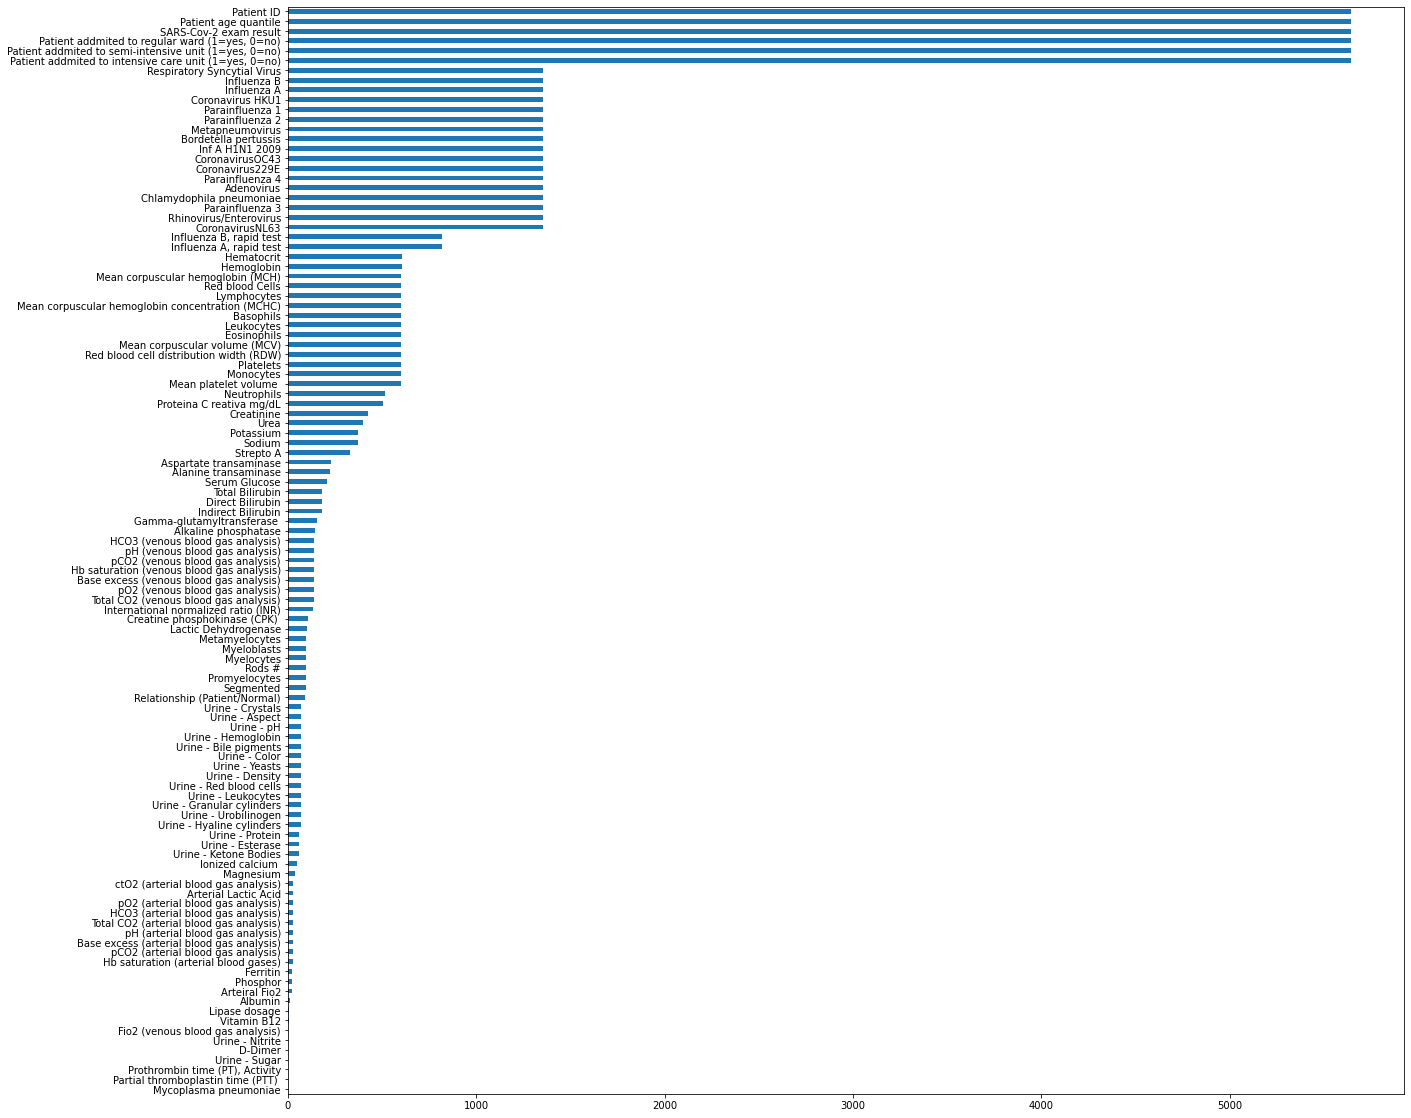

In [ ]:
plt.figure(figsize=(20, 20))
colcount = covid_data.count().sort_values()
colcount.plot(kind = "barh") 
# There are a lot of missing values in this data. Count the data to see how much of the data is not NaN.
# At least, we have patient age, COVID result, and intensity of care. 
# Think too about how the data may have been collected and how that can introduce bias into the data. 

In [ ]:
thresholdentries = 300
colcount = colcount.sort_values(ascending = False)
explorecolumns = colcount[colcount>thresholdentries].index # Look at columns with more than 'threshold' entries

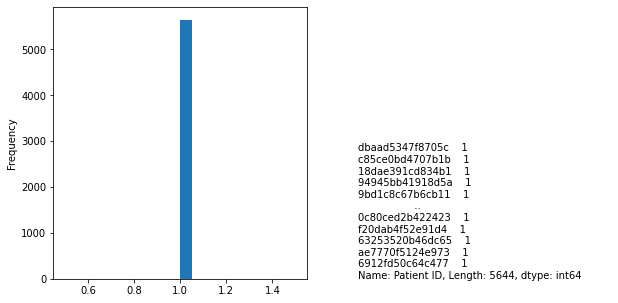

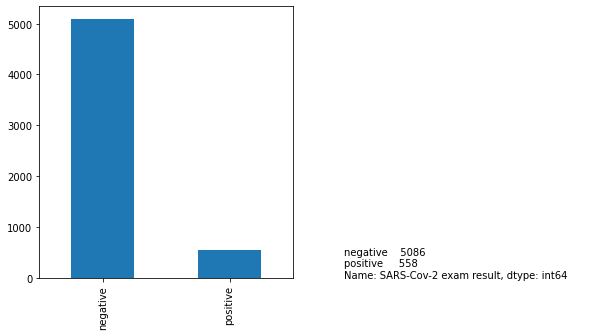

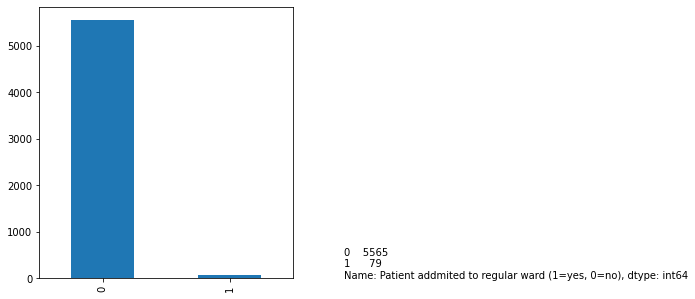

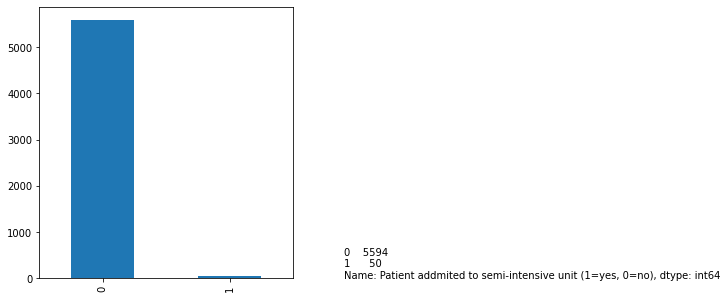

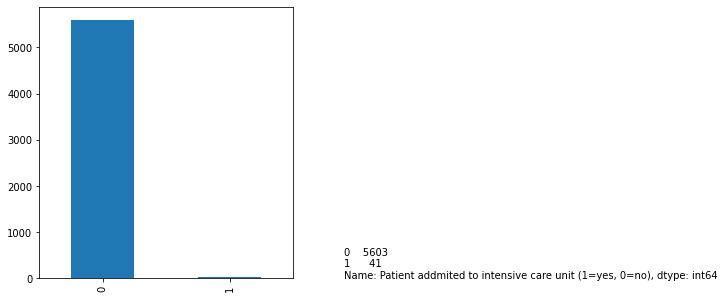

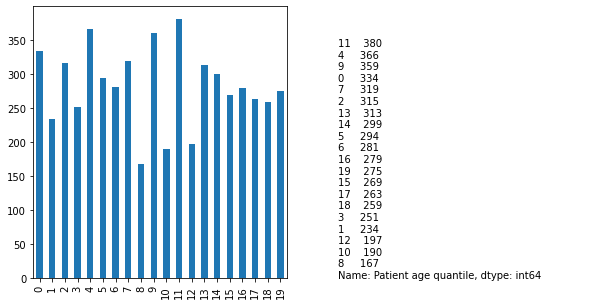

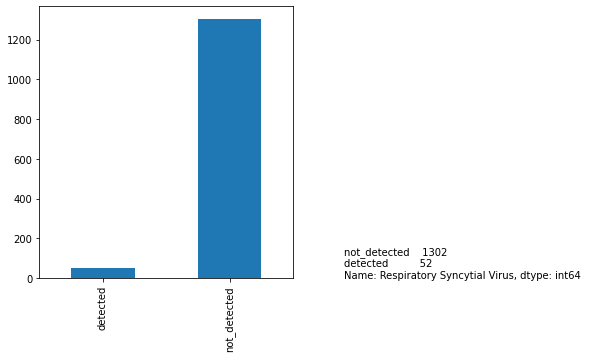

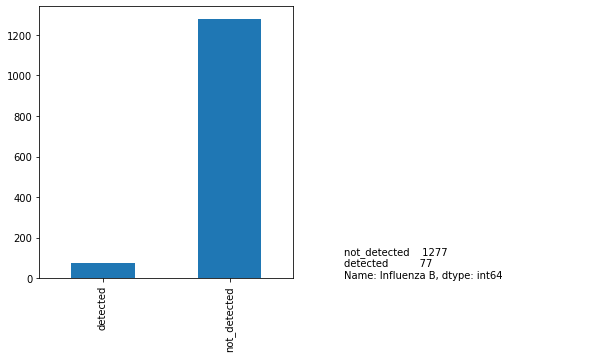

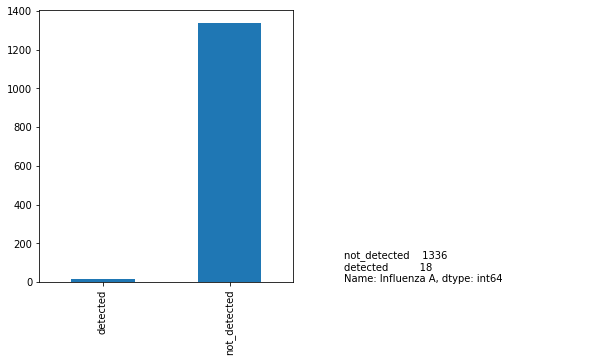

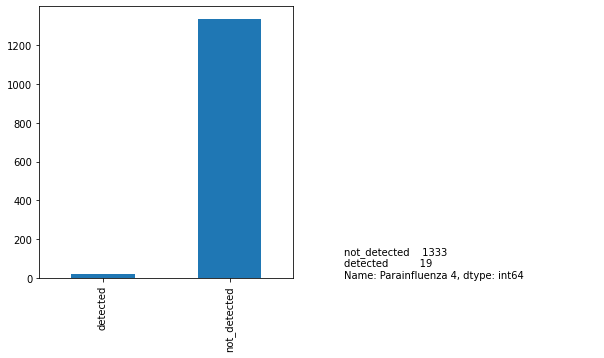

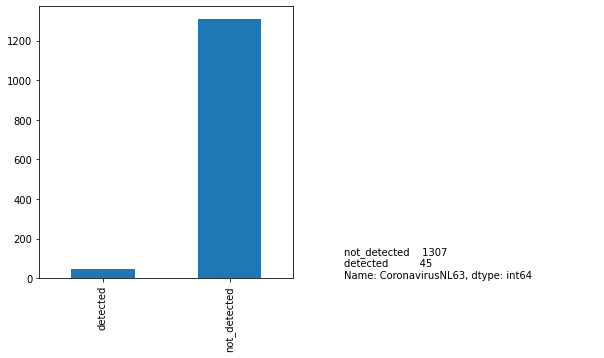

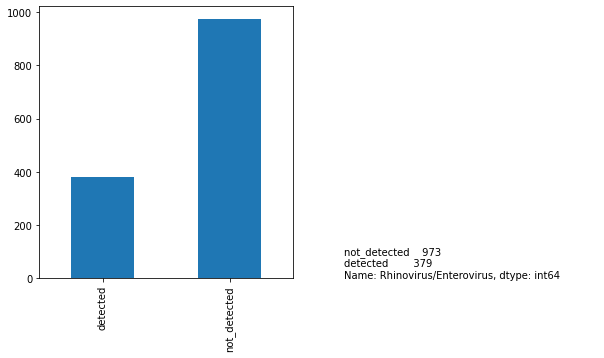

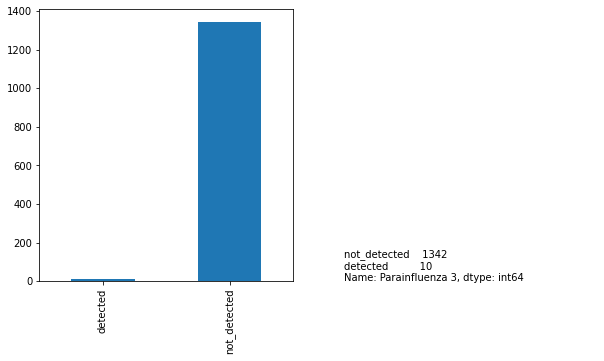

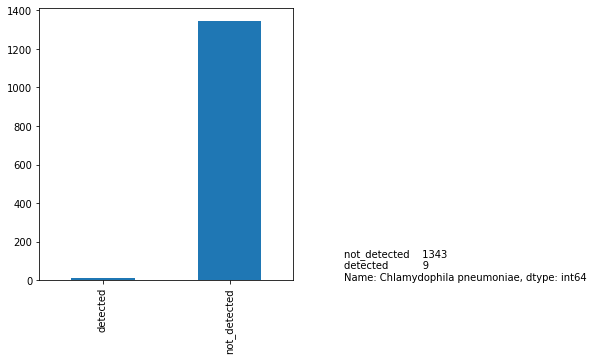

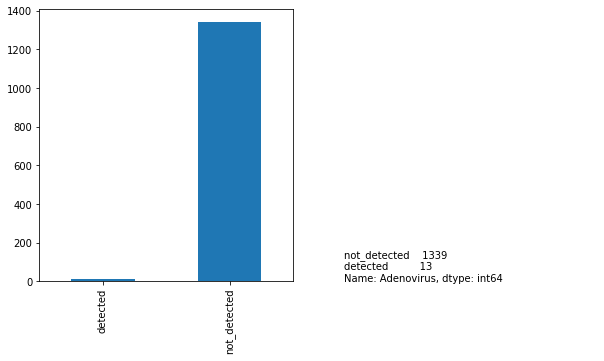

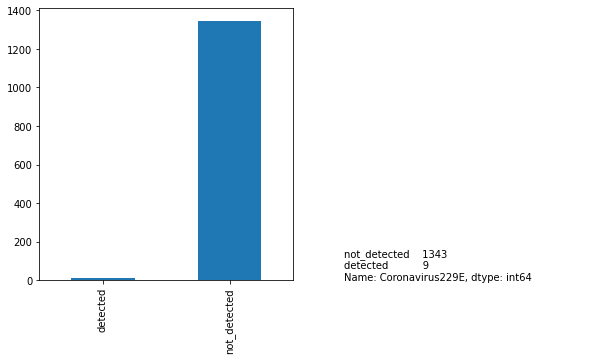

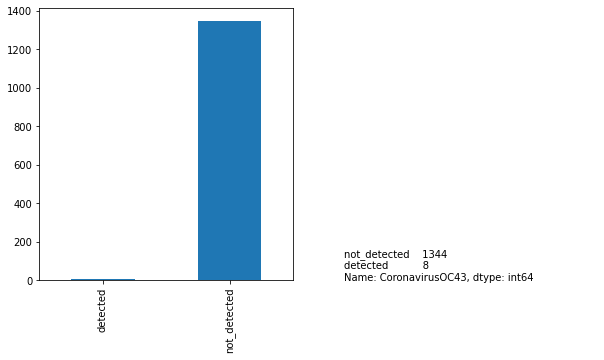

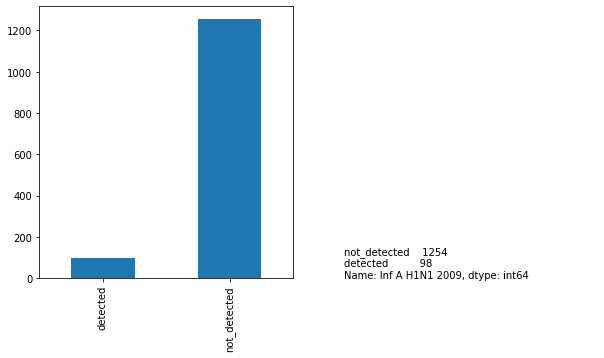

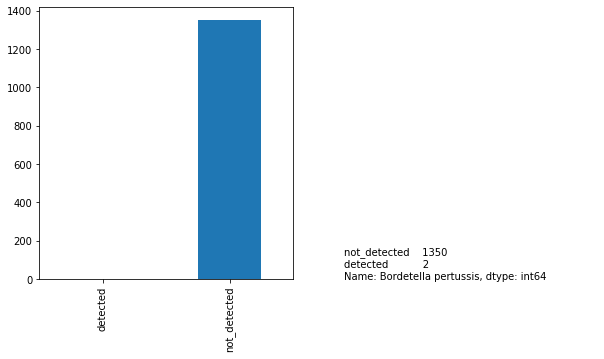

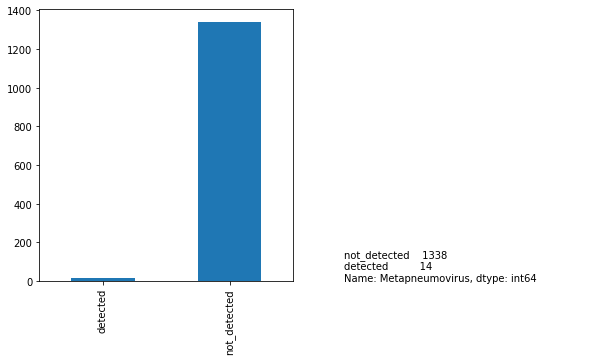

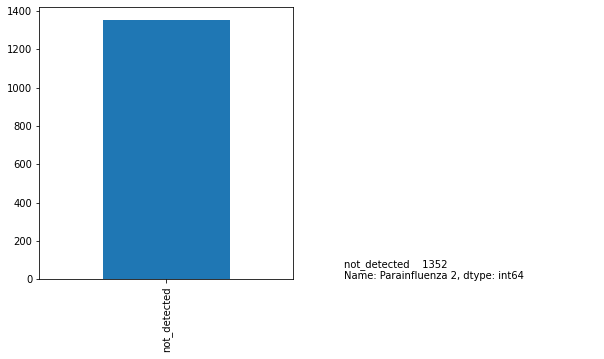

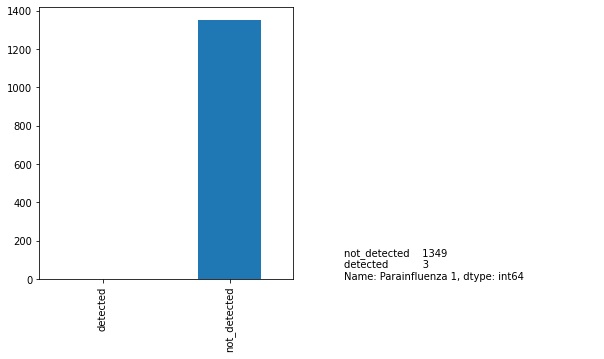

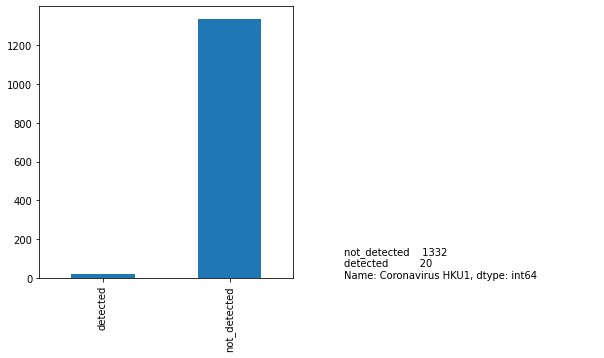

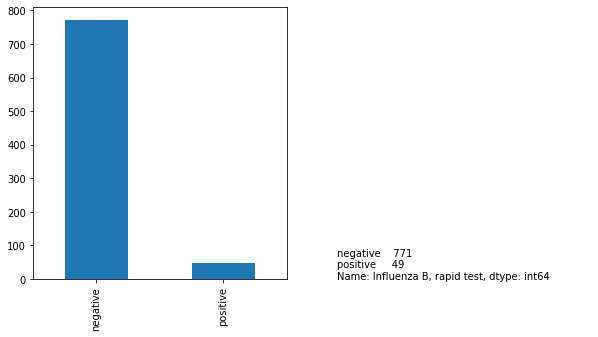

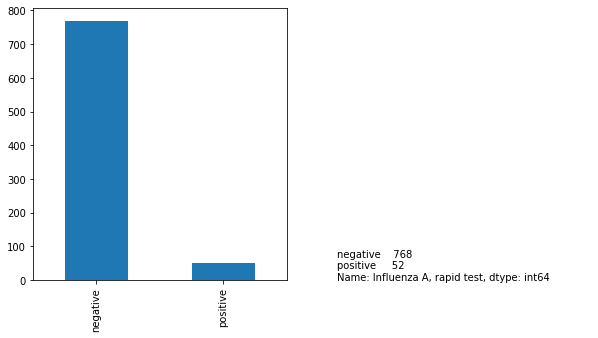

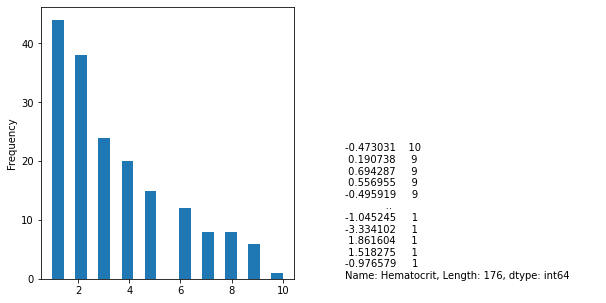

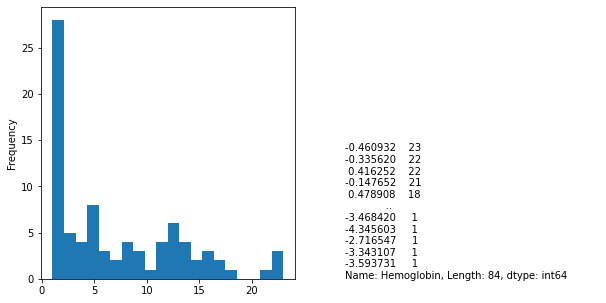

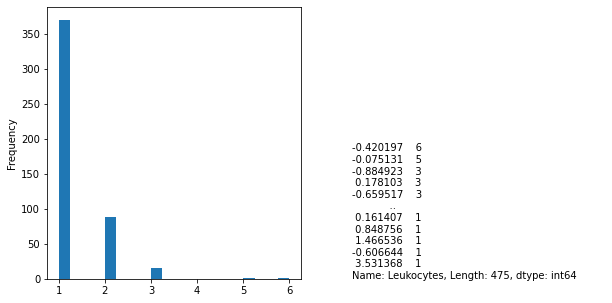

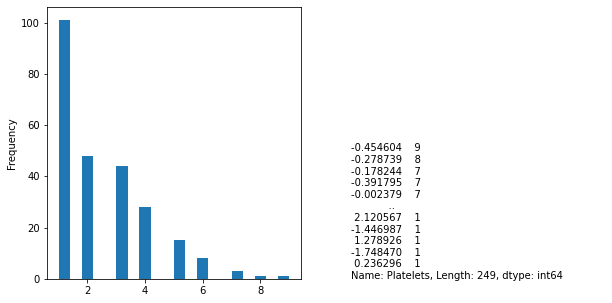

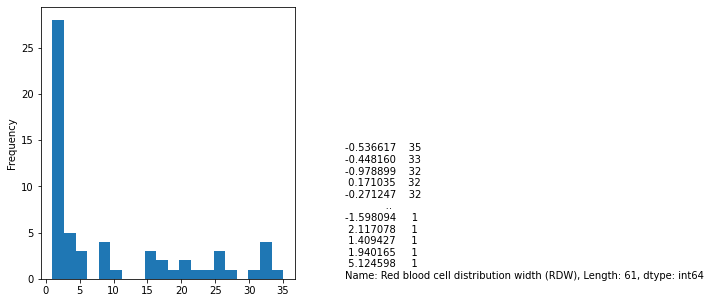

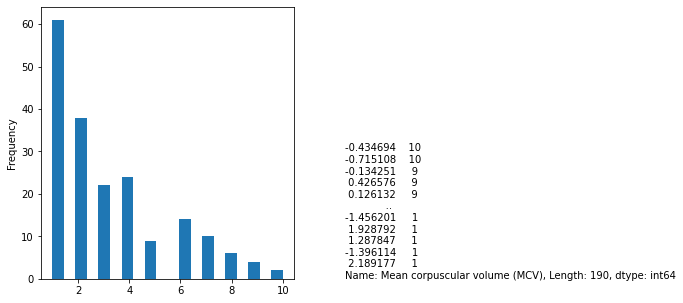

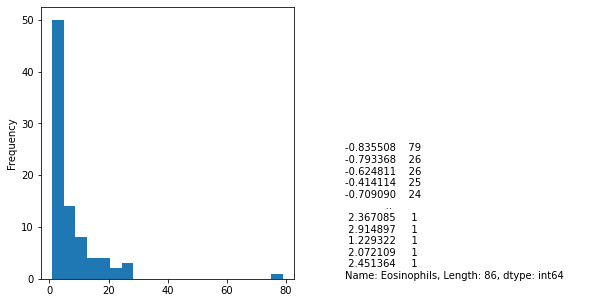

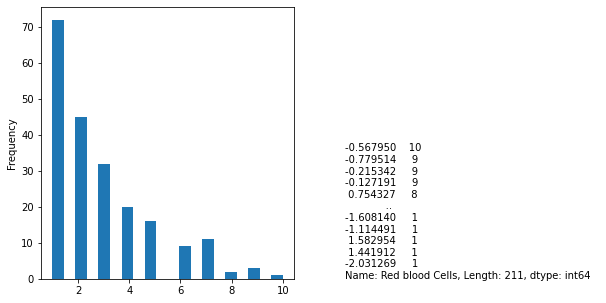

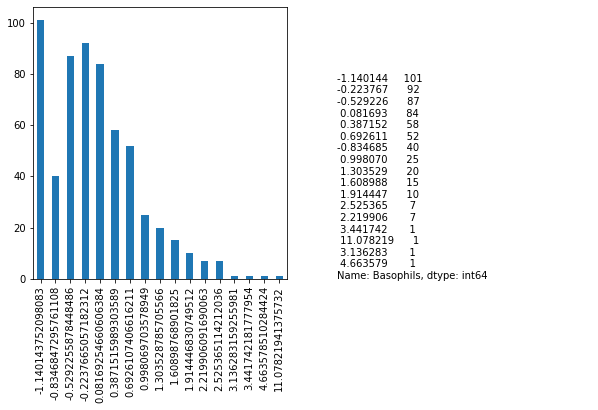

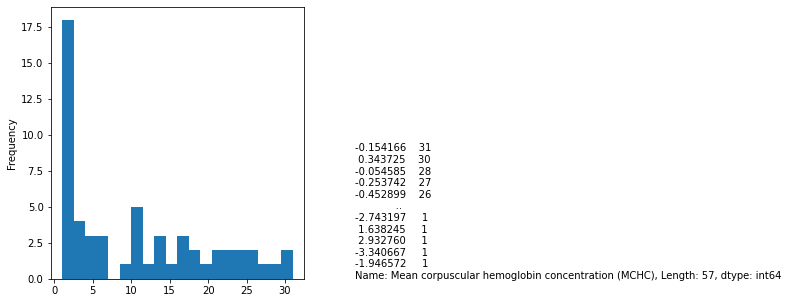

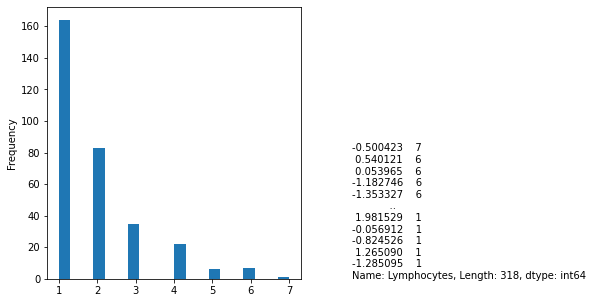

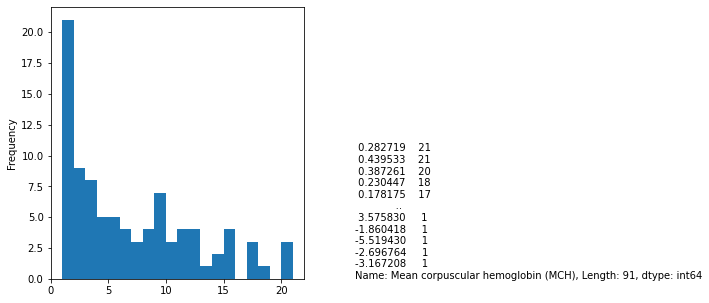

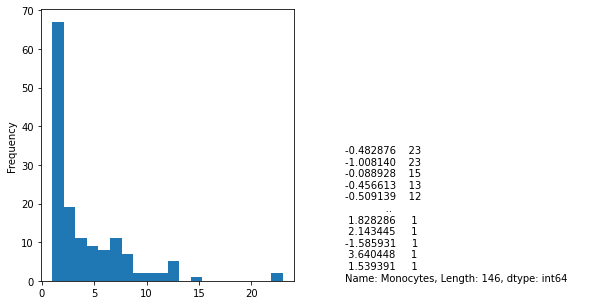

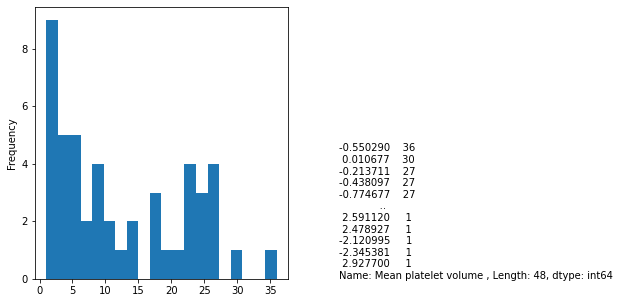

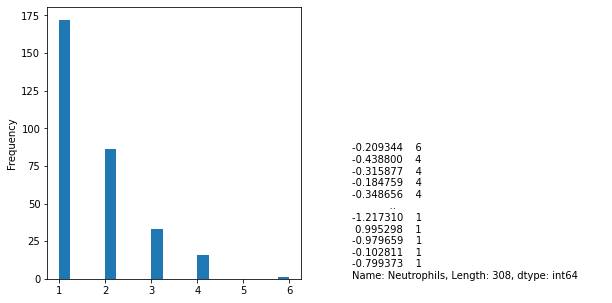

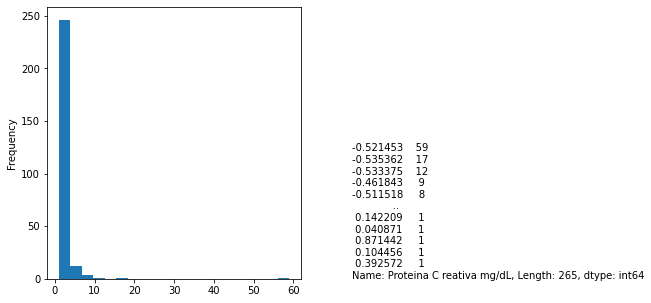

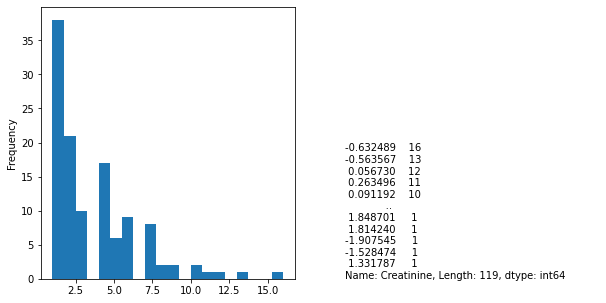

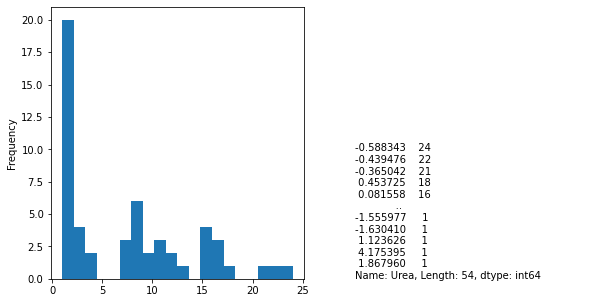

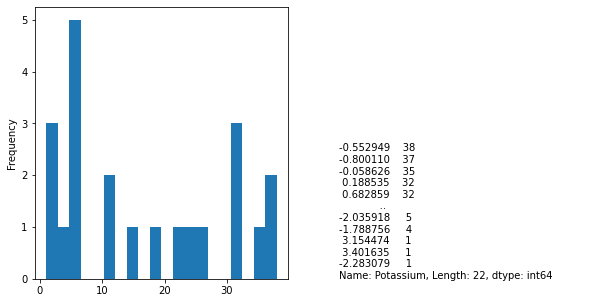

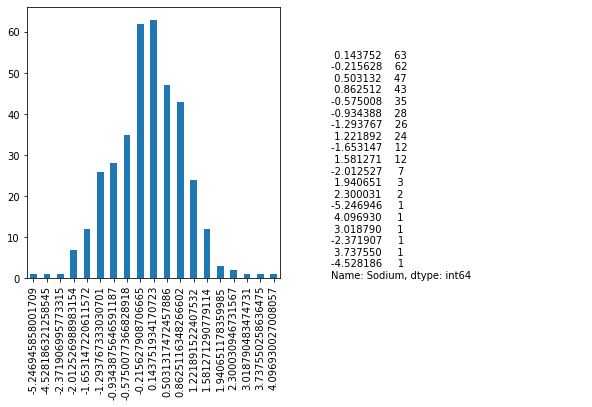

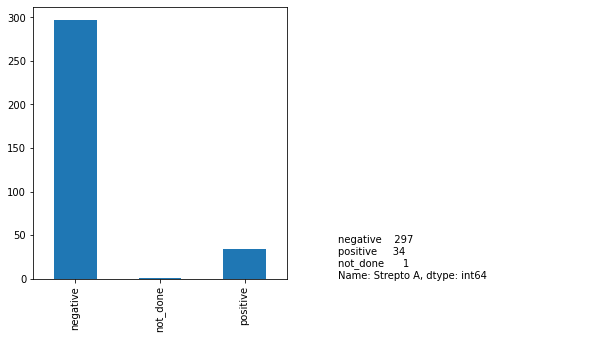

In [ ]:
# A crude code to plot histograms/barplots to show the distribution of the data in columns
pd.set_option('max_rows', 20)
for idx, colname in enumerate(explorecolumns):
  valcounts = covid_data[colname].value_counts()
  if len(valcounts) > 20:
    fig, axes = plt.subplots(1,2, figsize = (10,5))
    valcounts.plot(ax = axes[0], kind = 'hist', bins = 20)
    axes[1].text(0,0,str(valcounts),fontsize=10); 
    axes[1].axis('off')
  else:
    fig, axes = plt.subplots(1,2, figsize = (10,5))
    valcounts.sort_index().plot(ax = axes[0], kind = "bar") 
    axes[1].text(0,0,str(valcounts),fontsize=10)
    axes[1].axis('off')
  plt.ylabel('Count'); plt.xlabel(colname) 
  plt.show()
# The patient age seems to have been divided into 20 quantiles. 

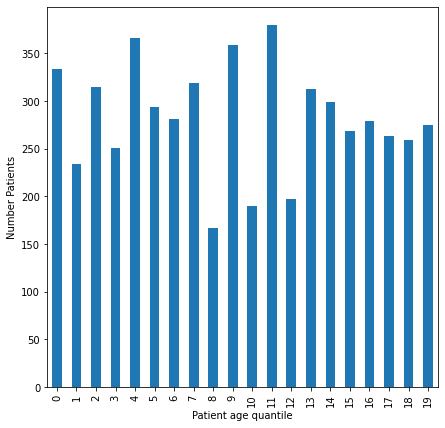

In [ ]:
# Student Code
paq = covid_data.groupby(["Patient age quantile"]).size()
paq.plot.bar(figsize=(7,7),legend=False)
plt.ylabel("Number Patients")
cov = covid_data.groupby(["SARS-Cov-2 exam result"]).size()

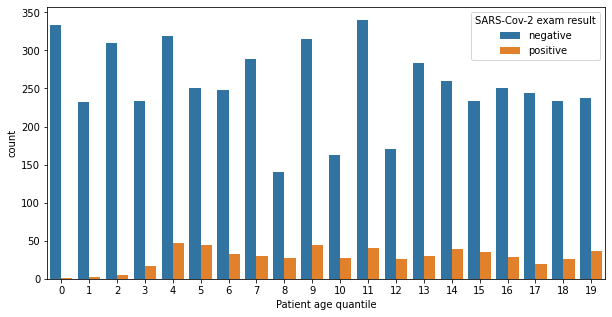

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(hue = 'SARS-Cov-2 exam result', x = 'Patient age quantile', data = covid_data)

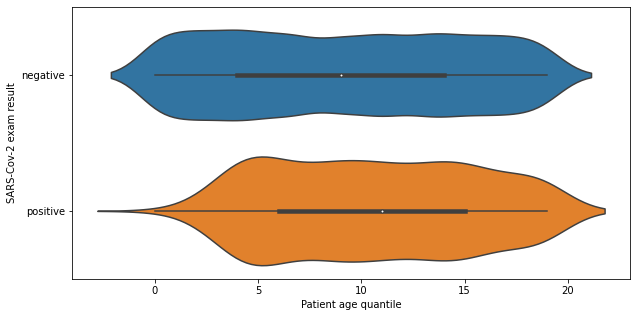

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(x = 'Patient age quantile', y ='SARS-Cov-2 exam result', data = covid_data)

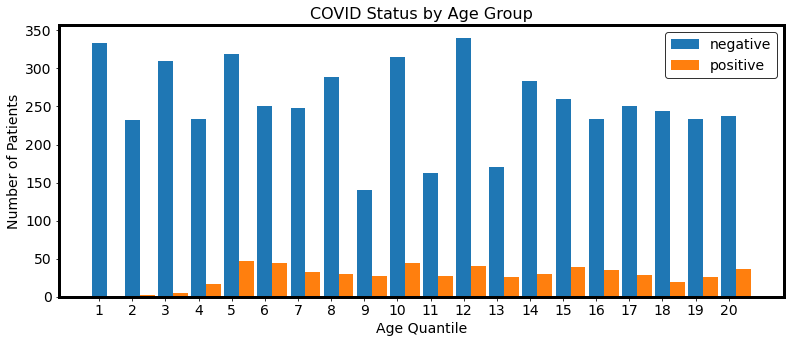

In [ ]:
groups = covid_data.groupby(['SARS-Cov-2 exam result'])
group_length = len(groups)
position = 0;
plt.figure(figsize = (13,5))

for group_name, full_group in groups:
  counts = full_group['Patient age quantile'].value_counts()
  plt.bar(counts.index + 1 + position*.9/group_length, counts.values, width = .9/group_length, label = group_name)
  position+=1;

leg = plt.legend(fontsize = 14)
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

plt.title('COVID Status by Age Group', fontsize = 16)
plt.xticks(range(1,21,1),fontsize = 14);
plt.yticks(fontsize = 14)
plt.xlabel('Age Quantile', fontsize = 14);
plt.ylabel('Number of Patients', fontsize = 14);


## Data Cleaning <a name = "dataclean" />

In [ ]:
# Encode categorical data into numbers that ML can understand
# Consider looking up one hot encoding for more than 2 categories

# Dealing with lots of NaN values in our data?
# Feel free to look it up. This is one suggestion - https://stats.stackexchange.com/questions/258610/machine-learning-dealing-with-nan-values

In [ ]:
# drop some columns of unhelpful data
cols_to_drop = ['Patient ID', 'Parainfluenza 2']
covid_data_s = covid_data[explorecolumns].drop(cols_to_drop, axis = 1)

### Encode Predictions <a name = "encodepredictions" />
First, we will encode the values that we want to predict
- Covid exam result: 0 negative, 1 positive
- Level of care can be encoded with an order: 0 not hospitalized. 1 regular ward, 2 semi intensive care, 3 intensive care.

In [ ]:
# column renaming - just for easier indexing on my end
col_rename = {
    "SARS-Cov-2 exam result" : "SARSCov2_test_result",
    "Patient addmited to regular ward (1=yes, 0=no)" : "Regular_ward",
    "Patient addmited to semi-intensive unit (1=yes, 0=no)" : "Semi_intensive_care",
    "Patient addmited to intensive care unit (1=yes, 0=no)" : "Intensive_care",
}
covid_data_s = covid_data_s.rename(columns = col_rename)

In [ ]:
# Make sure each patient only has 1 label for level of care
covid_data_s.iloc[:,1:4].sum(axis=1).max()

1

In [ ]:
# Get predicted values encoded into numeric values.
SARSCOV2_test_result_encoding = {'negative':0, 'positive':1} # COVID test result encoding in a dictionary
if covid_data_s['SARSCov2_test_result'].dtypes == 'object':
  covid_data_s['SARSCov2_test_result'] = covid_data_s['SARSCov2_test_result'].map(SARSCOV2_test_result_encoding)

In [ ]:
# I made a new column called No hospitalizations
covid_data_s['No_hospitalization'] = covid_data_s[['Regular_ward', 'Semi_intensive_care','Intensive_care']].sum(axis = 1)
covid_data_s['No_hospitalization'] = covid_data_s['No_hospitalization'].apply(lambda x: 1 if x==0 else 0) # invert label

In [ ]:
# with the 4 columns of level of care, I then use the idxmax function to get the label for a patient and put into a new column called care_level
care_cols = ['No_hospitalization','Regular_ward', 'Semi_intensive_care','Intensive_care']
care_level = covid_data_s[care_cols].idxmax(axis = 1, skipna = False)
covid_data_s.insert(1,'care_level',care_level)
covid_data_s = covid_data_s.drop(care_cols, axis = 1)

In [ ]:
dict(zip(care_cols,[0,1,2,3]))

{'Intensive_care': 3,
 'No_hospitalization': 0,
 'Regular_ward': 1,
 'Semi_intensive_care': 2}

In [ ]:
# then I encode the care level in a dictionary and map the care level label to a numerical value.
care_level_encoding = dict(zip(care_cols,[0,1,2,3]))
covid_data_s['care_level'] = covid_data_s['care_level'].map(care_level_encoding)

In [ ]:
covid_data_s.head()

SARSCov2_test_result  care_level  Patient age quantile  \
0                     0           0                    13   
1                     0           0                    17   
2                     0           0                     8   
3                     0           0                     5   
4                     0           0                    15   

  Respiratory Syncytial Virus   Influenza B   Influenza A Parainfluenza 4  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus Parainfluenza 3  \
0             NaN                    NaN             NaN   
1    not_detected               detected    not_detected   
2             NaN                    NaN             NaN   
3             NaN                    NaN             NaN   
4    not_detected               detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Coronavirus229E CoronavirusOC43  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  Inf A H1N1 2009 Bordetella pertussis Metapneumovirus Parainfluenza 1  \
0             NaN                  NaN             NaN             NaN   
1    not_detected         not_detected    not_detected    not_detected   
2             NaN                  NaN             NaN             NaN   
3             NaN                  NaN             NaN             NaN   
4    not_detected         not_detected    not_detected    not_detected   

  Coronavirus HKU1 Influenza B, rapid test Influenza A, rapid test  \
0              NaN                     NaN                     NaN   
1     not_detected                negative                negative   
2              NaN                     NaN                     NaN   
3              NaN                     NaN                     NaN   
4     not_detected                     NaN                     NaN   

   Hematocrit  Hemoglobin  Leukocytes  Platelets  \
0         NaN         NaN         NaN        NaN   
1    0.236515    -0.02234    -0.09461  -0.517413   
2         NaN         NaN         NaN        NaN   
3         NaN         NaN         NaN        NaN   
4         NaN         NaN         NaN        NaN   

   Red blood cell distribution width (RDW)  Mean corpuscular volume (MCV)  \
0                                      NaN                            NaN   
1                                -0.625073                       0.166192   
2                                      NaN                            NaN   
3                                      NaN                            NaN   
4                                      NaN                            NaN   

   Eosinophils  Red blood Cells  Basophils  \
0          NaN              NaN        NaN   
1     1.482158         0.102004  -0.223767   
2          NaN              NaN        NaN   
3          NaN              NaN        NaN   
4          NaN              NaN        NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Lymphocytes  \
0                                               NaN          NaN   
1                                          -0.95079     0.318366   
2                                               NaN          NaN   
3                                               NaN          NaN   
4                                               NaN          NaN   

   Mean corpuscular hemoglo

### Encode Categorical  <a name = "encodecategorical" />
Now for all non-numeric columns (categorical ones), I plan to encode it with numbers. 

For categorical data, I plan to change NaN into a new category called 'not_done' for now. 
Note that Strepto A has a weird 3rd value called 'not_done'. We can either turn that value into NaN, or in this case I will convert the NaN into not_done.

In [ ]:
covid_data_s.columns[covid_data_s.dtypes == 'object']

Index(['Respiratory Syncytial Virus', 'Influenza B', 'Influenza A',
       'Parainfluenza 4', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 1',
       'Coronavirus HKU1', 'Influenza B, rapid test',
       'Influenza A, rapid test', 'Strepto A'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#cols_to_encode = ['Adenovirus', 'Bordetella pertussis', 'Coronavirus HKU1']
cols_to_encode = covid_data_s.columns[covid_data_s.dtypes == 'object']
test = covid_data_s[cols_to_encode].fillna('not_done'); # This is where I fill the NaN values for categorical data with not_done
enc = OneHotEncoder(handle_unknown='ignore') # now I use sklearn one hot encoder to convert the column into new columns
enc_df = pd.DataFrame(enc.fit_transform(test).toarray(), columns = enc.get_feature_names(cols_to_encode)) # the get_feature_names allow you to get feature name, and the input is the prefix for the feature names
enc_df

Respiratory Syncytial Virus_detected  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
5639                                   0.0   
5640                                   0.0   
5641                                   0.0   
5642                                   0.0   
5643                                   0.0   

      Respiratory Syncytial Virus_not_detected  \
0                                          0.0   
1                                          1.0   
2                                          0.0   
3                                          0.0   
4                                          1.0   
...                                        ...   
5639                                       0.0   
5640                                       0.0   
5641                                       0.0   
5642                                       0.0   
5643                                       0.0   

      Respiratory Syncytial Virus_not_done  Influenza B_detected  \
0                                      1.0                   0.0   
1                                      0.0                   0.0   
2                                      1.0                   0.0   
3                                      1.0                   0.0   
4                                      0.0                   0.0   
...                                    ...                   ...   
5639                                   1.0                   0.0   
5640                                   1.0                   0.0   
5641                                   1.0                   0.0   
5642                                   1.0                   0.0   
5643                                   1.0                   0.0   

      Influenza B_not_detected  Influenza B_not_done  Influenza A_detected  \
0                          0.0                   1.0                   0.0   
1                          1.0                   0.0                   0.0   
2                          0.0                   1.0                   0.0   
3                          0.0                   1.0                   0.0   
4                          1.0                   0.0                   0.0   
...                        ...                   ...                   ...   
5639                       0.0                   1.0                   0.0   
5640                       0.0                   1.0                   0.0   
5641                       0.0                   1.0                   0.0   
5642                       0.0                   1.0                   0.0   
5643                       0.0                   1.0                   0.0   

      Influenza A_not_detected  Influenza A_not_done  \
0                          0.0                   1.0   
1                          1.0                   0.0   
2                          0.0                   1.0   
3                          0.0                   1.0   
4                          1.0                   0.0   
...                        ...                   ...   
5639                       0.0                   1.0   
5640                       0.0                   1.0   
5641                       0.0                   1.0   
5642                       0.0                   1.0   
5643                       0.0                   1.0   

      Parainfluenza 4_detected  Parainfluenza 4_not_detected  \
0                          0.0                           0.0   
1                          0.0                           1.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           1.0   
...                        ...           

In [ ]:
# drop the categorical columns, and join the encoded columns with the original dataframe
covid_data_s = covid_data_s.drop(cols_to_encode, axis = 1) 
covid_data_s = covid_data_s.join(enc_df) 

In [ ]:
dict(covid_data_s.dtypes)

{'Adenovirus_detected': dtype('float64'),
 'Adenovirus_not_detected': dtype('float64'),
 'Adenovirus_not_done': dtype('float64'),
 'Basophils': dtype('float64'),
 'Bordetella pertussis_detected': dtype('float64'),
 'Bordetella pertussis_not_detected': dtype('float64'),
 'Bordetella pertussis_not_done': dtype('float64'),
 'Chlamydophila pneumoniae_detected': dtype('float64'),
 'Chlamydophila pneumoniae_not_detected': dtype('float64'),
 'Chlamydophila pneumoniae_not_done': dtype('float64'),
 'Coronavirus HKU1_detected': dtype('float64'),
 'Coronavirus HKU1_not_detected': dtype('float64'),
 'Coronavirus HKU1_not_done': dtype('float64'),
 'Coronavirus229E_detected': dtype('float64'),
 'Coronavirus229E_not_detected': dtype('float64'),
 'Coronavirus229E_not_done': dtype('float64'),
 'CoronavirusNL63_detected': dtype('float64'),
 'CoronavirusNL63_not_detected': dtype('float64'),
 'CoronavirusNL63_not_done': dtype('float64'),
 'CoronavirusOC43_detected': dtype('float64'),
 'CoronavirusOC43_not

### Correlation Plots <a name = "corrplots" />

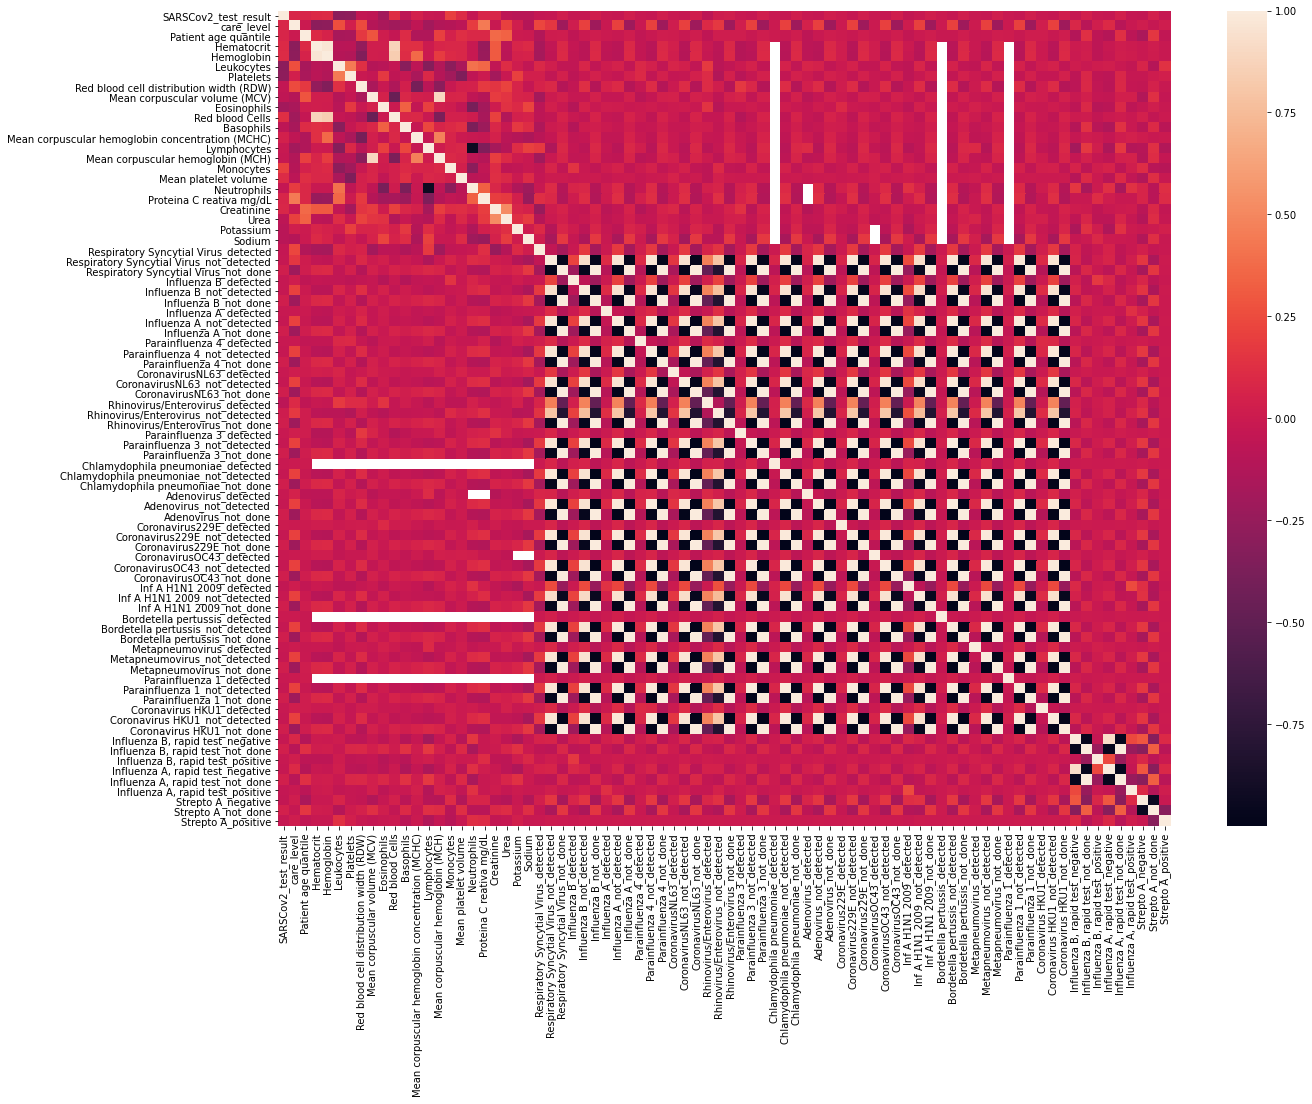

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(covid_data_s.corr())
plt.show()
# Let's look at the correlation in columns. It tells us how much one column can give us information about another column

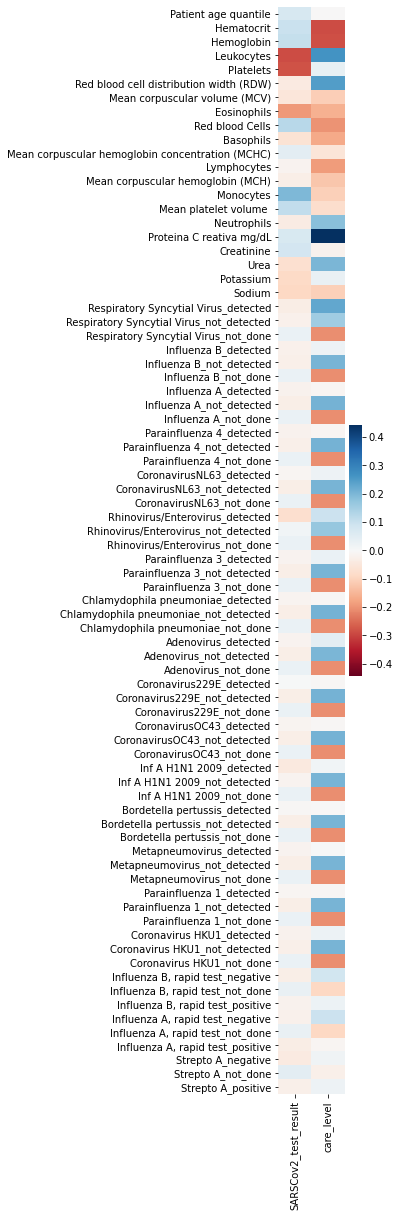

In [ ]:
plt.figure(figsize = (1.5,20))
correlations = covid_data_s.corr().iloc[2:,:2]
maxcorr = correlations.abs().max().max()
sns.heatmap(correlations, cmap = 'RdBu', vmax = maxcorr, vmin = -maxcorr)
plt.show()

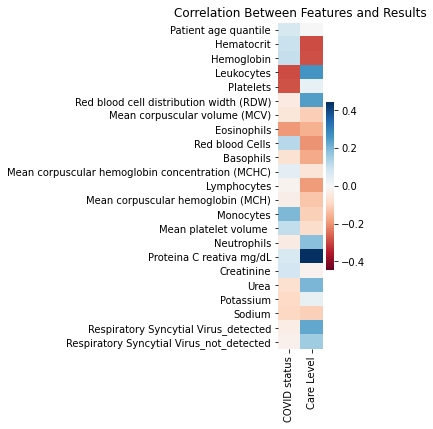

In [ ]:
fig = plt.figure(figsize = (1,6))
correlations = covid_data_s.corr().iloc[2:25,:2]
maxcorr = correlations.abs().max().max()
sns.heatmap(correlations, cmap = 'RdBu', vmax = maxcorr, vmin = -maxcorr)
ax = fig.gca()
ax.set_xticklabels(['COVID status','Care Level'], rotation = 90)
plt.title('Correlation Between Features and Results')
plt.show()

In [ ]:
correlations.abs().max().max()

0.4429476145209023

In [ ]:
# plt.figure(figsize = (20,15))
# sns.pairplot(covid_data_s, size = 4, kind = 'reg',
#             x_vars=['SARSCov2_test_result', 'care_level'],
#             y_vars=covid_data_s.columns[3:])
# plt.show()

Text(0.5, 5.322041797637938, 'p-value=5e-13')

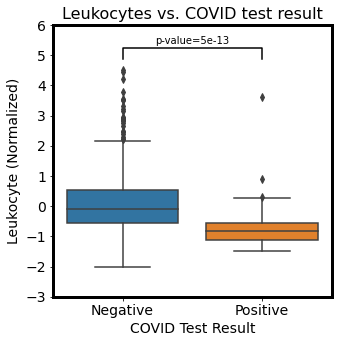

In [ ]:
fig = plt.figure(figsize = (5,5))
sns.boxplot(y = 'Leukocytes', x = 'SARSCov2_test_result', data = covid_data_s)

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

plt.title('Leukocytes vs. COVID test result', fontsize = 16)
plt.yticks(fontsize = 14)
plt.ylim([-3,6])
ax.set_xticklabels(['Negative','Positive'], fontsize = 14)
plt.ylabel('Leukocyte (Normalized)', fontsize = 14);
plt.xlabel('COVID Test Result', fontsize = 14);

# statistical annotation
x1, x2 = 0,1
y = covid_data_s['Leukocytes'].max()
h = .7
plt.plot([x1, x1, x2, x2], [y+h/2, y+h, y+h, y+h/2], lw=1.5, c='k')
plt.text((x1+x2)*.5, y+h+.1, "p-value=5e-13", ha='center', va='bottom', color=col)

In [ ]:
from scipy import stats
y = covid_data_s['Leukocytes'].max()
g = covid_data_s.groupby('SARSCov2_test_result')
stats.ttest_ind(g.get_group(0)['Leukocytes'].dropna(),g.get_group(1)['Leukocytes'].dropna())

Ttest_indResult(statistic=7.380811747794708, pvalue=5.273455451891494e-13)

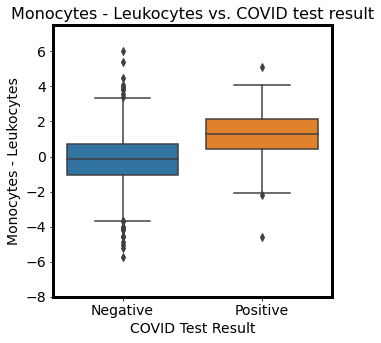

In [ ]:
fig = plt.figure(figsize = (5,5))
sns.boxplot(y = covid_data_s['Monocytes'] - covid_data_s['Leukocytes'], x = 'SARSCov2_test_result', data = covid_data_s)

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

plt.title('Monocytes - Leukocytes vs. COVID test result', fontsize = 16)
plt.yticks(fontsize = 14)
plt.ylim([-8,7.5])
ax.set_xticklabels(['Negative','Positive'], fontsize = 14)
plt.ylabel('Monocytes - Leukocytes', fontsize = 14);
plt.xlabel('COVID Test Result', fontsize = 14);


### Encode Numerical  <a name = "encodenumerical" />

In [ ]:
# Now let's deal with NaN in numerical data

In [ ]:
cols_numeric_to_encode = covid_data_s.columns[covid_data_s.isna().sum()>0]

In [ ]:
# First save data where numerical nan rows are removed.
covid_data_nonan = covid_data_s[covid_data_s.isna().sum(axis = 1) == 0]
print(covid_data_nonan.shape)

(242, 80)


In [ ]:
export_filename = 'covid_data_removed_numerical_nan_pts.csv'
covid_data_nonan.to_csv(export_filename)
files.download(export_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

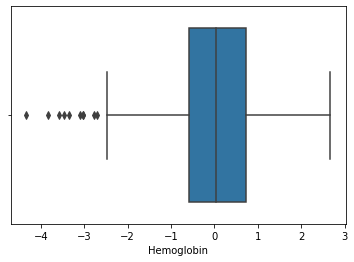

In [ ]:
sns.boxplot(x = 'Hemoglobin', data = covid_data_s)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
replaced = imp.fit_transform(covid_data_s[cols_numeric_to_encode])
replaced = pd.DataFrame(replaced, columns = cols_numeric_to_encode)
replaced

Hematocrit    Hemoglobin    Leukocytes     Platelets  \
0    -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
1     2.365154e-01 -2.234027e-02 -9.461035e-02 -5.174130e-01   
2    -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
3    -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
4    -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
...            ...           ...           ...           ...   
5639 -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
5640 -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
5641 -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
5642 -2.186214e-09 -1.601319e-08  6.215833e-09 -3.535004e-10   
5643  6.942869e-01  5.415639e-01 -1.288428e+00 -9.068291e-01   

      Red blood cell distribution width (RDW)  Mean corpuscular volume (MCV)  \
0                                1.020433e-08                  -4.155369e-09   
1                               -6.250727e-01                   1.661924e-01   
2                                1.020433e-08                  -4.155369e-09   
3                                1.020433e-08                  -4.155369e-09   
4                                1.020433e-08                  -4.155369e-09   
...                                       ...                            ...   
5639                             1.020433e-08                  -4.155369e-09   
5640                             1.020433e-08                  -4.155369e-09   
5641                             1.020433e-08                  -4.155369e-09   
5642                             1.020433e-08                  -4.155369e-09   
5643                            -1.827903e-01                   2.598459e-02   

       Eosinophils  Red blood Cells     Basophils  \
0     7.206147e-09     8.424447e-09 -6.633739e-09   
1     1.482158e+00     1.020042e-01 -2.237665e-01   
2     7.206147e-09     8.424447e-09 -6.633739e-09   
3     7.206147e-09     8.424447e-09 -6.633739e-09   
4     7.206147e-09     8.424447e-09 -6.633739e-09   
...            ...              ...           ...   
5639  7.206147e-09     8.424447e-09 -6.633739e-09   
5640  7.206147e-09     8.424447e-09 -6.633739e-09   
5641  7.206147e-09     8.424447e-09 -6.633739e-09   
5642  7.206147e-09     8.424447e-09 -6.633739e-09   
5643 -8.355077e-01     5.780238e-01 -1.140144e+00   

      Mean corpuscular hemoglobin concentration (MCHC)   Lymphocytes  \
0                                         1.014863e-09 -7.866736e-09   
1                                        -9.507903e-01  3.183658e-01   
2                                         1.014863e-09 -7.866736e-09   
3                                         1.014863e-09 -7.866736e-09   
4                                         1.014863e-09 -7.866736e-09   
...                                                ...           ...   
5639                                      1.014863e-09 -7.866736e-09   
5640                                      1.014863e-09 -7.866736e-09   
5641                                      1.014863e-09 -7.866736e-09   
5642                                      1.014863e-09 -7.866736e-09   
5643                                     -3.533190e-01 -2.957255e-01   

      Mean corpuscular hemoglobin (MCH)     Monocytes  Mean platelet volume   \
0                         -3.453010e-09 -3.220114e-09           7.438142e-09   
1                         -2.922693e-01  3.575467e-01           1.067657e-02   
2                         -3.453010e-09 -3.220114e-09           7.438142e-09   
3                         -3.453010e-09 -3.220114e-09           7.438142e-09   
4                         -3.453010e-09 -3.220114e-09           7.438142e-09   
...                                 ...           ...                    ...   
5639                      -3.453010e-09 -3.220114e-09           7.438142e-09   
5640                      -3.453010e-09 -3.220114e-09           7.438142e-09   
5641                      -3.453010e-09 -3.220114e-09   

In [ ]:
for col in cols_numeric_to_encode:
  covid_data_s[col] = replaced[col]
print(covid_data_s.isna().sum().value_counts())

0    80
dtype: int64


In [ ]:
export_filename = 'covid_data_all_nan_replaced_mean.csv'
covid_data_s.to_csv(export_filename)
files.download(export_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Machine Learning <a name = "MachineLearning" />

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn import metrics

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Lasso, RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Run this if importing a file
# from google.colab import files
# datafile = files.upload() # Choose the file
# filename = list(datafile.keys())[0] # Get the filename
# import os
# dir = os.getcwd() # Get current directory name
# covid_data_s = pd.read_csv(dir + '//' + filename)

In [ ]:
# Let us isolate our input as X, and outputs as Y_covid and Y_care.
# Let us also divide into training and testing data with 80:20 split. 

Some considerations while prepping your input data:

* Try normalizing your data.
  * standard scaler to help normalize. may need to scale data. mean 0, std 1
  * `X = StandardScaler().fit_transform(X)`
  * normalizer can work too.
  * `X = Normalizer().fit_transform(X)`

* Deal with unbalanced classes
  * May also need to remove a lot of 'negative' results to avoid overfitting.
https://datascience.stackexchange.com/questions/32818/train-test-split-of-unbalanced-dataset-classification

### Using the Full Data with NaN replaced <a name = "fulldata" />

In [ ]:
Y_covid = np.array(covid_data_s['SARSCov2_test_result'])
Y_care = np.array(covid_data_s['care_level'])
X = np.array(covid_data_s.drop(['SARSCov2_test_result', 'care_level'], axis = 1))

In [ ]:
# Scaling data. NOTE IF YOU SCALE YOUR DATA, REMEMBER THAT YOU'VE DONE SO WHEN ANALYZING YOUR MODELS
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
print(X.mean())
print(X.std())

1.6011066752848937e-17
0.9999999999999999


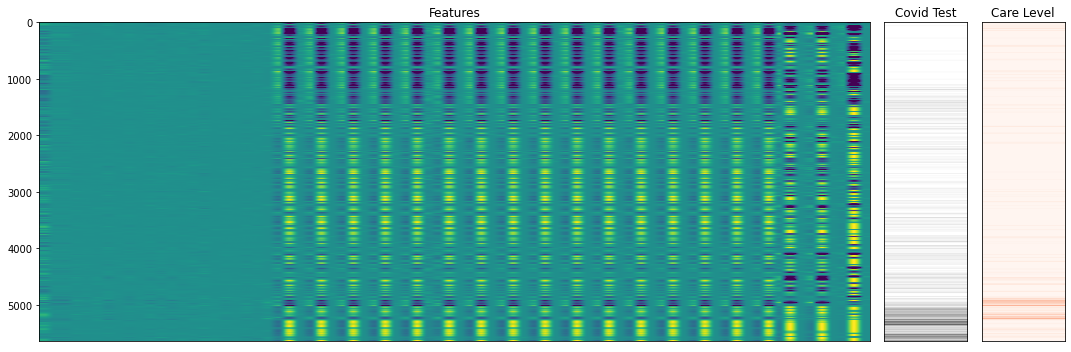

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15,5), gridspec_kw={'width_ratios': [10,1,1]})

axes[0].imshow(X/X.max(axis=0), aspect = 'auto', vmax = 1, vmin = -1); axes[0].set_xticks([]); axes[0].title.set_text('Features')
axes[1].imshow(np.expand_dims(Y_covid, axis=1), aspect = 'auto', cmap = 'Greys', vmax = 1, vmin = 0); axes[1].set_yticks([]); axes[1].set_xticks([]); axes[1].title.set_text('Covid Test');
axes[2].imshow(np.expand_dims(Y_care, axis=1), aspect = 'auto', cmap = 'Reds', vmax = 3, vmin = 0); axes[2].set_yticks([]); axes[2].set_xticks([]); axes[2].title.set_text('Care Level');
fig.tight_layout()

#### PCA to reduce dimensions <a name = "pca1" />

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

Text(0.5, 0, 'Number of Components')

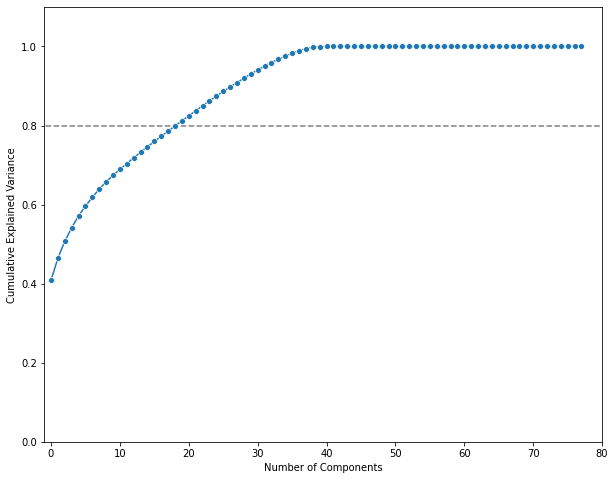

In [ ]:
plt.figure(figsize = (10,8))
sns.lineplot(x = np.arange(pca.n_components_), y = np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.hlines(.80, -10, 90, linestyles = 'dashed', alpha = .5)
plt.ylabel('Cumulative Explained Variance')
plt.xlim([-1,80]); plt.ylim([0,1.1])
plt.xlabel('Number of Components')

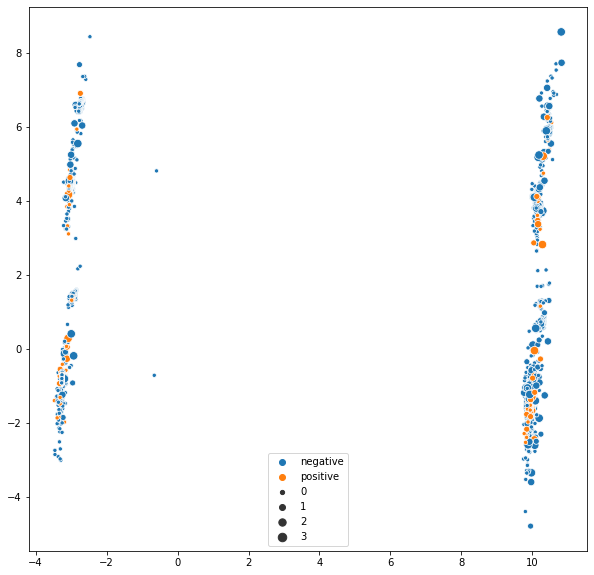

In [ ]:
plt.figure(figsize = (10,10))
colrs = list(map(lambda x: 'positive' if (x==1) else 'negative', Y_covid))
sns.scatterplot(X_pca[:,0],X_pca[:,1], size = Y_care, hue = colrs)

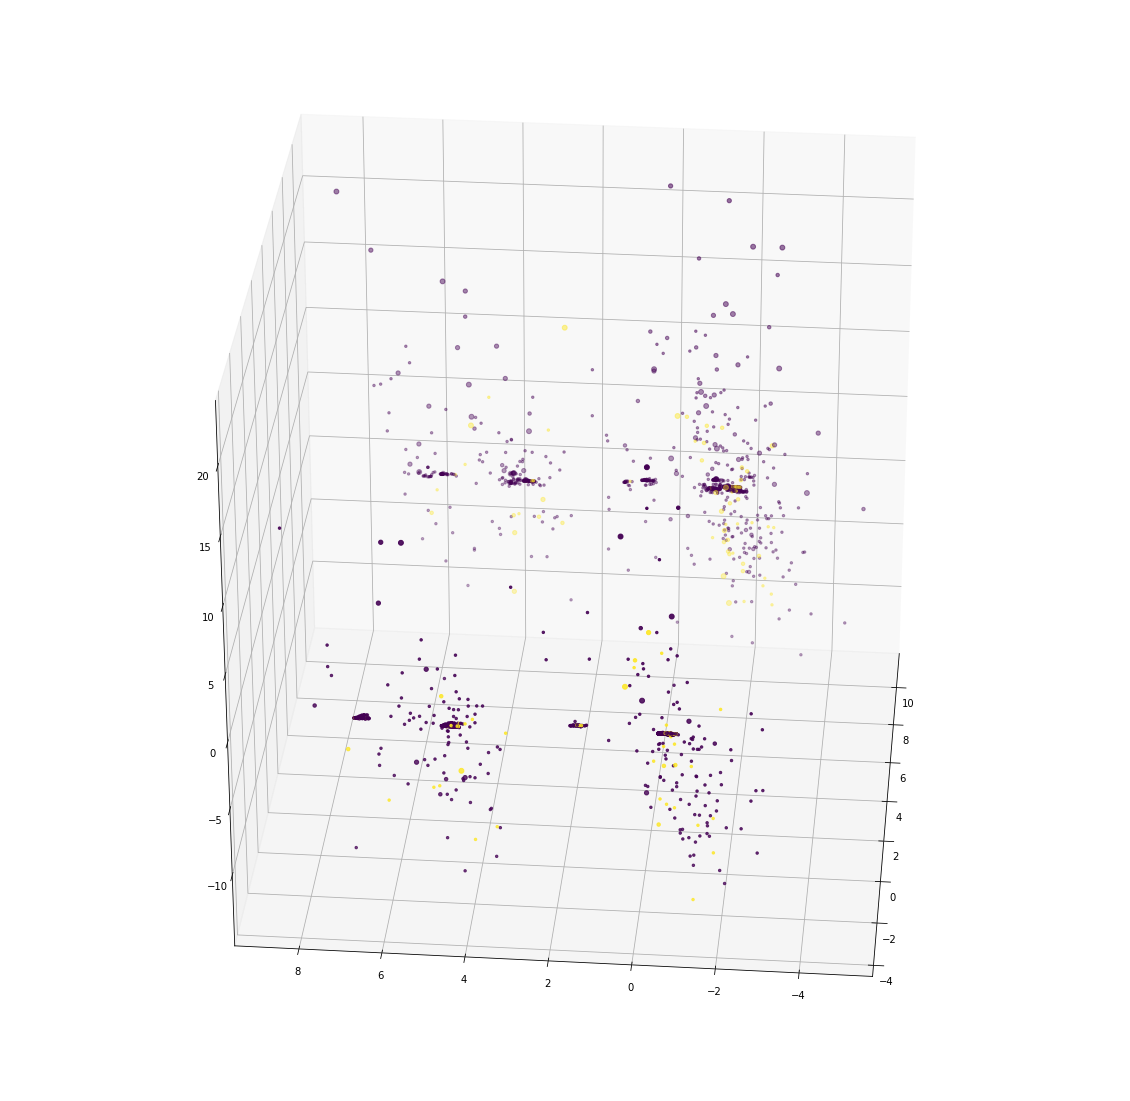

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1], X_pca[:,2], c=Y_covid, s = (Y_care+1)*6)
ax.view_init(30, 185)

plt.show()

#### Tsne and Umap
Tsne and Umap are non-linear dimensionality reduction techniques that you may see being used sometimes  \
https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding \
https://arxiv.org/abs/1802.03426

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

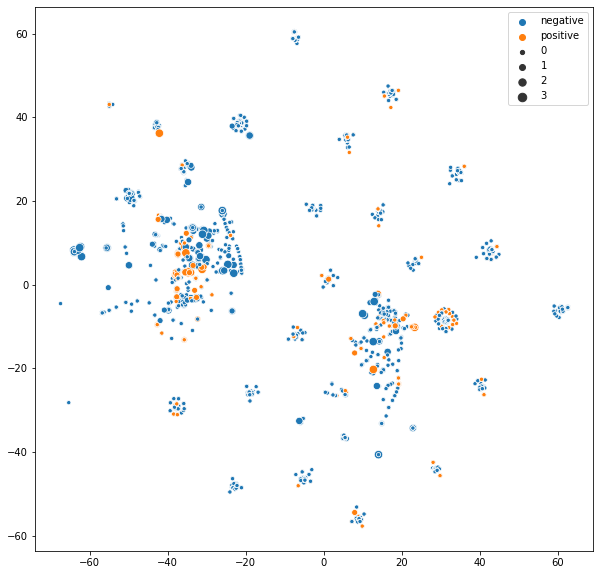

In [ ]:
plt.figure(figsize = (10,10))
colrs = list(map(lambda x: 'positive' if (x==1) else 'negative', Y_covid))
sns.scatterplot(X_embedded [:,0],X_embedded [:,1], size = Y_care, hue = colrs)

In [ ]:
import umap
umap = umap.UMAP(n_neighbors=5, random_state=42)
X_umap = umap.fit_transform(X)

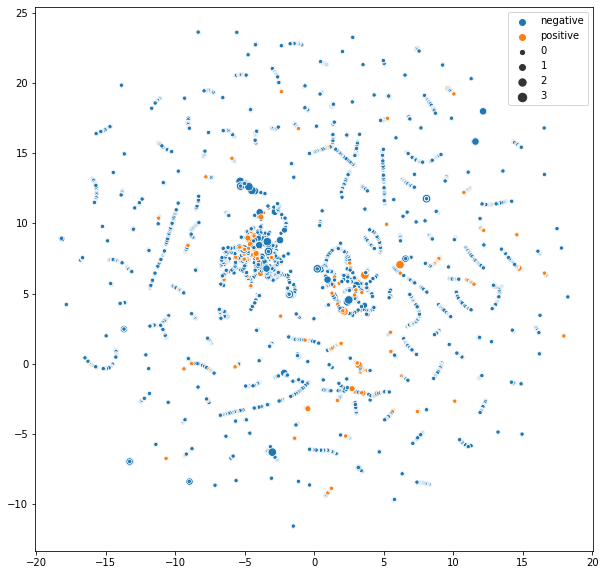

In [ ]:
plt.figure(figsize = (10,10))
colrs = list(map(lambda x: 'positive' if (x==1) else 'negative', Y_covid))
sns.scatterplot(X_umap[:,0],X_umap[:,1], size = Y_care, hue = colrs)

#### Predict COVID status <a name = "covidstatus1" />


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_covid, test_size=0.5, random_state=42, stratify = Y_covid)

In [ ]:
X_train.shape

(2822, 79)

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 'Ridge','SGD', 'SGD Elastic Net']

classifiers = [
    KNeighborsClassifier(5, weights = 'distance'),
    SVC(kernel="sigmoid", C=0.025, class_weight = 'balanced' ),
    SVC(gamma=2, C=1, class_weight = 'balanced' ),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5,  class_weight = 'balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=10, class_weight = 'balanced'),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    RidgeClassifier(class_weight = 'balanced'),
    SGDClassifier(max_iter=1000, tol=1e-3, class_weight = 'balanced'), 
    SGDClassifier(loss="log", penalty="elasticnet", class_weight = 'balanced')
    ]

Testing Classifier  Nearest Neighbors ... 
Score of  0.8816442239546421
Testing Classifier  Linear SVM ... 
Score of  0.5545712260807938
Testing Classifier  RBF SVM ... 
Score of  0.7888022678951099
Testing Classifier  Decision Tree ... 
Score of  0.8674698795180723
Testing Classifier  Random Forest ... 
Score of  0.877037562012757
Testing Classifier  Neural Net ... 
Score of  0.9053862508858965
Testing Classifier  AdaBoost ... 
Score of  0.9007795889440113
Testing Classifier  Naive Bayes ... 
Score of  0.1591070163004961
Testing Classifier  QDA ... 
Score of  0.17611622962437987
Testing Classifier  Ridge ... 
Score of  0.6651311126860383
Testing Classifier  SGD ... 
Score of  0.3667611622962438
Testing Classifier  SGD Elastic Net ... 
Score of  0.5393338058114813


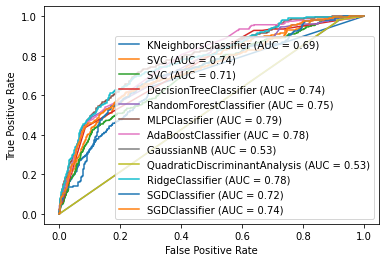

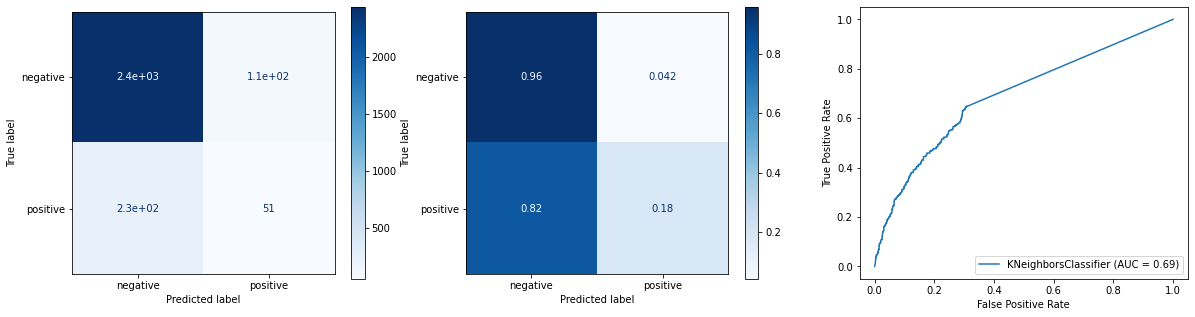

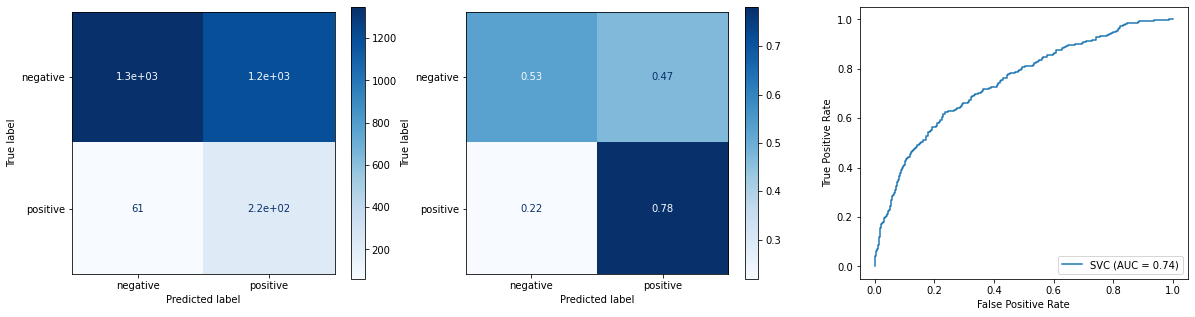

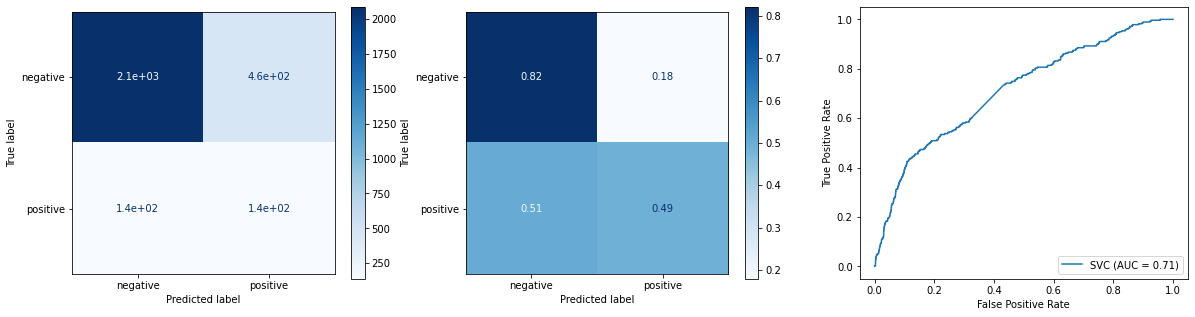

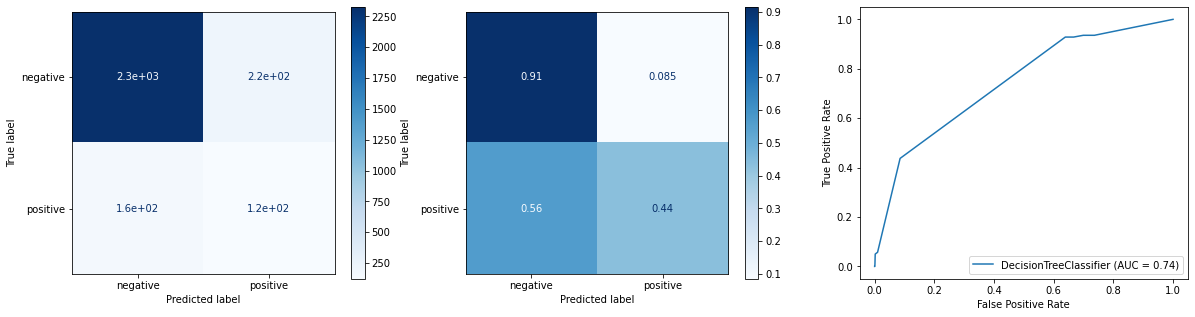

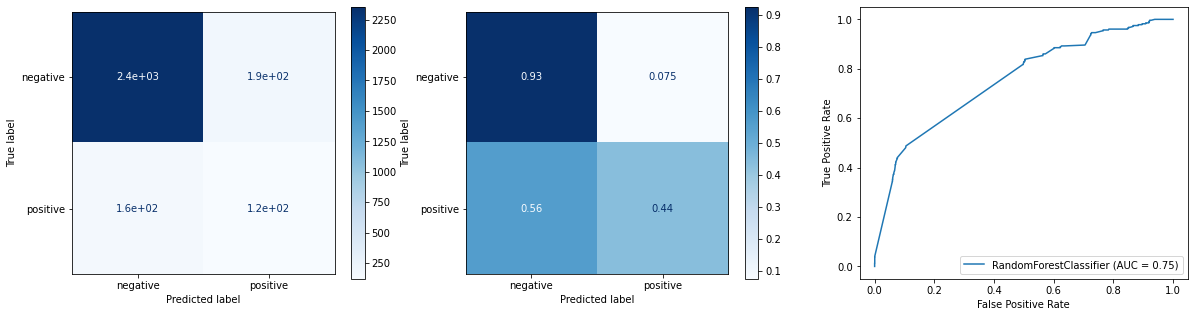

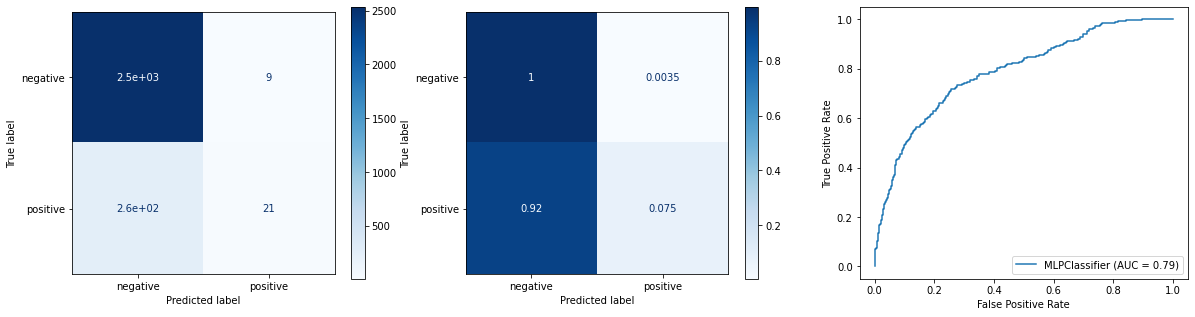

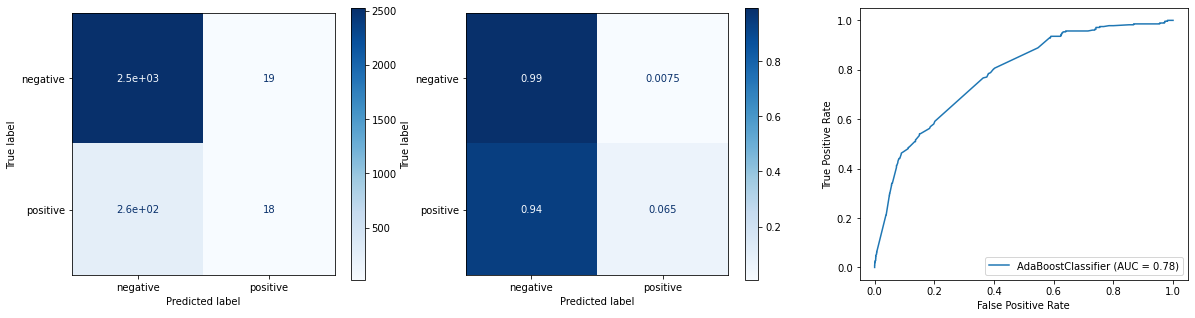

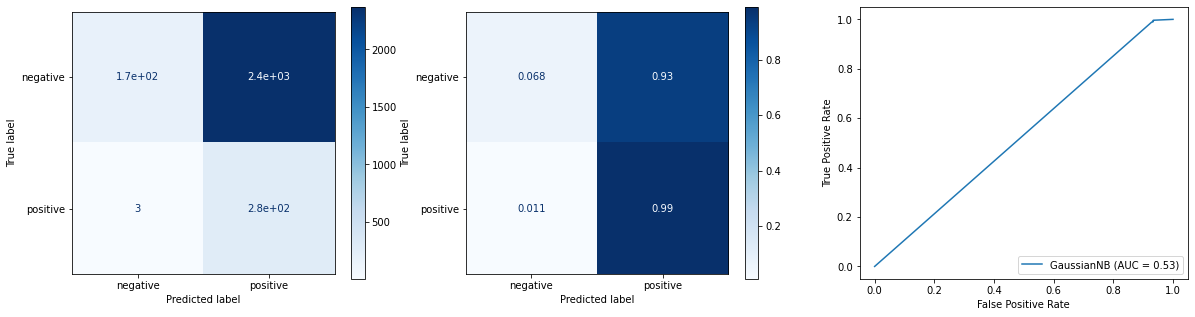

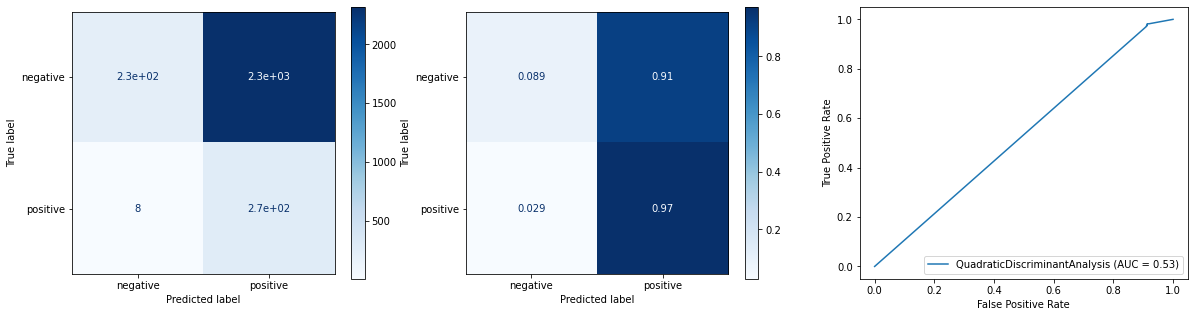

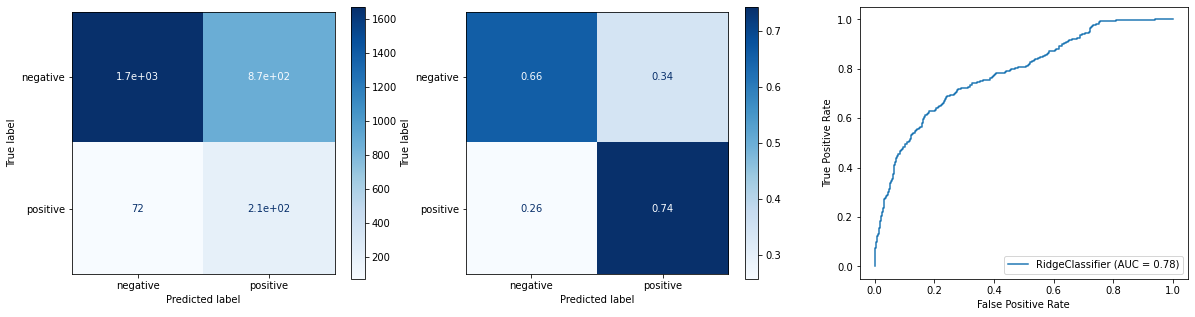

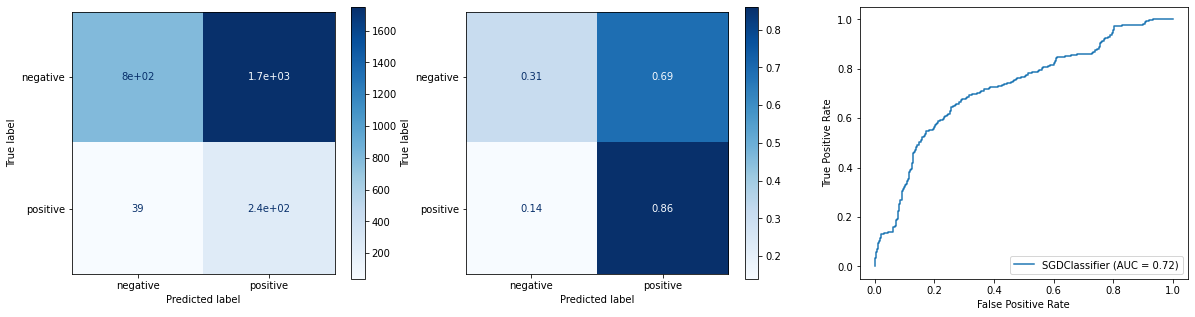

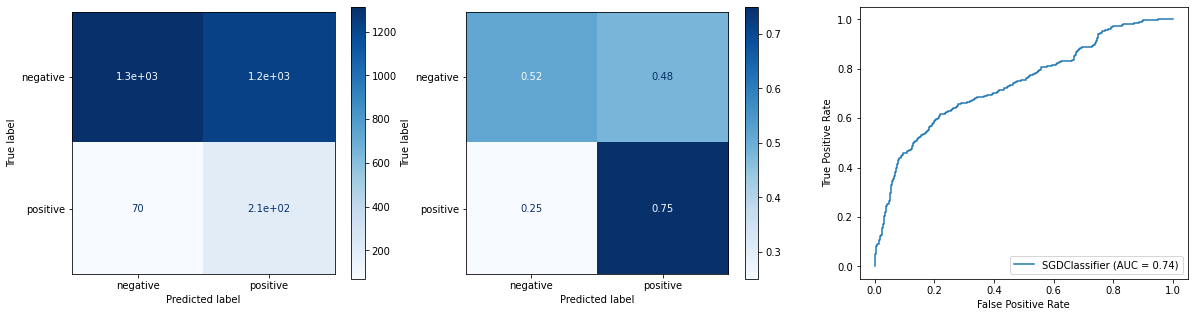

In [ ]:
fig1, ax1 = plt.subplots()

for name, clf in zip(names, classifiers):
  print("Testing Classifier ", name, "... ")
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  fig, axes = plt.subplots(1,3, figsize = (20,5))
  plot_confusion_matrix(clf, X_test, Y_test,
                                display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                cmap=plt.cm.Blues, normalize = None, ax = axes[0])
  plot_confusion_matrix(clf, X_test, Y_test,
                                display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                cmap=plt.cm.Blues, normalize = 'true', ax = axes[1])
  plot_roc_curve(clf, X_test, Y_test, ax = axes[2])
  plot_roc_curve(clf, X_test, Y_test, ax = ax1)
  acc = accuracy_score(Y_test, y_pred)
  print("Score of ", acc)

#### Predict Care Level <a name = "carelevel1" />
Multiclass for y_care
https://scikit-learn.org/stable/modules/multiclass.html

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_care, test_size=0.5, random_state=42, stratify = Y_care)

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 'Ridge','SGD', 'SGD Elastic Net',
         'Logistic Regression']

classifiers = [
    KNeighborsClassifier(5, weights = 'distance'),
    SVC(kernel="sigmoid", C=0.025, class_weight = 'balanced' ),
    SVC(gamma=2, C=1, class_weight = 'balanced' ),
    DecisionTreeClassifier(max_depth=10,  class_weight = 'balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=20, class_weight = 'balanced'),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    RidgeClassifier(class_weight = 'balanced'),
    SGDClassifier(max_iter=1000, tol=1e-3, class_weight = 'balanced'), 
    SGDClassifier(loss="log", penalty="elasticnet", class_weight = 'balanced'),
    LogisticRegression(random_state=0, class_weight='balanced')
    ]

Testing Classifier  Nearest Neighbors ... 
Score of  0.969525159461375
Testing Classifier  Linear SVM ... 
Score of  0.7498228206945429
Testing Classifier  RBF SVM ... 
Score of  0.9089298369950389
Testing Classifier  Decision Tree ... 
Score of  0.8936924167257264
Testing Classifier  Random Forest ... 
Score of  0.7725017717930546
Testing Classifier  Neural Net ... 
Score of  0.9698795180722891
Testing Classifier  AdaBoost ... 
Score of  0.9585400425230333
Testing Classifier  Naive Bayes ... 


ValueError: ignored

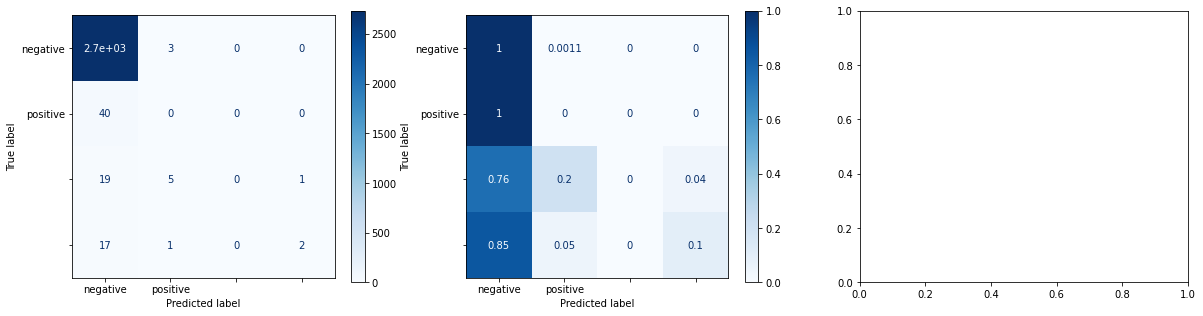

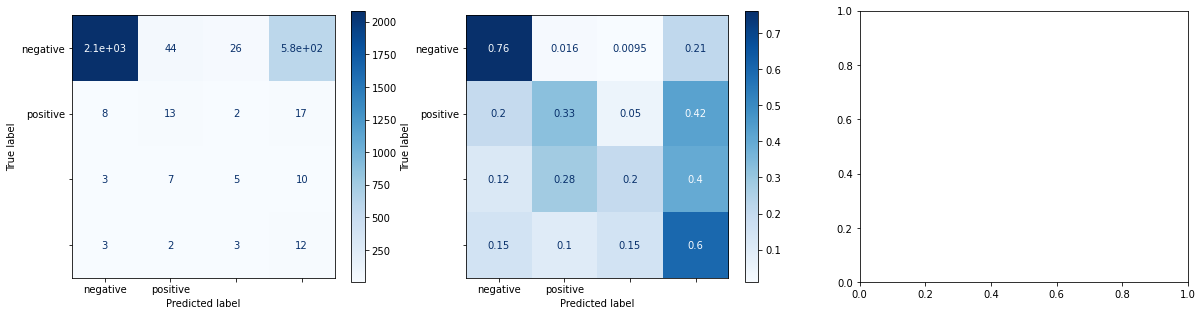

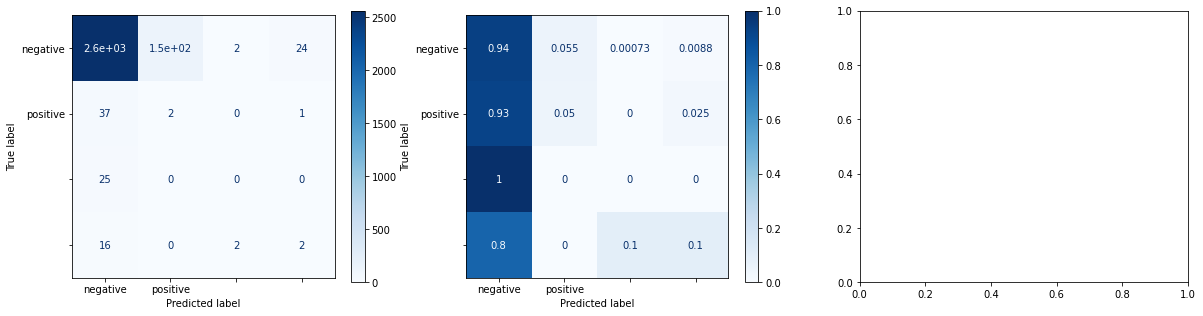

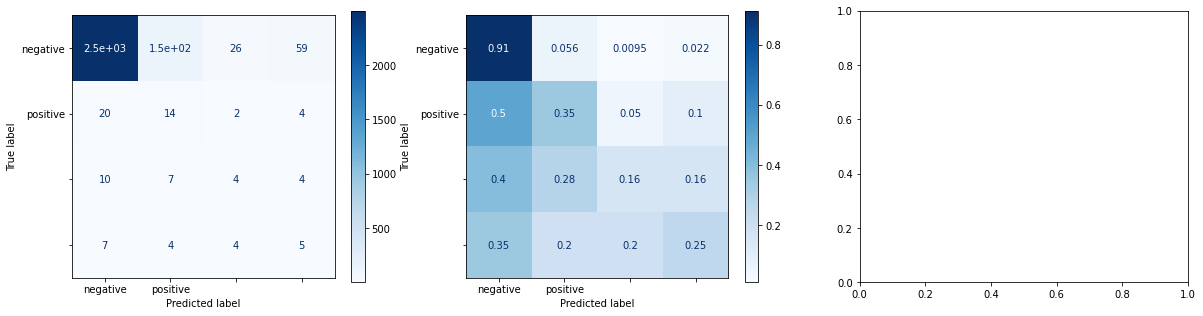

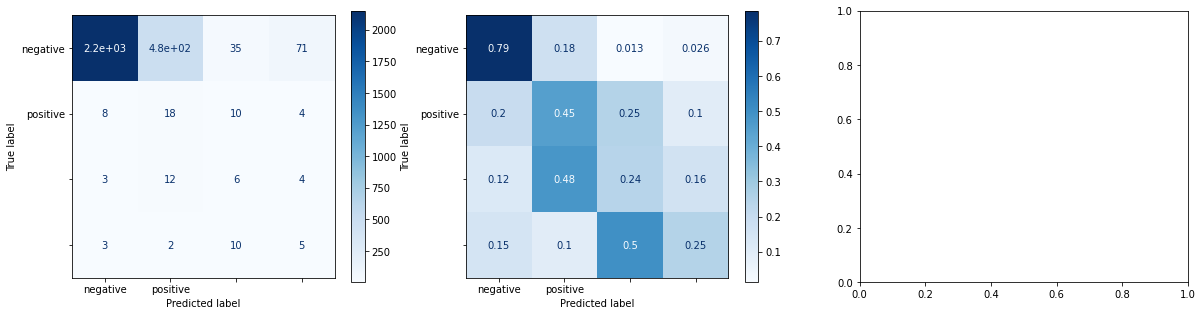

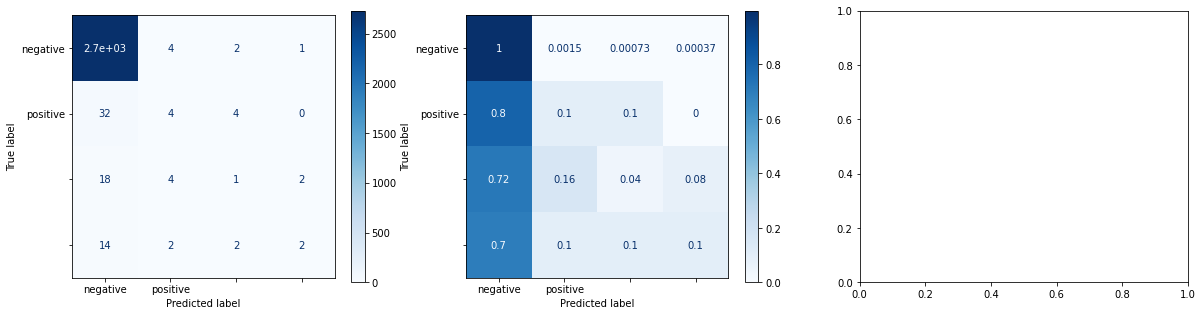

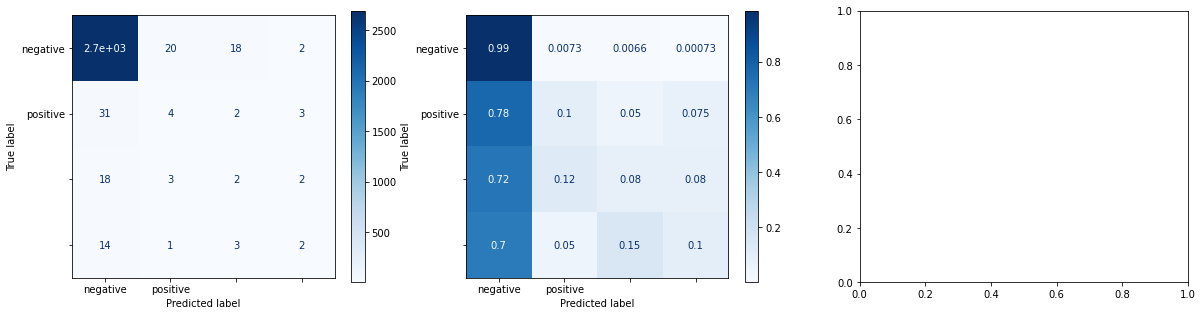

In [ ]:
#fig1, ax1 = plt.subplots()

for name, clf in zip(names, classifiers):
  print("Testing Classifier ", name, "... ")
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  fig, axes = plt.subplots(1,3, figsize = (20,5))
  plot_confusion_matrix(clf, X_test, Y_test,
                                display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                cmap=plt.cm.Blues, normalize = None, ax = axes[0])
  plot_confusion_matrix(clf, X_test, Y_test,
                                display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                cmap=plt.cm.Blues, normalize = 'true', ax = axes[1])
  # plot_roc_curve(clf, X_test, Y_test, ax = axes[2]) --> can use multi-class ROC - averages or one vs other.
  acc = accuracy_score(Y_test, y_pred)
  print("Score of ", acc)

## NO NAN Data <a name = "datanonan" />

In [ ]:
# # Run this if importing a file
# from google.colab import files
# datafile = files.upload() # Choose the file
# filename = list(datafile.keys())[0] # Get the filename
# import os
# dir = os.getcwd() # Get current directory name
# covid_data_nonan = pd.read_csv(dir + '//' + filename)

In [ ]:
Y_covid = np.array(covid_data_nonan['SARSCov2_test_result'])
Y_care = np.array(covid_data_nonan['care_level'])
X = np.array(covid_data_nonan.drop(['SARSCov2_test_result', 'care_level'], axis = 1))

In [ ]:
# Run if scaling data 
X = StandardScaler().fit_transform(X)

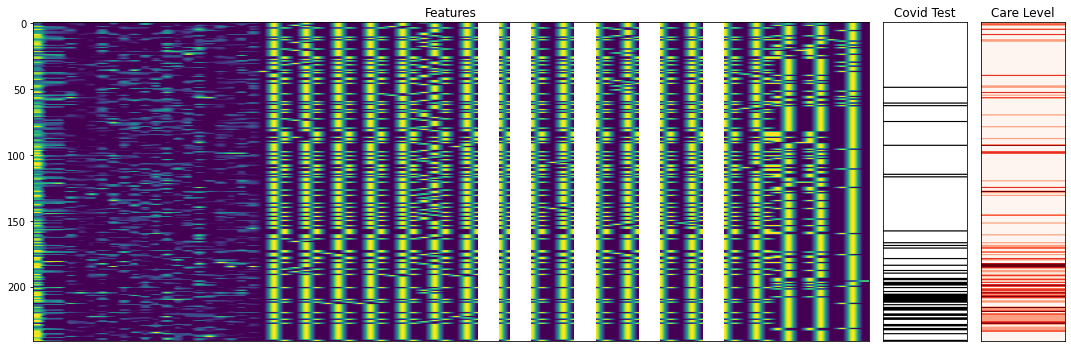

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15,5), gridspec_kw={'width_ratios': [10,1,1]})

axes[0].imshow(X/X.max(axis=0), aspect = 'auto', vmax = 1, vmin = 0); axes[0].set_xticks([]); axes[0].title.set_text('Features')
axes[1].imshow(np.expand_dims(Y_covid, axis=1), aspect = 'auto', cmap = 'Greys', vmax = 1, vmin = 0); axes[1].set_yticks([]); axes[1].set_xticks([]); axes[1].title.set_text('Covid Test');
axes[2].imshow(np.expand_dims(Y_care, axis=1), aspect = 'auto', cmap = 'Reds', vmax = 3, vmin = 0); axes[2].set_yticks([]); axes[2].set_xticks([]); axes[2].title.set_text('Care Level');
fig.tight_layout()

#### Reduce Dimensions <a name = "pca2" />

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

Text(0.5, 0, 'Number of Components')

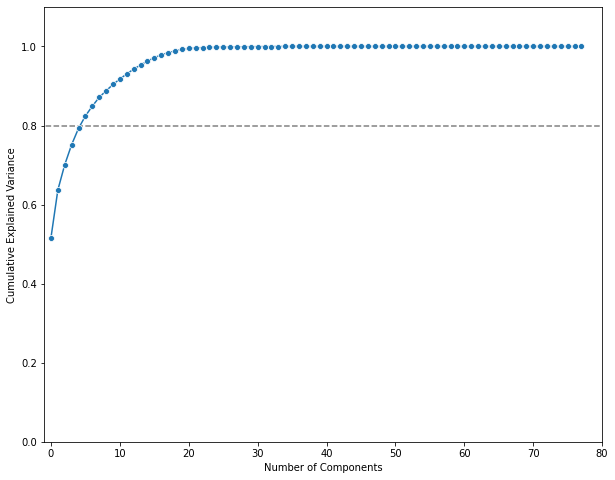

In [ ]:
plt.figure(figsize = (10,8))
sns.lineplot(x = np.arange(pca.n_components_), y = np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.hlines(.80, -10, 90, linestyles = 'dashed', alpha = .5)
plt.ylabel('Cumulative Explained Variance')
plt.xlim([-1,80]); plt.ylim([0,1.1])
plt.xlabel('Number of Components')

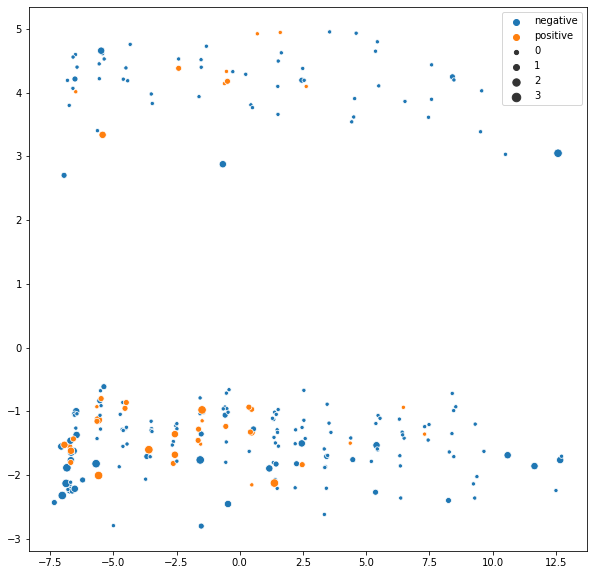

In [ ]:
plt.figure(figsize = (10,10))
colrs = list(map(lambda x: 'positive' if (x==1) else 'negative', Y_covid))
sns.scatterplot(X_pca[:,0],X_pca[:,1], size = Y_care, hue = colrs)

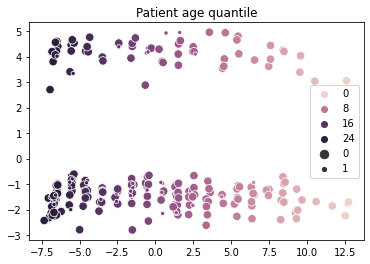

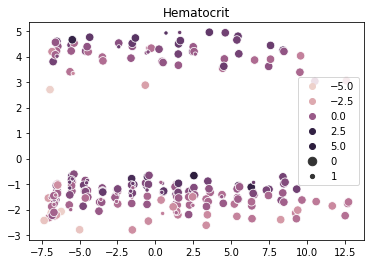

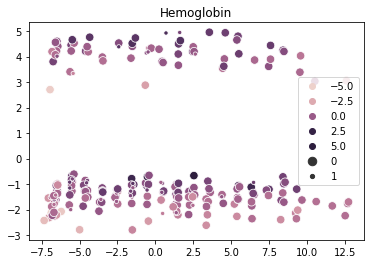

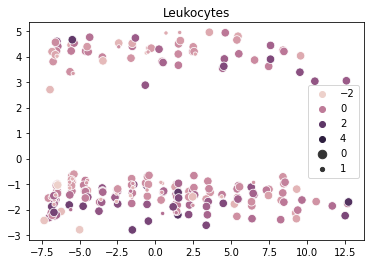

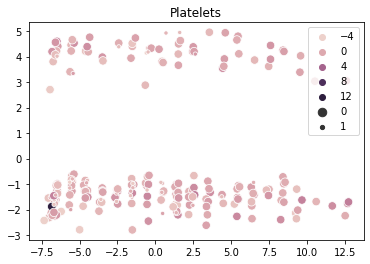

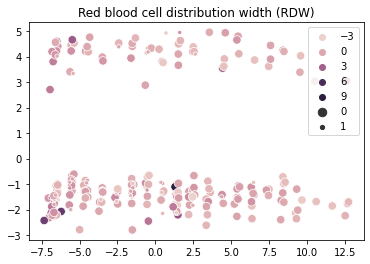

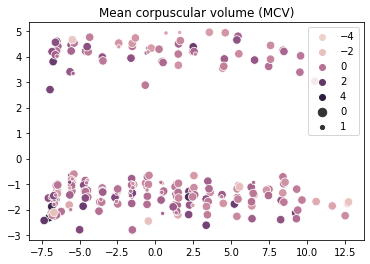

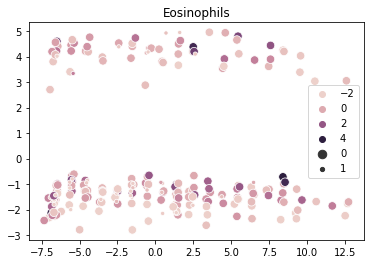

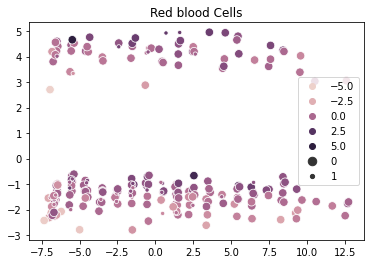

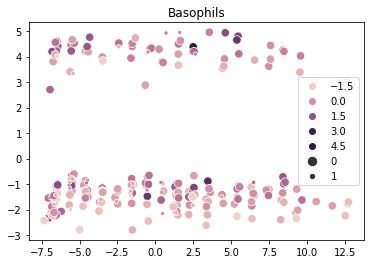

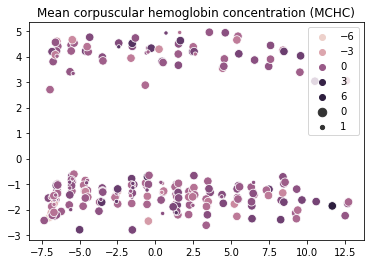

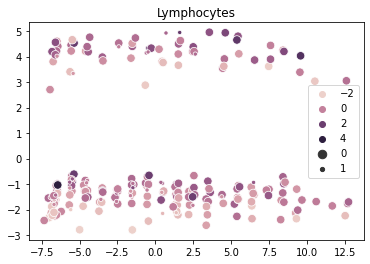

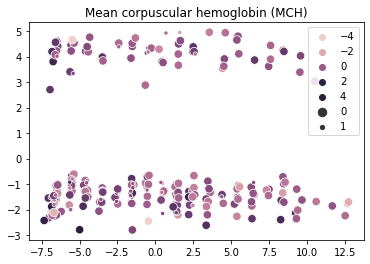

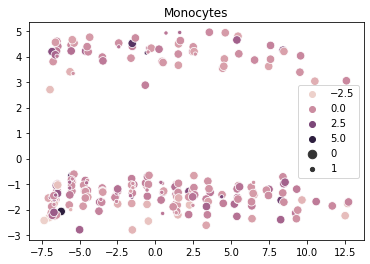

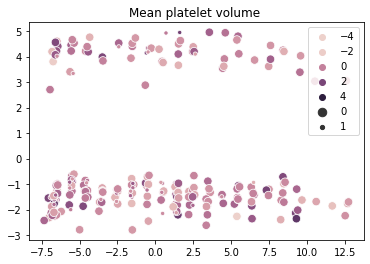

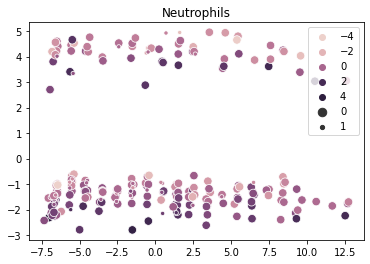

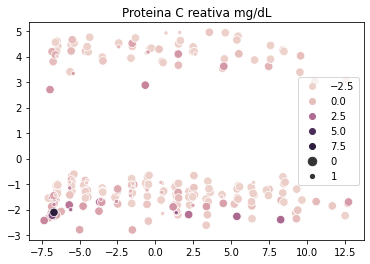

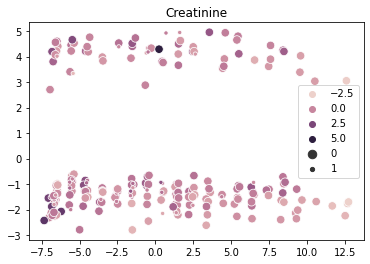

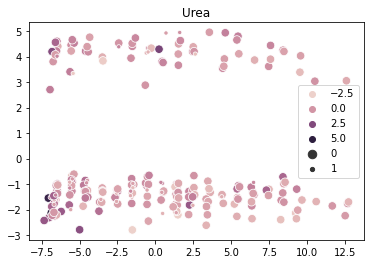

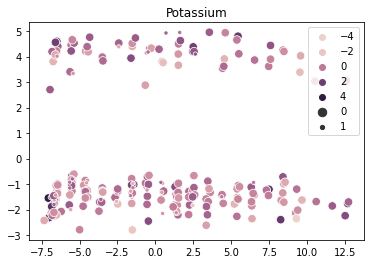

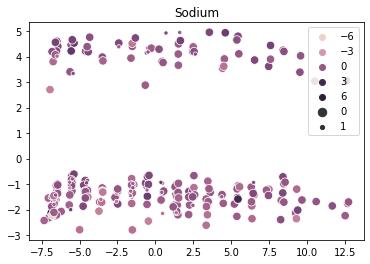

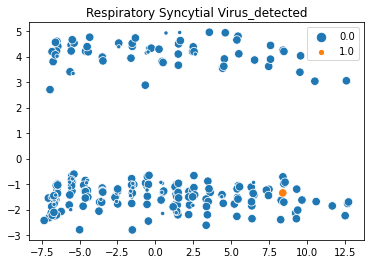

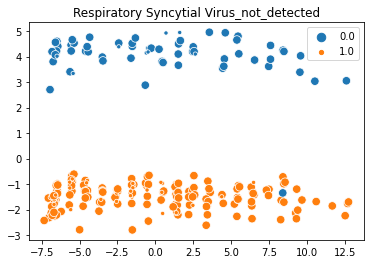

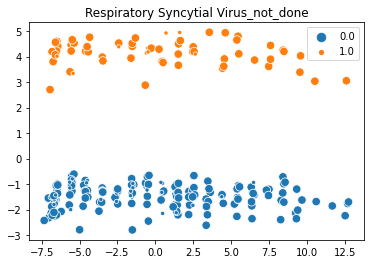

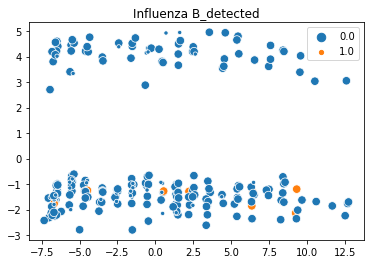

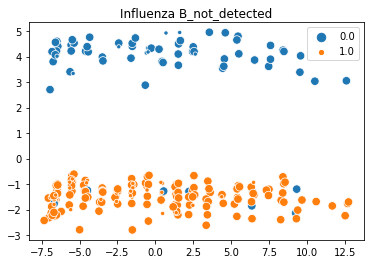

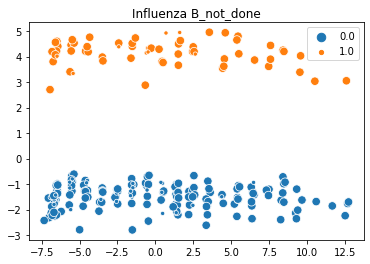

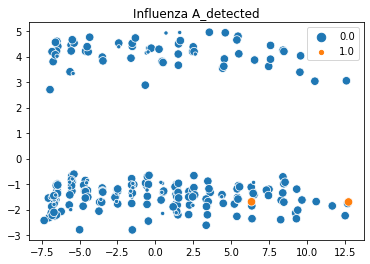

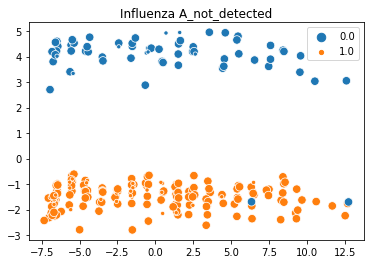

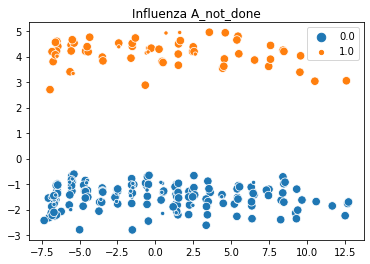

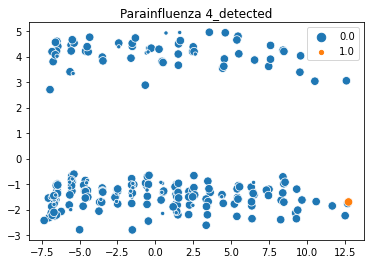

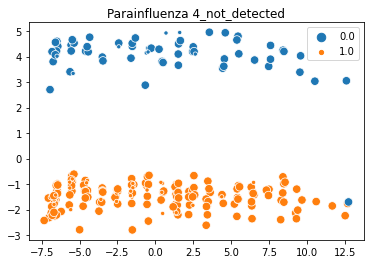

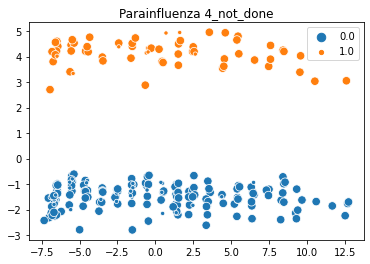

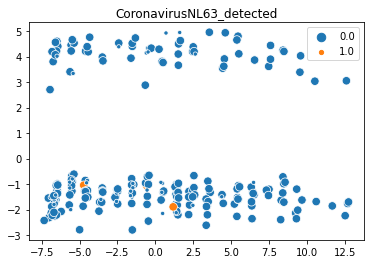

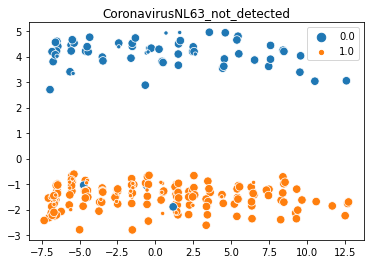

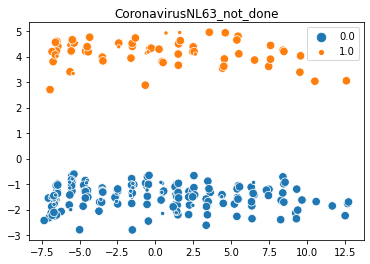

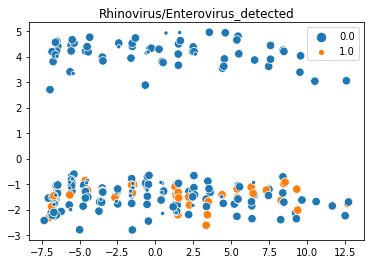

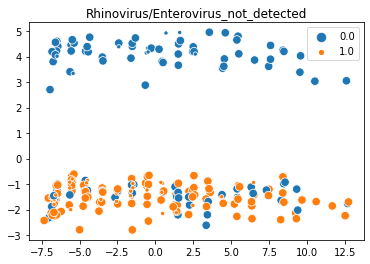

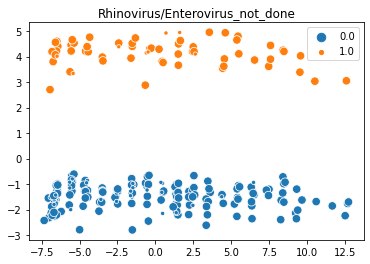

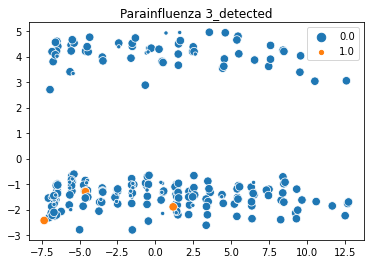

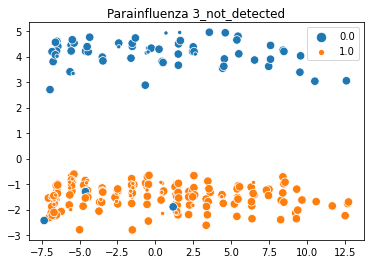

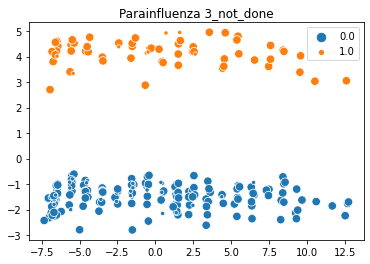

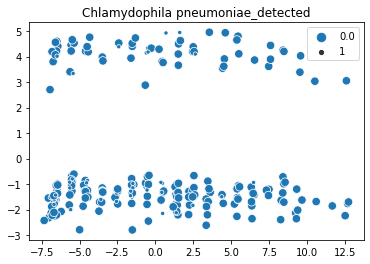

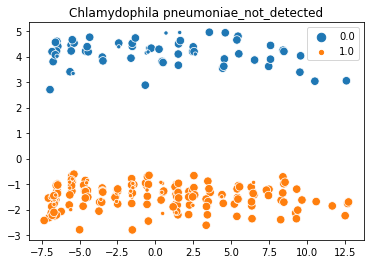

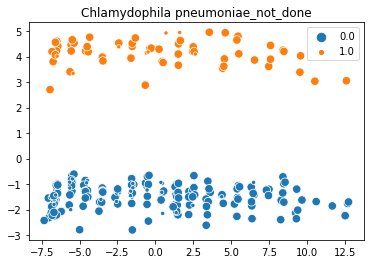

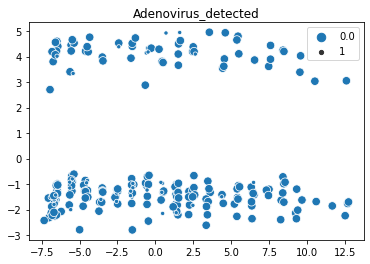

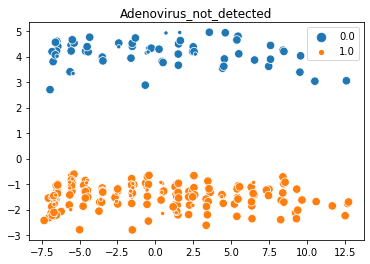

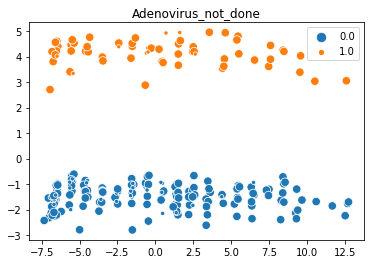

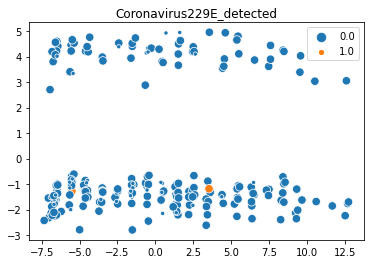

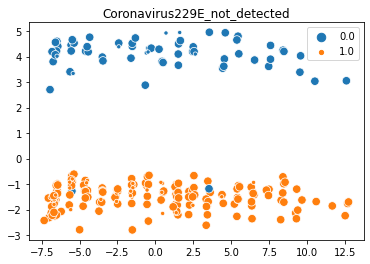

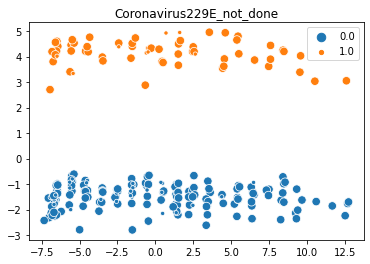

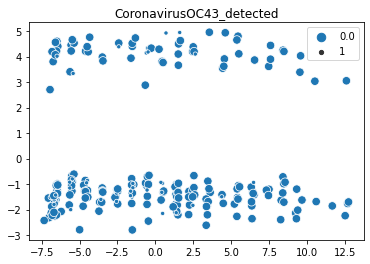

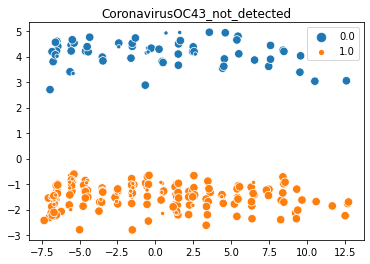

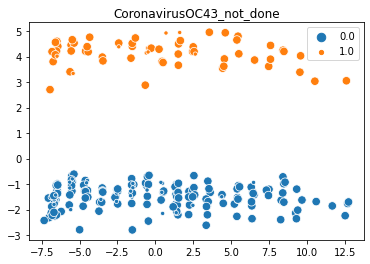

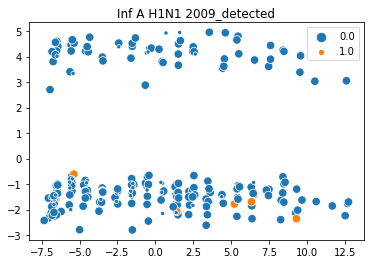

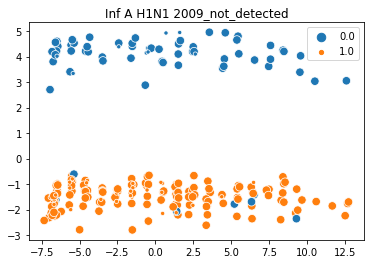

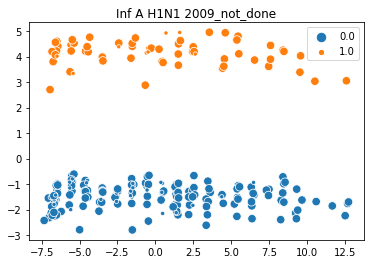

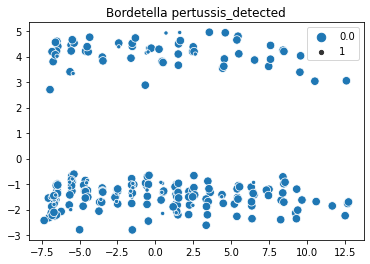

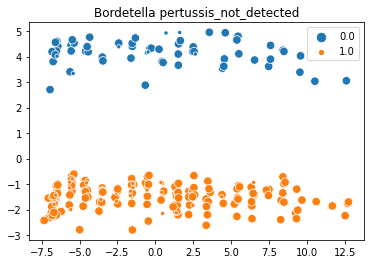

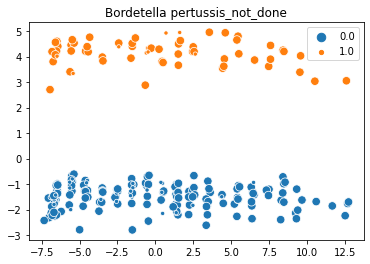

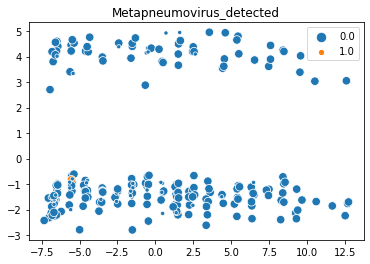

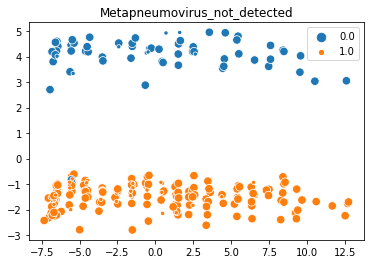

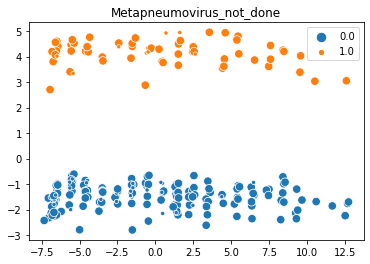

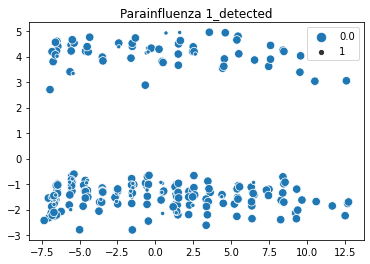

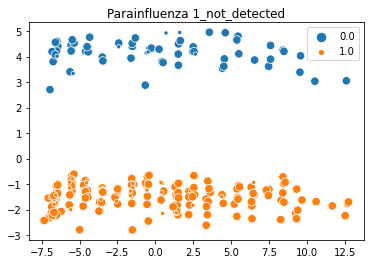

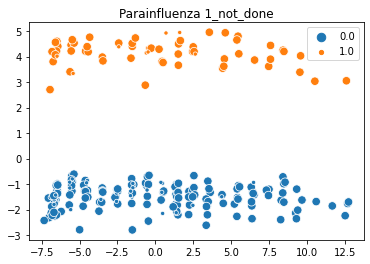

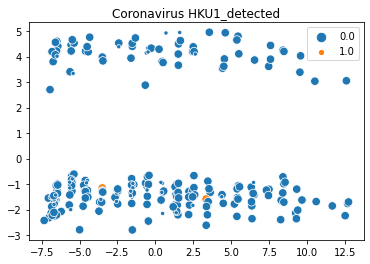

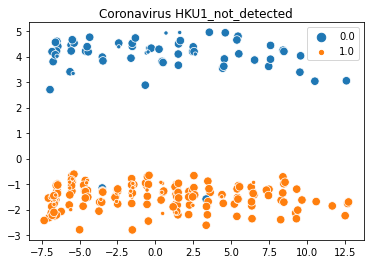

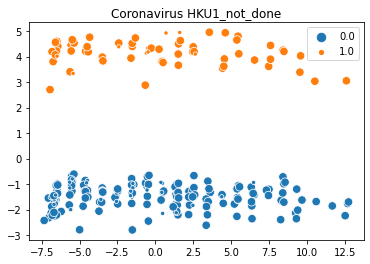

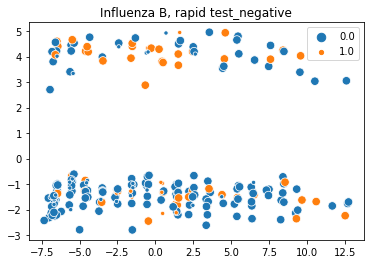

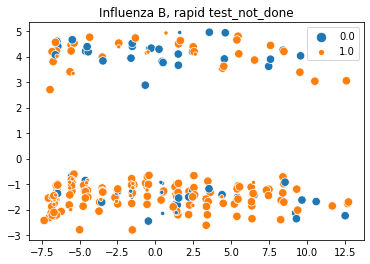

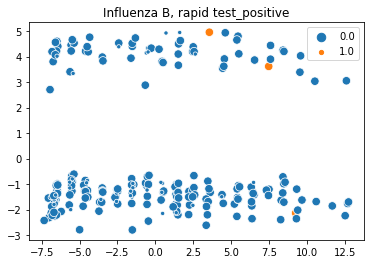

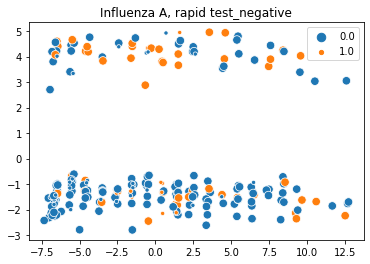

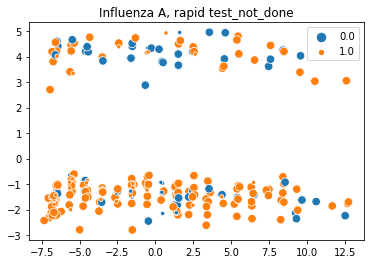

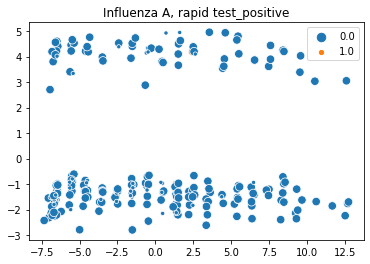

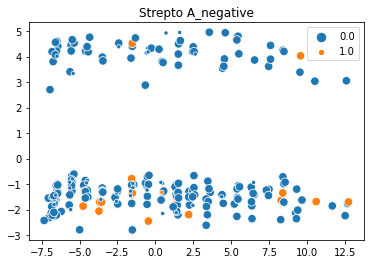

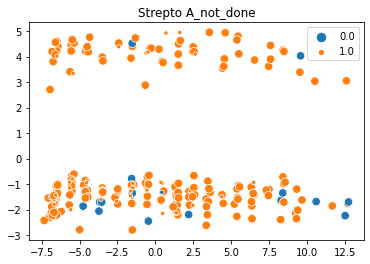

In [ ]:
# Color by each column to see what may be contributing to the separation
for i in np.arange(77):
  sns.scatterplot(X_pca[:,0],X_pca[:,1], size = Y_covid, hue = X[:,i])
  plt.title(covid_data_nonan.columns[i+2])
  plt.show()

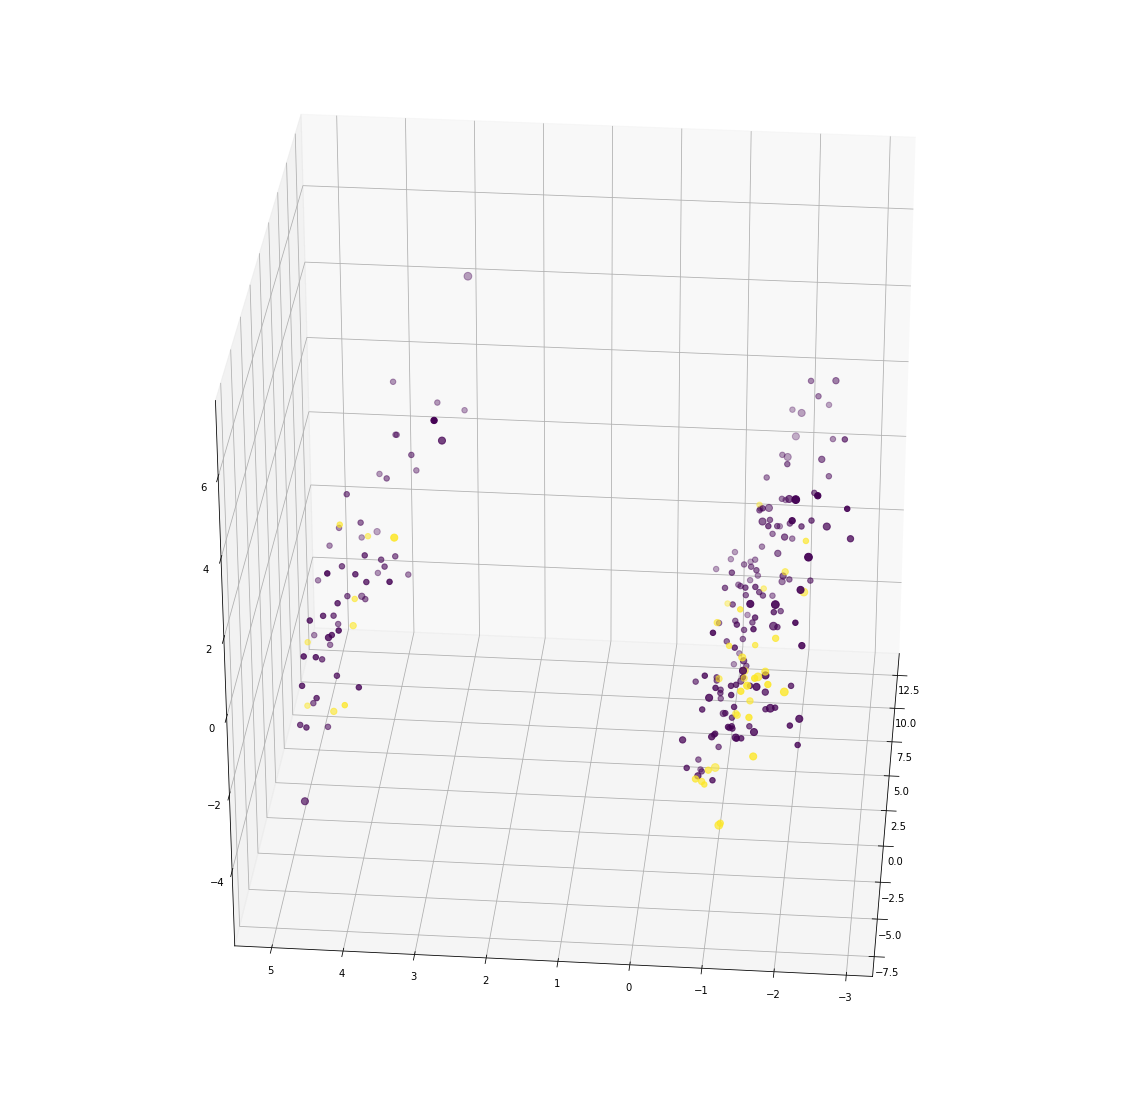

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1], X_pca[:,2], c=Y_covid, s = (Y_care+3)*10)
ax.view_init(30, 185)

plt.show()

In [ ]:
import umap
umap = umap.UMAP(n_neighbors=5, random_state=42)
X_umap = umap.fit_transform(X)

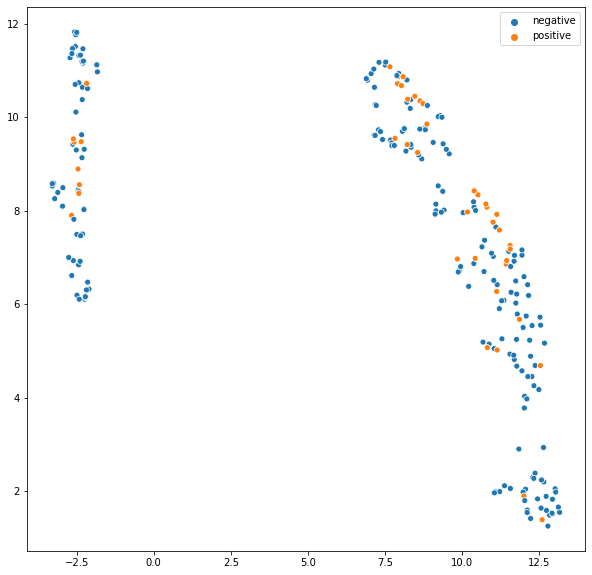

In [ ]:
plt.figure(figsize = (10,10))
colrs = list(map(lambda x: 'positive' if (x==1) else 'negative', Y_covid))
sns.scatterplot(X_umap[:,0],X_umap[:,1], hue = colrs)

#### Predict COVID status <a name = "covidstatus2" />

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_covid, test_size=0.5, random_state=42, stratify = Y_covid)

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 'LDA','Ridge','SGD', 'SGD Elastic Net',
         'Logistic Regression']

classifiers = [
    KNeighborsClassifier(5, weights = 'distance'),
    SVC(kernel="sigmoid", C=0.025, class_weight = 'balanced' ),
    SVC(gamma=2, C=1, class_weight = 'balanced' ),
    DecisionTreeClassifier(max_depth=10,  class_weight = 'balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=20, class_weight = 'balanced'),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(priors=[.8,.2]),
    QuadraticDiscriminantAnalysis(reg_param = .1), 
    LinearDiscriminantAnalysis(),
    RidgeClassifier(class_weight = 'balanced'),
    SGDClassifier(max_iter=1000, tol=1e-3, class_weight = 'balanced'), 
    SGDClassifier(loss="log", penalty="elasticnet", class_weight = 'balanced'),
    LogisticRegression(random_state=0, class_weight='balanced')
    ]

Testing Classifier  Nearest Neighbors ... 
Score of  0.8347107438016529
Testing Classifier  Linear SVM ... 
Score of  0.2975206611570248
Testing Classifier  RBF SVM ... 
Score of  0.8264462809917356
Testing Classifier  Decision Tree ... 
Score of  0.8264462809917356
Testing Classifier  Random Forest ... 
Score of  0.8677685950413223
Testing Classifier  Neural Net ... 
Score of  0.8512396694214877
Testing Classifier  AdaBoost ... 
Score of  0.8429752066115702
Testing Classifier  Naive Bayes ... 
Score of  0.48760330578512395
Testing Classifier  QDA ... 
Score of  0.8264462809917356
Testing Classifier  LDA ... 
Score of  0.8016528925619835
Testing Classifier  Ridge ... 
Score of  0.7768595041322314
Testing Classifier  SGD ... 
Score of  0.8264462809917356
Testing Classifier  SGD Elastic Net ... 
Score of  0.7520661157024794
Testing Classifier  Logistic Regression ... 
Score of  0.8181818181818182


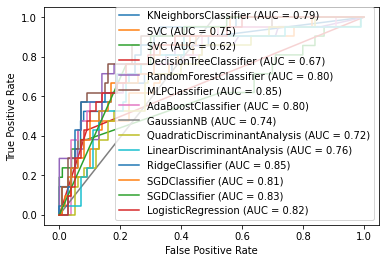

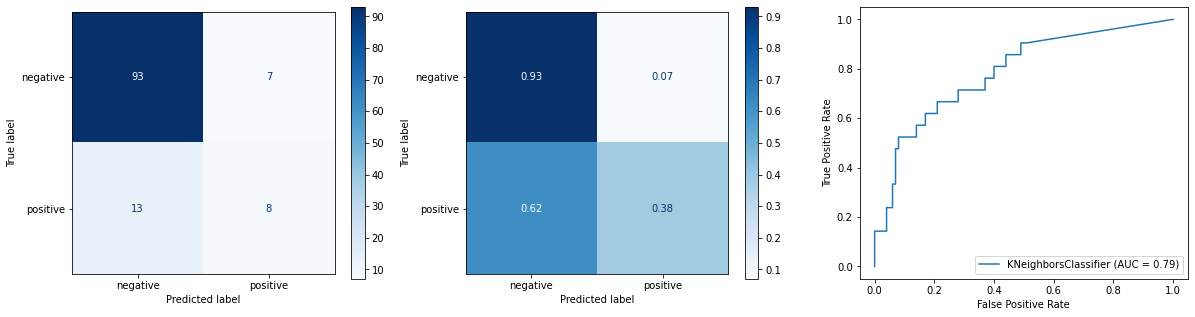

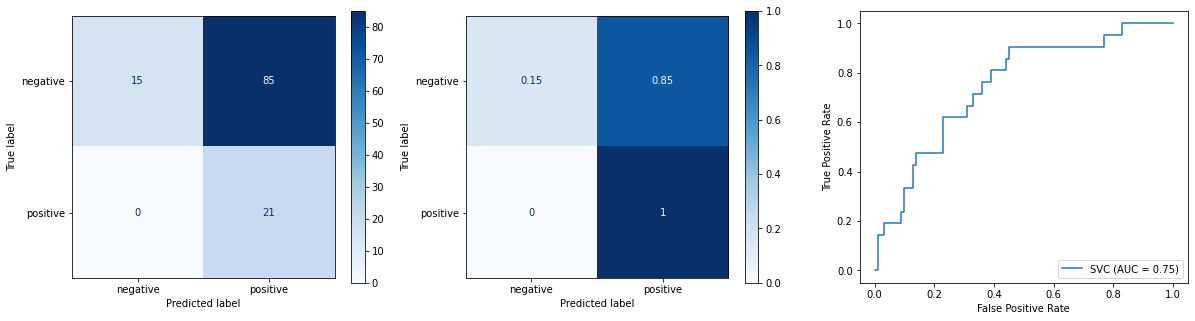

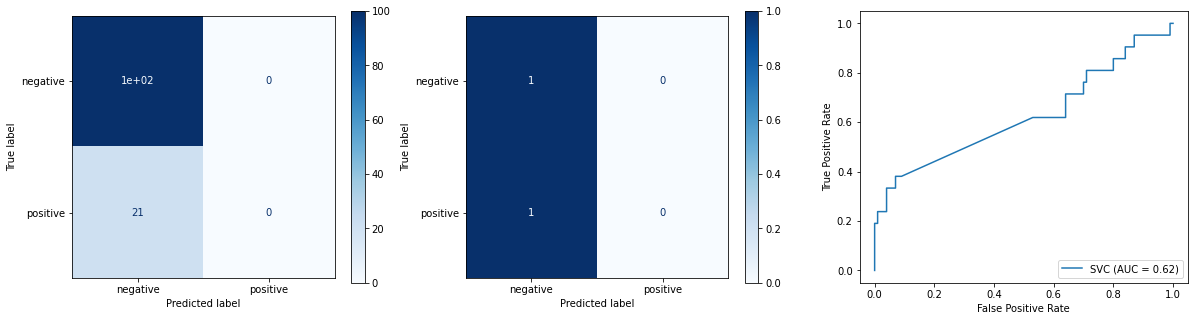

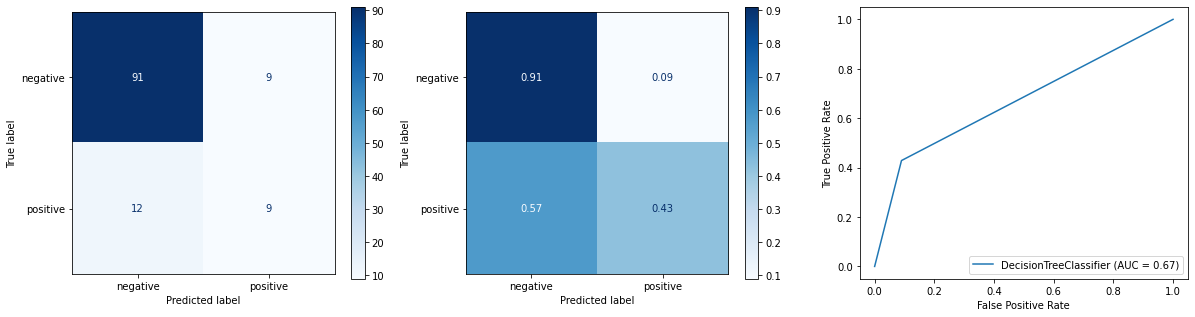

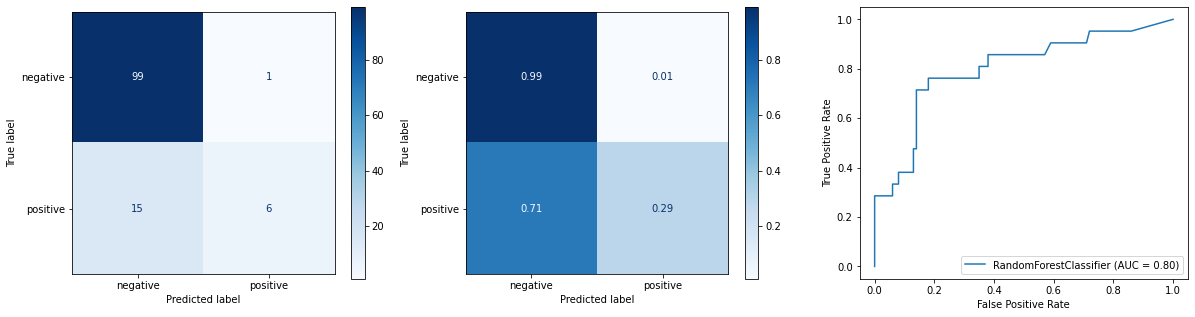

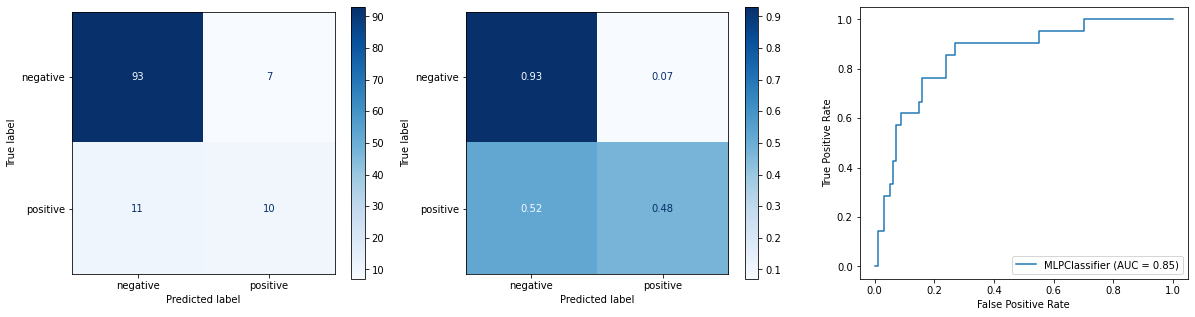

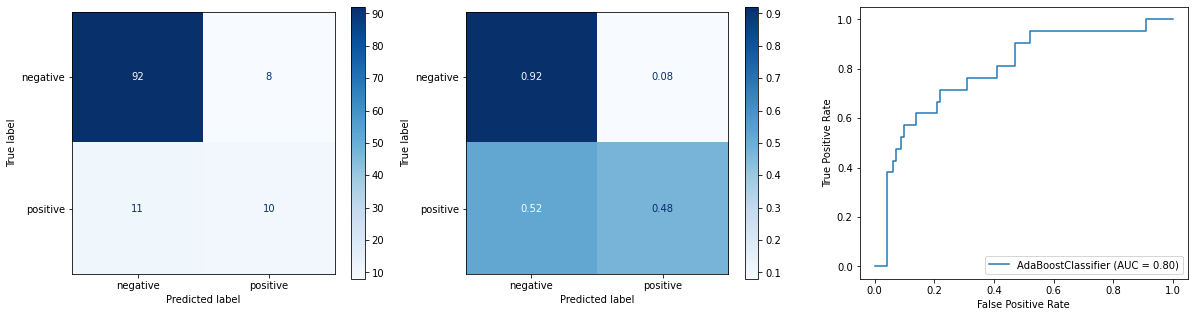

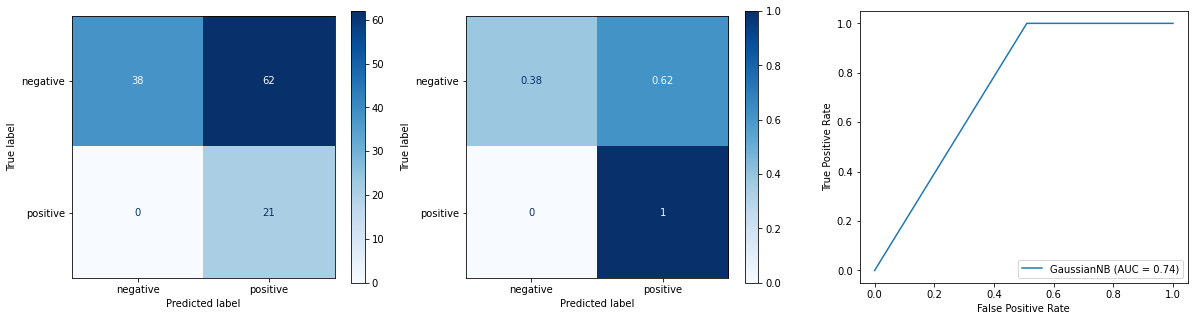

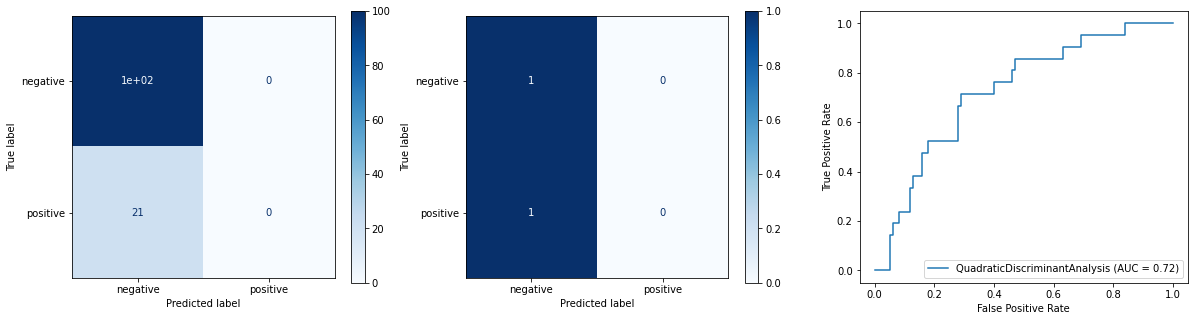

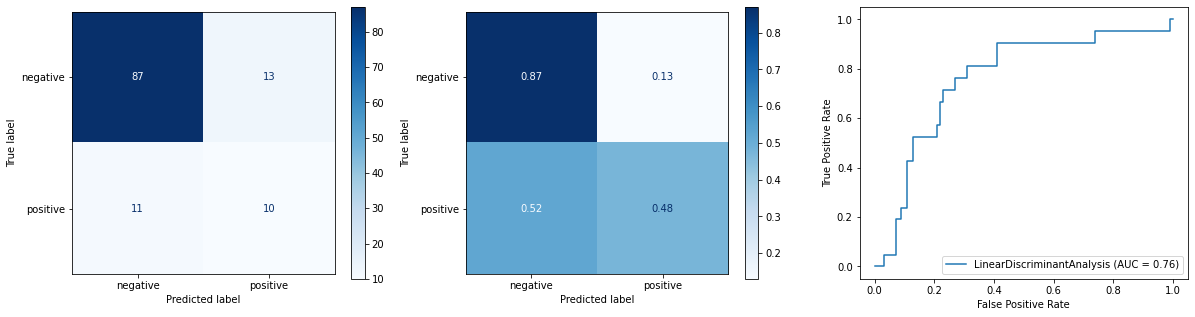

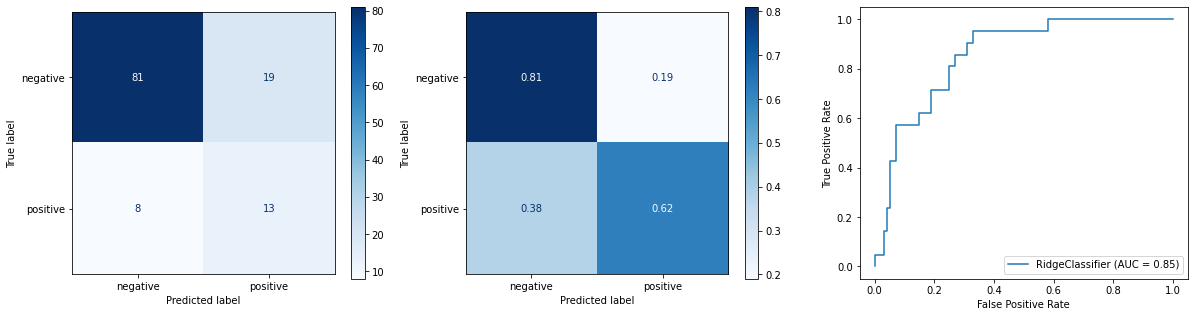

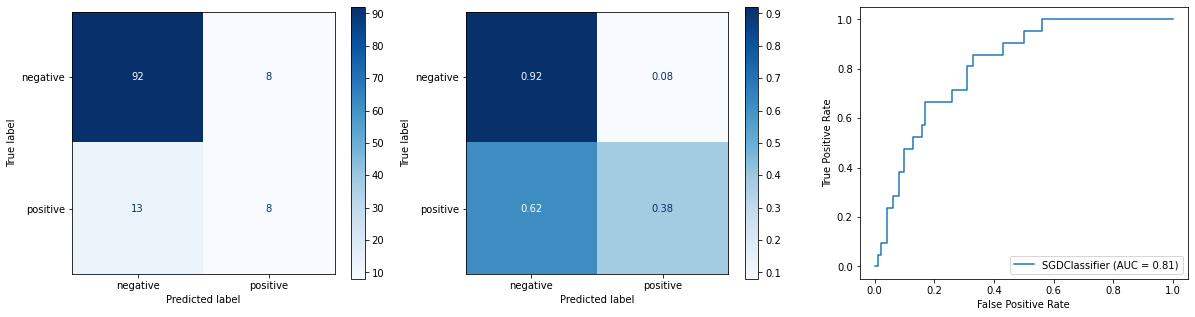

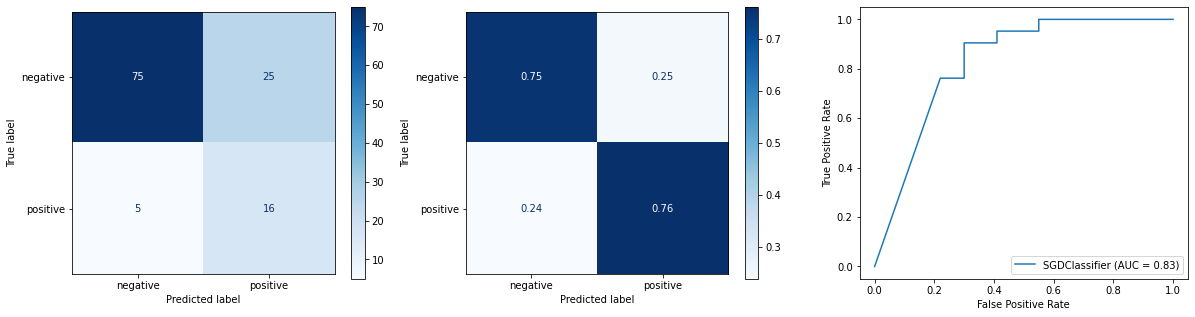

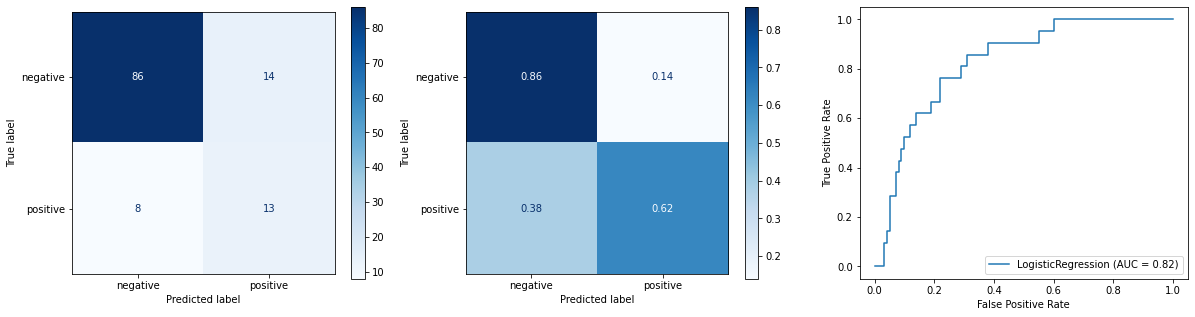

In [ ]:
fig1, ax1 = plt.subplots()

for name, clf in zip(names, classifiers):
  print("Testing Classifier ", name, "... ")
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  fig, axes = plt.subplots(1,3, figsize = (20,5))
  plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                 cmap=plt.cm.Blues, normalize = None, ax = axes[0])
  plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                 cmap=plt.cm.Blues, normalize = 'true', ax = axes[1])
  plot_roc_curve(clf, X_test, Y_test, ax = axes[2])
  plot_roc_curve(clf, X_test, Y_test, ax = ax1)
  acc = accuracy_score(Y_test, y_pred)
  print("Score of ", acc)

#### Examining Models. Feature Importance. <a name = "deepdive2" />

Here is an example using linear regression to predict covid status.
Note, you can use other regressors to predict classes, you just need to think about what the outcome means.

Mean squared error: 0.32
Coefficient of determination: -1.22


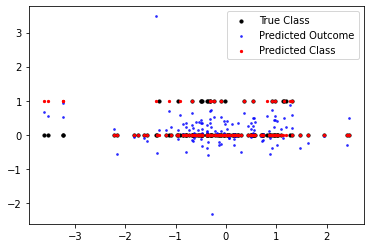

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test[:,1],Y_test, color='black', s = 10, label = 'True Class')
plt.scatter(X_test[:,1],Y_pred, color='blue', alpha = .7, s = 3, label = 'Predicted Outcome')
plt.scatter(X_test[:,1], np.where(Y_pred > 0.5, 1, 0), color='red', s = 5, label = 'Predicted Class')
plt.legend()
plt.show()

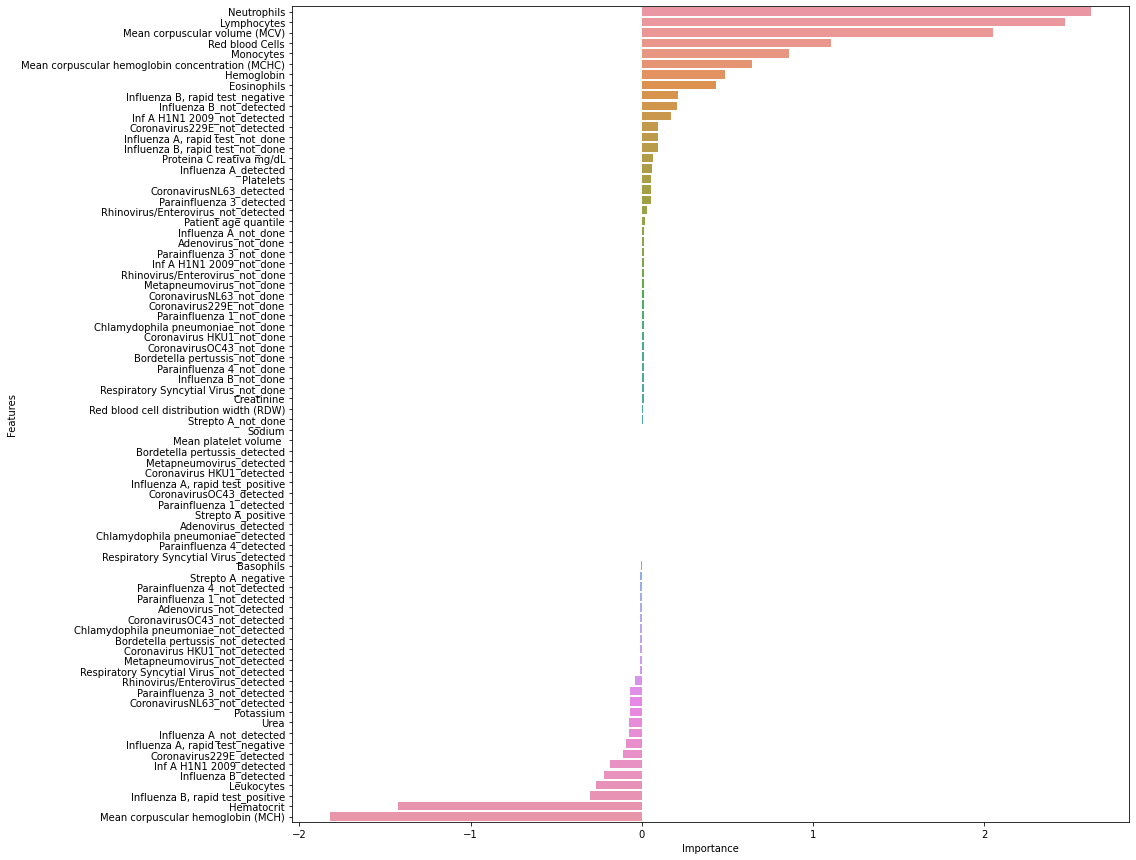

In [ ]:
# For linear regression, we can plot out the coefficient for each feature to see how it is weighted. High positive and negative weights suggest that they are correlated.
reg_features = pd.DataFrame({'Features': covid_data_nonan.columns[2:], 'Importance': reg.coef_})
reg_features = reg_features.sort_values(by = ['Importance'], ascending = False)
plt.figure(figsize = (15,15))
sns.barplot(y = 'Features', x = 'Importance', data = reg_features, orient='h')

Let's use Ridge Classifier to look at coefficients then use permutation of columns to determine feature importance

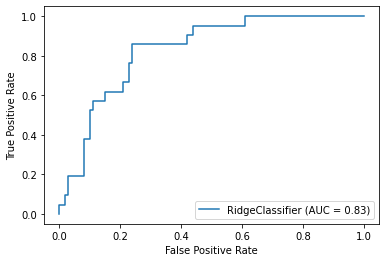

In [ ]:
clf = RidgeClassifier(alpha = .5)
clf.fit(X_train, Y_train)
plot_roc_curve(clf, X_test, Y_test)

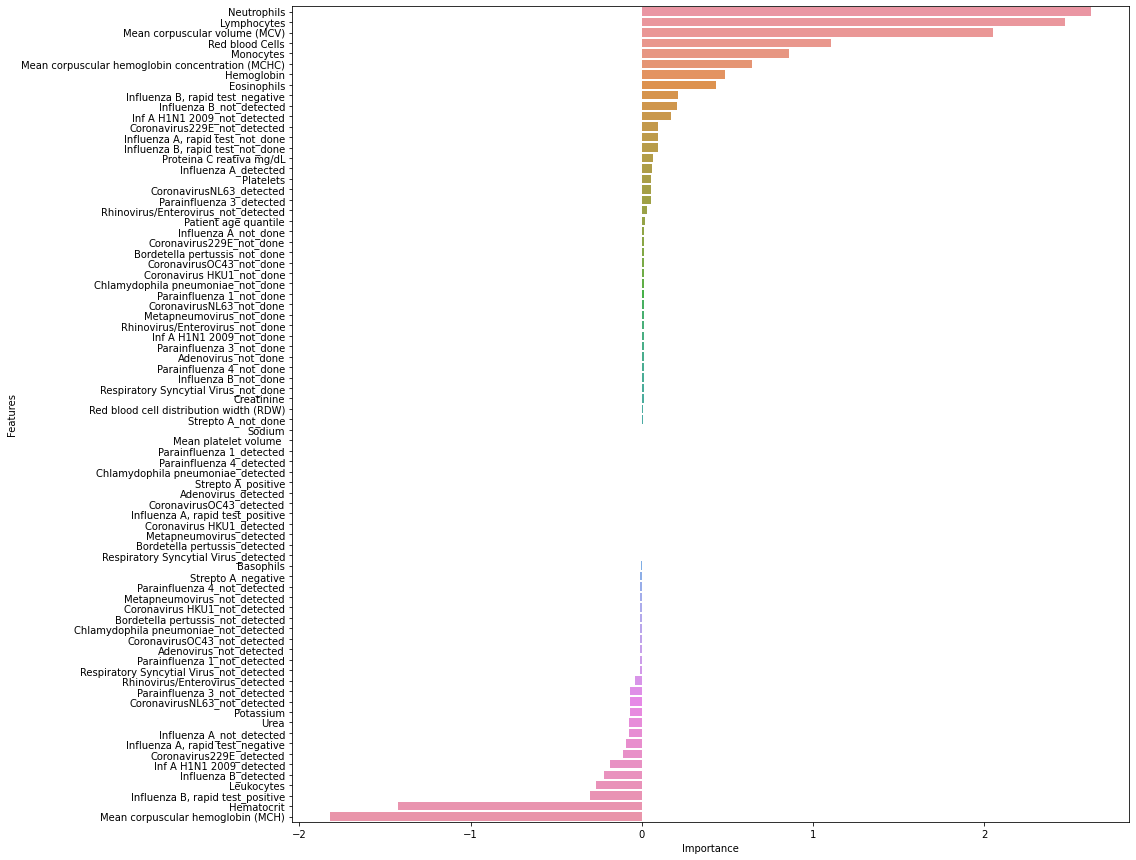

In [ ]:
# plot out coefficient for each feature
clf_features = pd.DataFrame({'Features': covid_data_nonan.columns[2:], 'Importance': clf.coef_[0,:]})
clf_features = reg_features.sort_values(by = ['Importance'], ascending = False)
plt.figure(figsize = (15,15))
sns.barplot(y = 'Features', x = 'Importance', data = clf_features, orient='h')

In [ ]:
# Permutate columns to determine how much scrambling columns affect accuracy
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_train, Y_train, n_repeats=100, random_state=42)
result.importances_mean
#result.importances_std

array([ 2.60330579e-02,  4.64462810e-02,  5.52066116e-02,  1.32479339e-01,
       -4.46280992e-03, -1.65289256e-04,  4.80165289e-02,  1.48760331e-02,
        2.02727273e-01,  8.84297521e-03,  6.36363636e-03, -4.79338843e-03,
        4.65289256e-02,  1.61157025e-02, -6.61157025e-04, -8.67768595e-03,
       -6.61157025e-04, -9.91735537e-04,  3.14049587e-03,  1.06611570e-02,
       -8.26446281e-05,  0.00000000e+00, -5.28925620e-03, -5.28925620e-03,
        4.79338843e-03,  2.70247934e-02, -5.28925620e-03,  0.00000000e+00,
       -5.20661157e-03, -5.28925620e-03,  0.00000000e+00, -5.28925620e-03,
       -5.28925620e-03,  0.00000000e+00,  3.30578512e-04, -5.28925620e-03,
       -3.38842975e-03,  0.00000000e+00, -5.28925620e-03,  0.00000000e+00,
        3.30578512e-04, -5.28925620e-03,  0.00000000e+00, -5.28925620e-03,
       -5.28925620e-03,  0.00000000e+00, -5.28925620e-03, -5.28925620e-03,
        0.00000000e+00, -3.88429752e-03, -5.28925620e-03,  0.00000000e+00,
       -5.28925620e-03, -

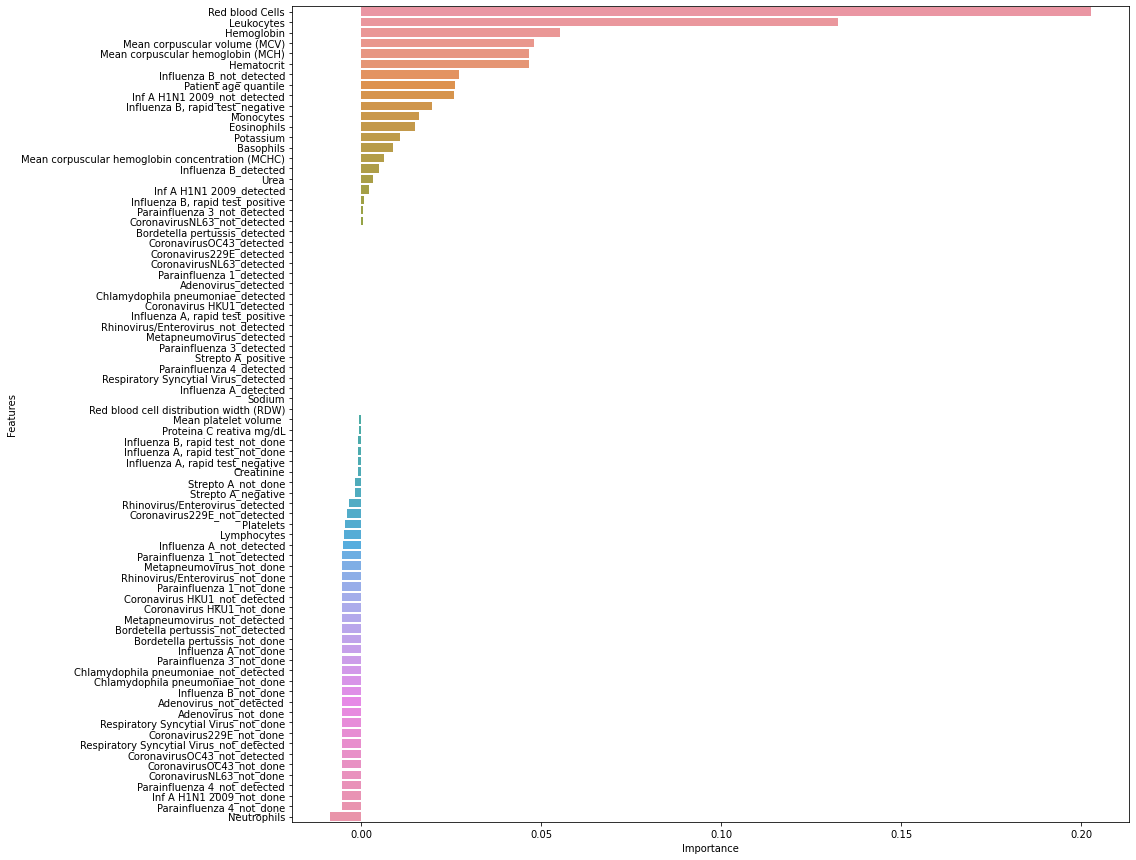

In [ ]:
reg_features = pd.DataFrame({'Features': covid_data_nonan.columns[2:], 'Importance': result.importances_mean})
reg_features = reg_features.sort_values(by = ['Importance'], ascending = False)
plt.figure(figsize = (15,15))
sns.barplot(y = 'Features', x = 'Importance', data = reg_features, orient='h')

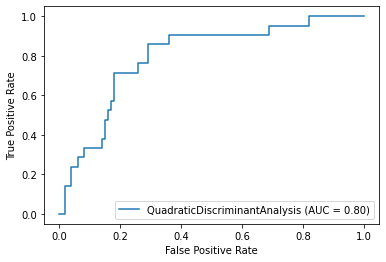

In [ ]:
clf = QuadraticDiscriminantAnalysis(reg_param = .5)
clf.fit(X_train, Y_train)

plot_roc_curve(clf, X_test, Y_test)

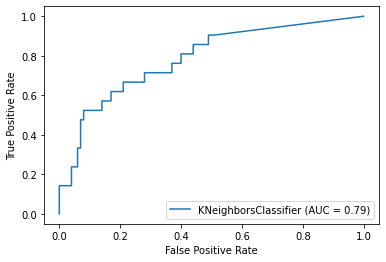

In [ ]:
clf = KNeighborsClassifier(5, weights = 'distance')
clf.fit(X_train, Y_train)
plot_roc_curve(clf, X_test, Y_test)

In [ ]:
# Looking at exporting decision tree to determine how features are used in the classification
from sklearn import tree
import graphviz 
clf = DecisionTreeClassifier(max_depth=10,  class_weight = 'balanced');
clf.fit(X_train, Y_train);
# tree.plot_tree(clf, feature_names = covid_data_s.columns[3:], class_names = ['Negative','Positive']);

dot_data = tree.export_graphviz(clf, out_file = None, feature_names=covid_data_nonan.columns[2:],
                     class_names=['Negative','Positive'], filled=True, 
                     rounded=True, special_characters=False)
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Leukocytes <= -0.433\\ngini = 0.5\\nsamples = 121\\nvalue = [60.5, 60.5]\\nclass = Negative", fillcolor="#ffffff"] ;\n1 [label="Eosinophils <= -0.267\\ngini = 0.369\\nsamples = 49\\nvalue = [17.722, 55.0]\\nclass = Positive", fillcolor="#79bded"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Patient age quantile <= 7.0\\ngini = 0.172\\nsamples = 28\\nvalue = [5.5, 52.25]\\nclass = Positive", fillcolor="#4ea7e8"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 3\\nvalue = [1.833, 0.0]\\nclass = Negative", fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label="Mean corpuscular hemoglobin (MCH) <= 0.649\\ngini = 0.123\\nsamples = 25\\nvalue = [3.667, 52.25]\\nclass = Positive", fillcolor="#47a4e7"] ;\n2 -> 4 ;\n5 [label="Potassium <= 0.806\\ngini = 0.085\\nsamples = 23\\nvalue = [2.444, 52.25]\\nclass = Positive", fillcolor="#42a2e6"] ;\n

In [ ]:
!dot -Tpng tree.dot -o tree.png

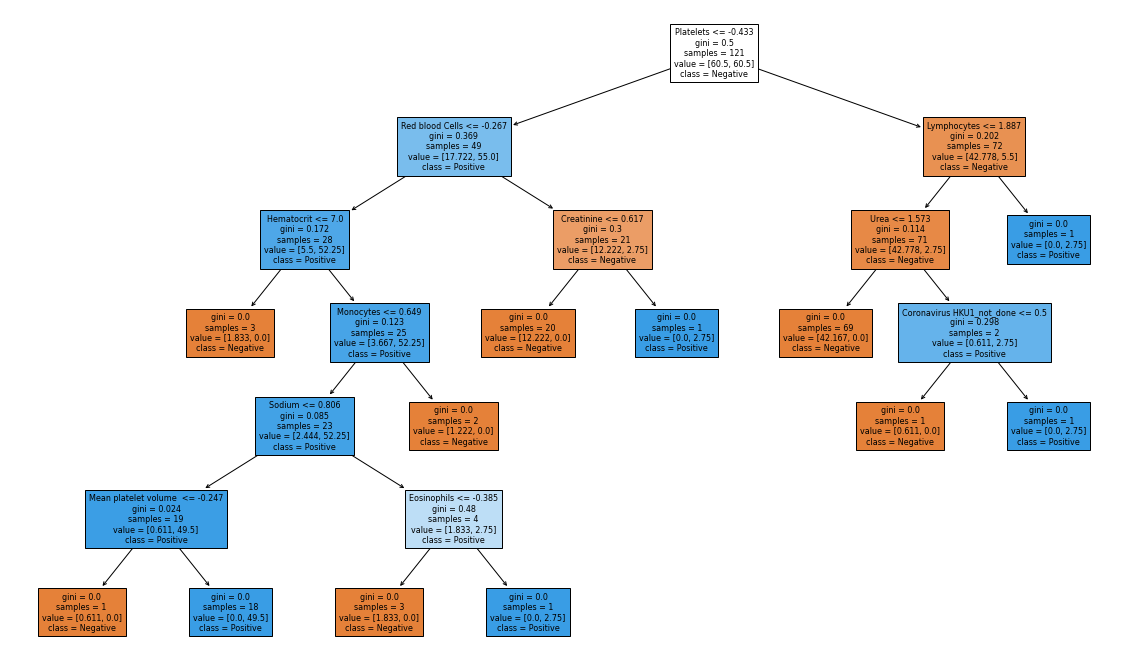

In [ ]:
fig = plt.figure(figsize=(20,12))
tree.plot_tree(clf, feature_names = covid_data_s.columns[3:], 
               class_names= ['Negative','Positive'],
               filled = True, fontsize = 8);
fig.savefig('tree2.png')

In [ ]:
# Use random forest feature importance parameter to look at feature importance. By the documentation, they are ranked by the amount of impurity criterion decrease. 
clf = RandomForestClassifier(max_depth=5, n_estimators=20, class_weight = 'balanced')
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

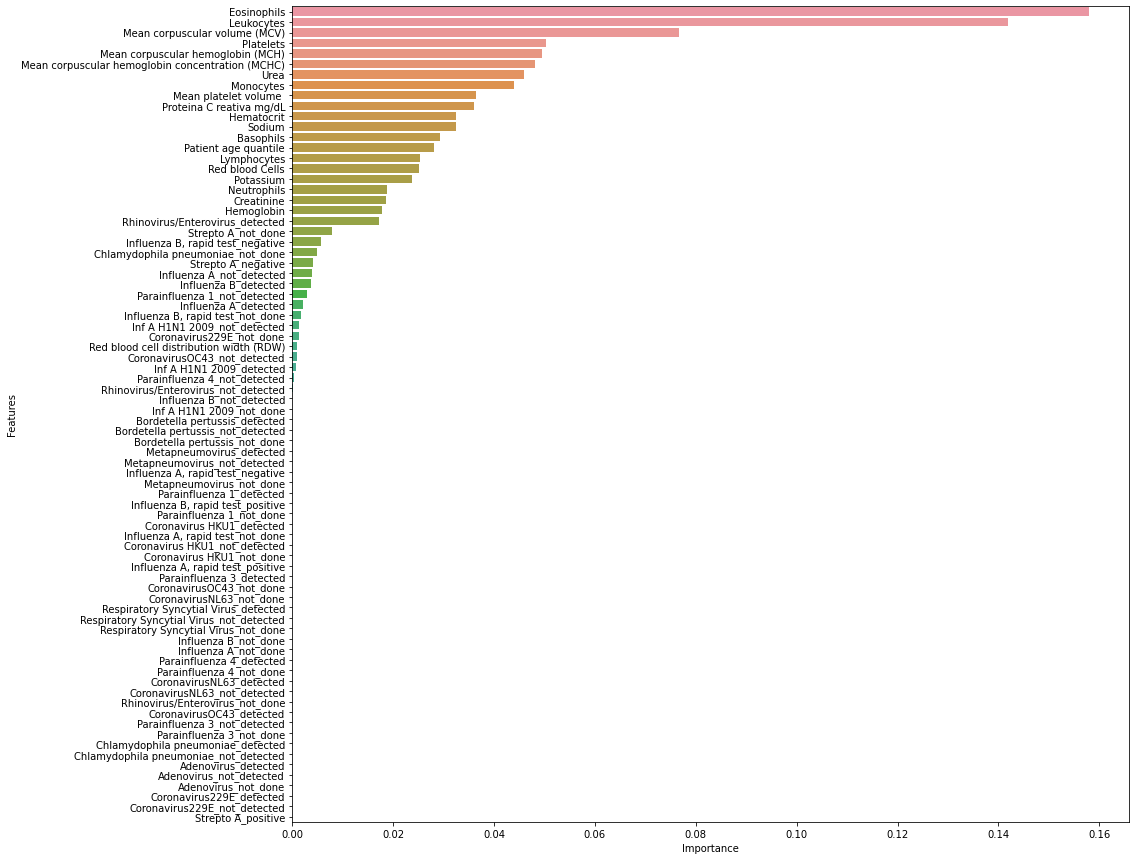

In [ ]:
randforestfeature = pd.DataFrame({'Features': covid_data_s.columns[2:], 'Importance': clf.feature_importances_})
randforestfeature = randforestfeature.sort_values(by = ['Importance'], ascending = False)
plt.figure(figsize = (15,15))
sns.barplot(y = 'Features', x = 'Importance', data = randforestfeature, orient='h')

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=208347453, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=383048430, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max

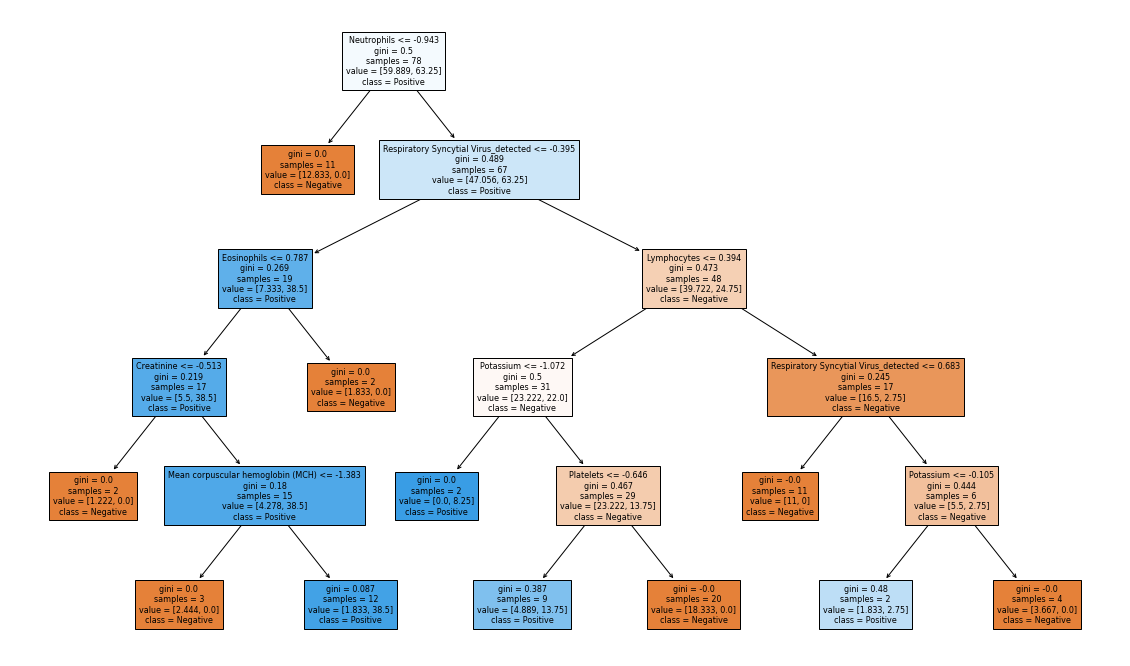

In [ ]:
# Looking at the decision trees that make up the random forest model
from sklearn import tree
print(clf.estimators_)
fig = plt.figure(figsize=(20,12))
tree.plot_tree(clf.estimators_[0], feature_names = covid_data_s.columns[3:], 
               class_names= ['Negative','Positive'],
               filled = True, fontsize = 8);

#### More on Neural Net <a name = "neuralnet2" />

Sklearn MLP <a name = "sklearnmlp" />

Iteration 1, loss = 0.61356990
Iteration 2, loss = 0.61717568
Iteration 3, loss = 0.56332905
Iteration 4, loss = 0.42592479
Iteration 5, loss = 0.35284591
Iteration 6, loss = 0.35921216
Iteration 7, loss = 0.31568711
Iteration 8, loss = 0.26672568
Iteration 9, loss = 0.27965580
Iteration 10, loss = 0.26861833
Iteration 11, loss = 0.23305413
Iteration 12, loss = 0.21691564
Iteration 13, loss = 0.22018235
Iteration 14, loss = 0.21072152
Iteration 15, loss = 0.19040249
Iteration 16, loss = 0.18166250
Iteration 17, loss = 0.18055903
Iteration 18, loss = 0.17043823
Iteration 19, loss = 0.15509379
Iteration 20, loss = 0.14679009
Iteration 21, loss = 0.14375740
Iteration 22, loss = 0.13660844
Iteration 23, loss = 0.12567307
Iteration 24, loss = 0.11854012
Iteration 25, loss = 0.11451863
Iteration 26, loss = 0.10784579
Iteration 27, loss = 0.09908687
Iteration 28, loss = 0.09304954
Iteration 29, loss = 0.08894771
Iteration 30, loss = 0.08370474
Iteration 31, loss = 0.07795938
Iteration 32, los

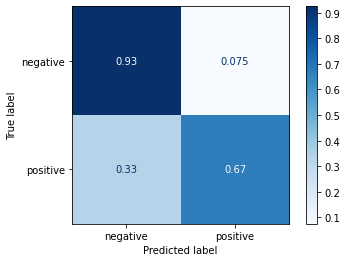

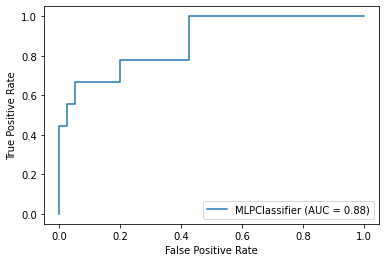

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_covid, test_size=0.2, random_state=42, stratify = Y_covid)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=.01,
                    solver='adam', verbose=1, random_state=42, tol = 1e-5,
                    learning_rate = 'adaptive', learning_rate_init=.005, 
                    validation_fraction = .2)
# mlp doesn't let you weigh classes if you have imbalanced dataset 

mlp.fit(X_train, Y_train)
plot_confusion_matrix(mlp, X_test, Y_test,
                                 display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                 cmap=plt.cm.Blues, normalize = 'true')
plot_roc_curve(mlp, X_test, Y_test)

In [ ]:
print("Training set score: %f" % mlp.score(X_train, Y_train))
print("Test set score: %f" % mlp.score(X_test, Y_test))

Training set score: 1.000000
Test set score: 0.877551


In [ ]:
print('input -> hidden layer 1 coefficients size: ',mlp.coefs_[0].shape)
print('hidden layer 1 -> hidden layer 2 coefficients size: ',mlp.coefs_[1].shape)
print('hidden layer 2 -> output coefficients size: ',mlp.coefs_[2].shape)

input -> hidden layer 1 coefficients:  (78, 100)
hidden layer 1 -> hidden layer 2 coefficients:  (100, 50)
hidden layer 2 -> output coefficients:  (50, 1)


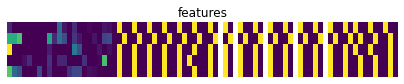

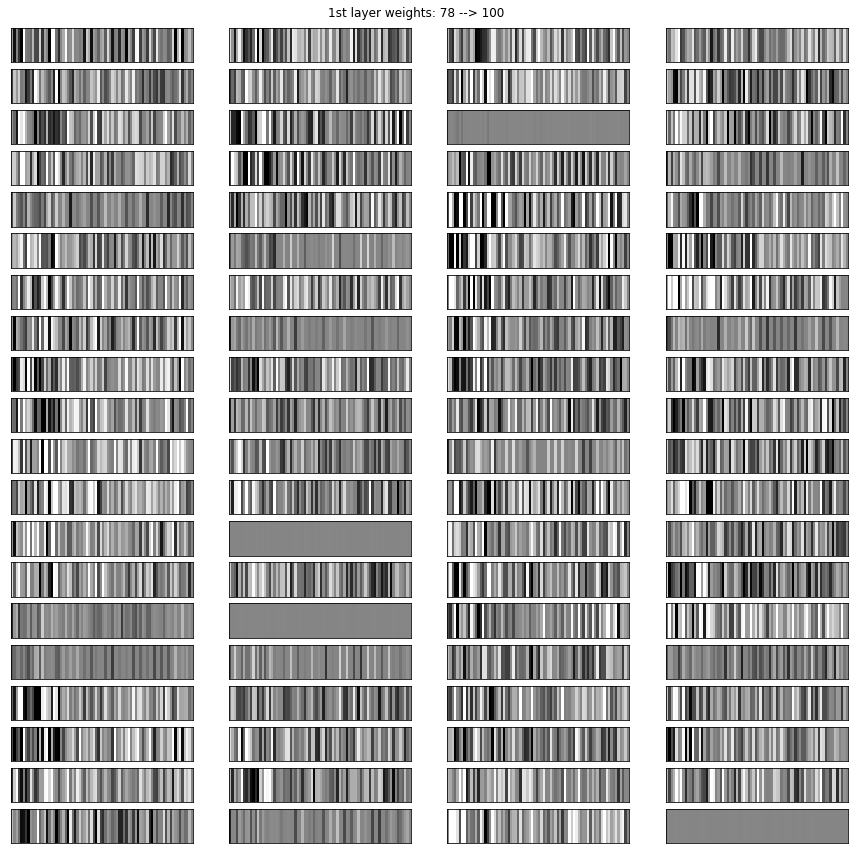

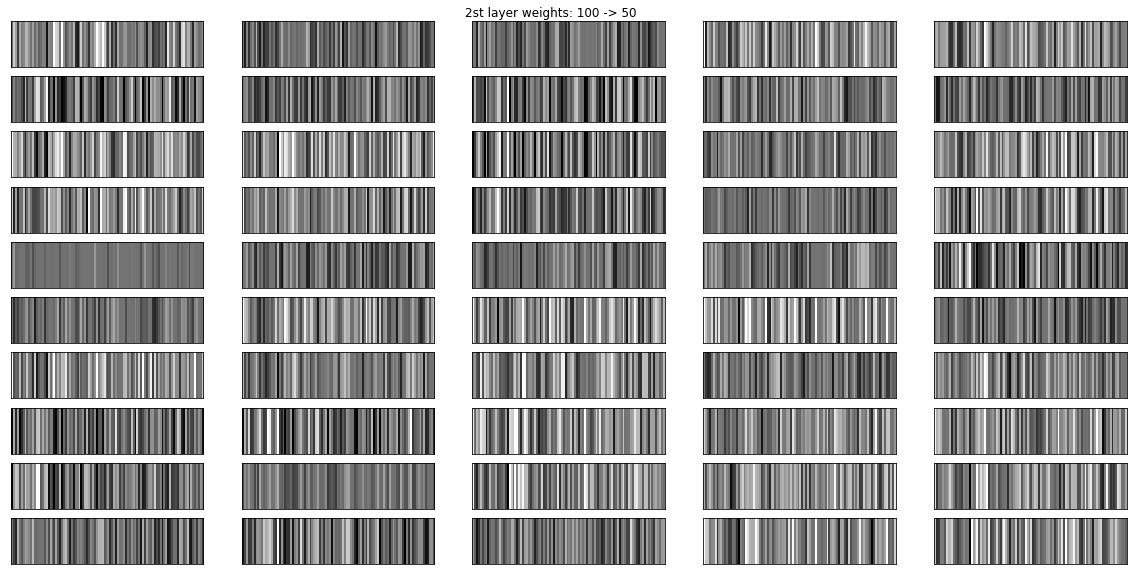

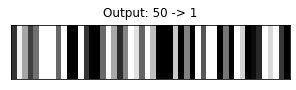

In [ ]:
# look at weights in our neural network

plt.figure(figsize = (7,1))
plt.imshow((X/X.max(axis=0))[200:205,:], aspect = 'auto', vmax = 1, vmin = 0);
plt.axis('off')
plt.title('features')
plt.show()

fig, axes = plt.subplots(20,4, figsize = (15,15))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(1, 78), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax, aspect = 'auto')
    ax.set_xticks(())
    ax.set_yticks(())
plt.suptitle('1st layer weights: 78 --> 100', y = .9)
plt.show()

fig, axes = plt.subplots(10,5, figsize = (20,10))
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(1, 100), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax, aspect = 'auto')
    ax.set_xticks(())
    ax.set_yticks(())
plt.suptitle('2st layer weights: 100 -> 50', y = .9)
plt.show()

fig, axes = plt.subplots(1,1, figsize = (5,1))
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()
axes.matshow(mlp.coefs_[2].T, cmap=plt.cm.gray, vmin=.5 * vmin,
            vmax=.5 * vmax, aspect = 'auto')
axes.set_xticks(())
axes.set_yticks(())
plt.title('Output: 50 -> 1')
plt.show()

Using Pytorch <a name = "pytorch" />

Note, in this example, I am showing examples of convolutional layers. This doesn't make a lot of sense with our dataset since the spatial relationship of our features shouldn't matter, but I will show it here anyway. I also added a dropout layer.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_covid, test_size=0.2, random_state=29, stratify = Y_covid)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1, stratify = Y_train) # 0.25 x 0.8 = 0.2, so you have .6 left for training

In [ ]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, BCELoss, Sequential, Conv1d, Module, Softmax, Dropout, Sigmoid
from torch.optim import Adam, SGD

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(144, 78) (49, 78) (49, 78)
(144,) (49,) (49,)


In [ ]:
# converting training images into torch format
Xtrain = np.expand_dims(X_train, axis = (1))
Xval  = np.expand_dims(X_val, axis = (1))
Xtrain = torch.from_numpy(Xtrain)
Xval = torch.from_numpy(Xval)

In [ ]:
Ytrain = torch.from_numpy(Y_train.astype(int))
Yval = torch.from_numpy(Y_val.astype(int))

In [ ]:
print(Xtrain.shape, Xval.shape)
print(Ytrain.shape, Yval.shape)

torch.Size([144, 1, 78]) torch.Size([49, 1, 78])
torch.Size([144]) torch.Size([49])


Model Layers: https://pytorch.org/docs/stable/nn.html

In [ ]:
# Define Architecture
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            Conv1d(1, 4, kernel_size=3, stride=1, padding=1), # first convolution layer
            ReLU(inplace=True), # relu activation
            Dropout(.5), # drop out layer
            Conv1d(4, 4, kernel_size=3, stride=1, padding=1), #second convolution layer
            ReLU(inplace=True), # relu activation
        )

        self.linear_layers = Sequential(
            Linear(312, 1) # fully connected / dense layer
        )


    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
# defining the model
model = Net()
model = model.double()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.007)
# defining the loss function
#criterion = CrossEntropyLoss()
#criterion = BCELoss()
criterion = torch.nn.BCEWithLogitsLoss()

print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv1d(1, 4, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Conv1d(4, 4, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): ReLU(inplace=True)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=312, out_features=1, bias=True)
  )
)


In [ ]:
def train(epoch):
    model.train()
    tr_loss = 0
    xtrain, ytrain = Variable(Xtrain), Variable(Ytrain)
    xval, yval = Variable(Xval), Variable(Yval)

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(xtrain)
    output_test = model(xval)

    # computing the training and validation loss
    loss_train = criterion(output_train, torch.unsqueeze(ytrain, 1).type_as(output_train))
    loss_val = criterion(output_test, torch.unsqueeze(yval, 1).type_as(output_test))
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [ ]:
n_epochs = 200

train_losses = []
val_losses = []

for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(0.6915, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  3 	 loss : tensor(0.5441, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  5 	 loss : tensor(0.4466, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  7 	 loss : tensor(0.5000, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  9 	 loss : tensor(0.4661, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  11 	 loss : tensor(0.4572, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  13 	 loss : tensor(0.4420, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  15 	 loss : tensor(0.4290, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch :  17 	 loss : tensor(0.4525, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward

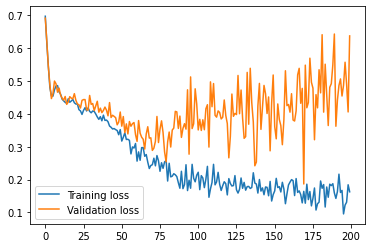

In [ ]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# prediction for training set
output = model(Xtrain)
    
# softmax = torch.exp(output)
# prob = list(softmax.detach().numpy())
prob = output.sigmoid()
#predictions = np.argmax(prob, axis=1)
predictions = prob.round().detach().numpy()

# accuracy on training set
accuracy_score(Ytrain, predictions)

0.9097222222222222

In [ ]:
# prediction for testing set
output = model(Xval)
    
prob = output.sigmoid()
predictions = prob.round().detach().numpy()

# accuracy on test set
accuracy_score(Yval, predictions)

0.8775510204081632

In [ ]:
# Now test set
Xtest = torch.from_numpy(np.expand_dims(X_test, axis = (1)))
Ytest = torch.from_numpy(Y_test.astype(int))

In [ ]:
output = model(Xtest)
prob = output.sigmoid()
predictions = prob.round().detach().numpy()

In [ ]:
accuracy_score(Ytest, predictions)

0.8163265306122449

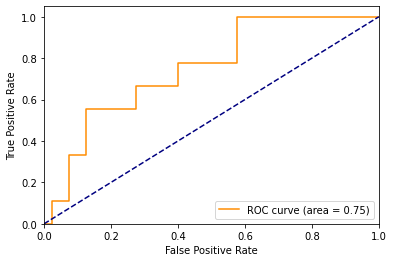

In [ ]:
fpr, tpr, _ = roc_curve(Ytest, prob.detach().numpy())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Using Tensorflow <a name = "tensorflow" />

I made this model with some dense layers, so similar to the MLP classifier. I also added dropout layer for regularization and class weights.

In [ ]:
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Conv1D, AveragePooling1D, Input, Dropout, MaxPooling1D
from keras.utils import to_categorical
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K
from numpy.random import seed; seed(111)
import random
import tensorflow as tf;
tf.random.set_seed(111)
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from scipy.stats import ttest_ind
from IPython.display import Image  
import pydotplus

Using TensorFlow backend.


In [ ]:
# Xtrain = np.expand_dims(X_train,axis = 2)
# Xval = np.expand_dims(X_val,axis = 2)
# Xtest = np.expand_dims(X_test,axis = 2)
# Ytrain = to_categorical(Y_train)
# Yval = to_categorical(Y_val)
# Ytest = to_categorical(Y_test)
# # Ytrain = np.expand_dims(Y_train, 1)
# # Yval = np.expand_dims(Y_val, 1)
# # Ytest = np.expand_dims(Y_test, 1)
# print(Xtrain.shape, Xval.shape, Xtest.shape)
# print(Ytrain.shape, Yval.shape, Ytest.shape)

(144, 78, 1) (49, 78, 1) (49, 78, 1)
(144, 2) (49, 2) (49, 2)


In [ ]:
Ytrain.sum(axis=0)

array([119.,  25.], dtype=float32)

In [ ]:
Y_train

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
model_input = Input(shape = (78,))
model_output = model_input

model_output = Dense(100, activation = 'relu')(model_output) # add first dense layer with relu activation
model_output = Dropout(.5)(model_output) # dropout layer
model_output = Dense(50, activation = 'relu')(model_output) # second dense layer
model_output = Dense(2, activation = 'softmax')(model_output) # output

In [ ]:
# specify input and output
model = Model(inputs=[model_input],
              outputs=model_output)

In [ ]:
# define loss function and optimizer
#model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 78)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               7900      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 102       
Total params: 13,052
Trainable params: 13,052
Non-trainable params: 0
_________________________________________________________________
None


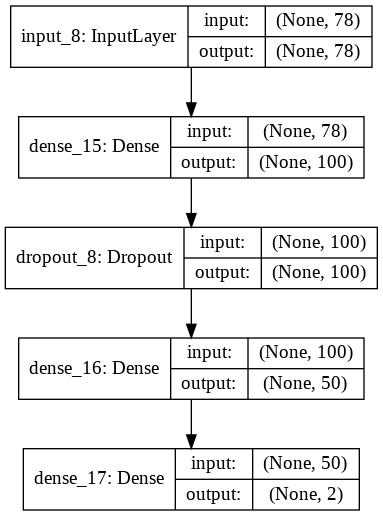

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# save the best performing model
checkpointer = ModelCheckpoint(filepath='saved_weights.hdf5', 
                               monitor='val_loss', verbose=0, 
                               save_best_only=True)

In [ ]:
np.expand_dims(Y_train,1).shape

(144, 1)

In [ ]:
# model training
model.fit([X_train], np.expand_dims(Y_train,1),
          batch_size=100,
          epochs=200, 
          verbose=1,
          callbacks=[checkpointer],
          class_weight = {0: 1, 1: 3}, #{0: 1, 1:7.5} # class weight is a dictionary where you give a "weight" to each class.
          validation_data=([X_val], np.expand_dims(Y_val,1)))

Train on 144 samples, validate on 49 samples
Epoch 1/200
144/144 [==============================] - 0s 842us/step - loss: 1.4826 - accuracy: 0.4931 - val_loss: 0.7669 - val_accuracy: 0.3673
Epoch 2/200
144/144 [==============================] - 0s 56us/step - loss: 1.2124 - accuracy: 0.5833 - val_loss: 0.6459 - val_accuracy: 0.7143
Epoch 3/200
144/144 [==============================] - 0s 51us/step - loss: 1.1248 - accuracy: 0.6667 - val_loss: 0.5997 - val_accuracy: 0.7959
Epoch 4/200
144/144 [==============================] - 0s 80us/step - loss: 1.1548 - accuracy: 0.7292 - val_loss: 0.5731 - val_accuracy: 0.8367
Epoch 5/200
144/144 [==============================] - 0s 70us/step - loss: 1.1282 - accuracy: 0.7014 - val_loss: 0.5598 - val_accuracy: 0.8163
Epoch 6/200
144/144 [==============================] - 0s 63us/step - loss: 0.9428 - accuracy: 0.6736 - val_loss: 0.5474 - val_accuracy: 0.8571
Epoch 7/200
144/144 [==============================] - 0s 84us/step - loss: 0.9065 - accur

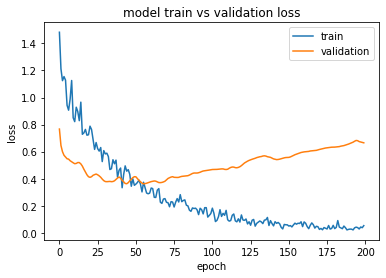

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

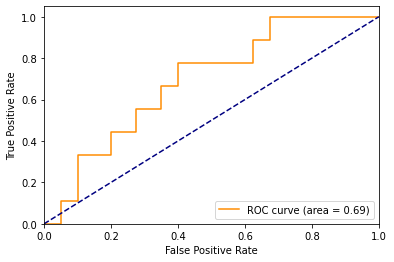

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
accuracy_score(Y_test, y_pred)

0.7551020408163265

#### Care Level Severity <a name = "carelevel2" />

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_care, test_size=0.5, random_state=42, stratify = Y_care)

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 'Ridge','SGD', 'SGD Elastic Net',
         'Logistic Regression']

classifiers = [
    KNeighborsClassifier(5, weights = 'distance'),
    SVC(kernel="sigmoid", C=0.025, class_weight = 'balanced' ),
    SVC(gamma=2, C=1, class_weight = 'balanced' ),
    DecisionTreeClassifier(max_depth=10,  class_weight = 'balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=20, class_weight = 'balanced'),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    RidgeClassifier(class_weight = 'balanced'),
    SGDClassifier(max_iter=1000, tol=1e-3, class_weight = 'balanced'), 
    SGDClassifier(loss="log", penalty="elasticnet", class_weight = 'balanced'),
    LogisticRegression(random_state=0, class_weight='balanced')
    ]

Testing Classifier  Nearest Neighbors ... 
Score of  0.6942148760330579
Testing Classifier  Linear SVM ... 
Score of  0.2892561983471074
Testing Classifier  RBF SVM ... 
Score of  0.6942148760330579
Testing Classifier  Decision Tree ... 
Score of  0.5289256198347108
Testing Classifier  Random Forest ... 
Score of  0.6859504132231405
Testing Classifier  Neural Net ... 
Score of  0.6776859504132231
Testing Classifier  AdaBoost ... 
Score of  0.45454545454545453
Testing Classifier  Naive Bayes ... 
Score of  0.21487603305785125
Testing Classifier  QDA ... 
Score of  0.6446280991735537
Testing Classifier  Ridge ... 
Score of  0.48760330578512395
Testing Classifier  SGD ... 
Score of  0.5537190082644629
Testing Classifier  SGD Elastic Net ... 
Score of  0.5702479338842975
Testing Classifier  Logistic Regression ... 
Score of  0.5289256198347108


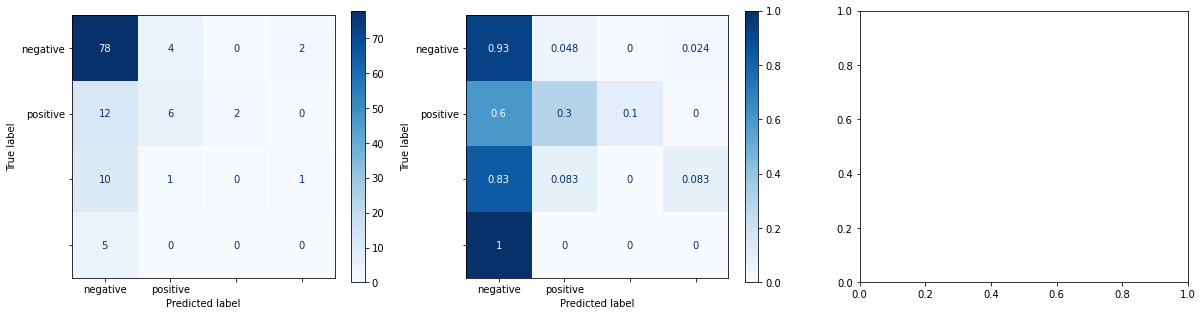

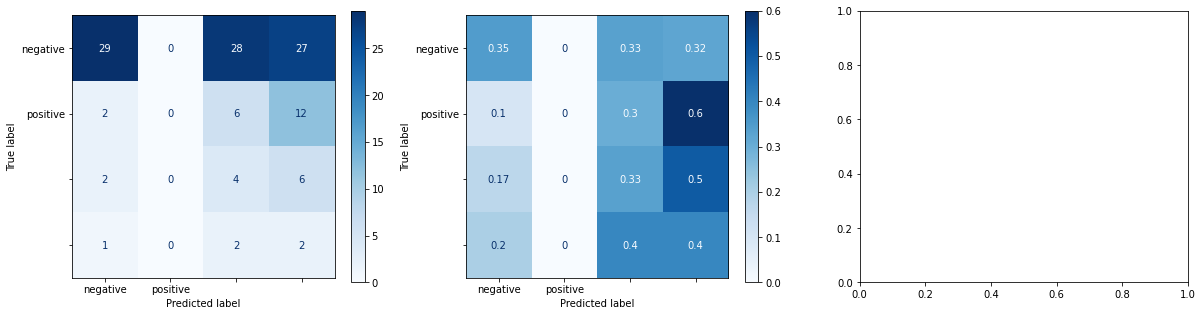

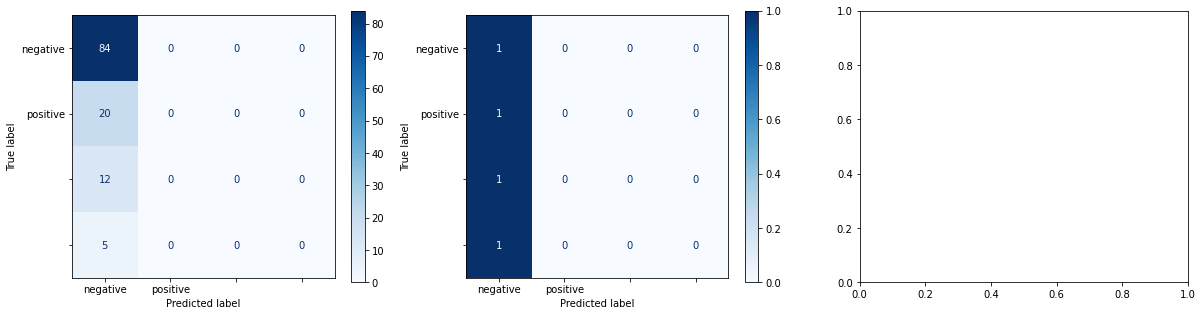

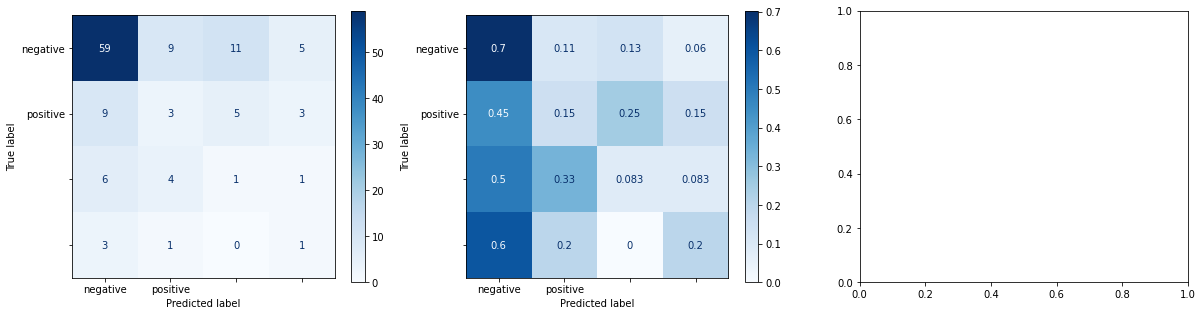

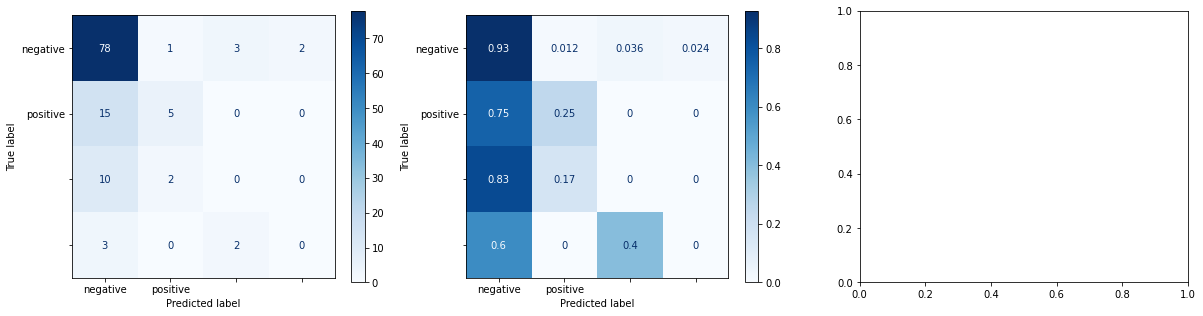

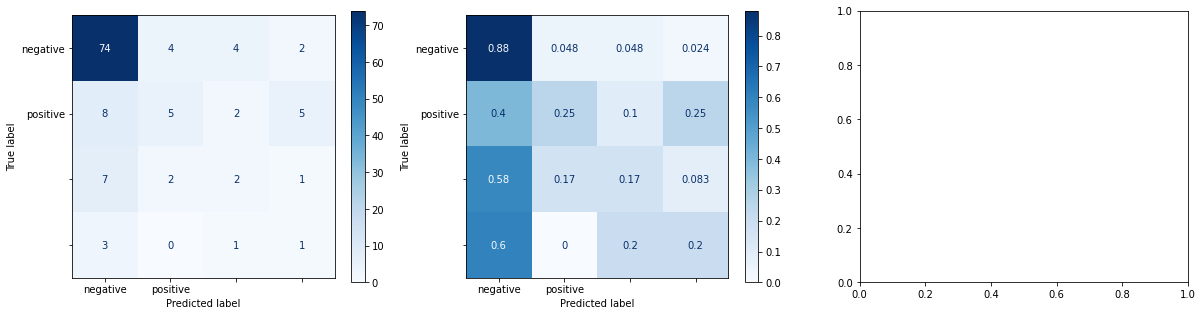

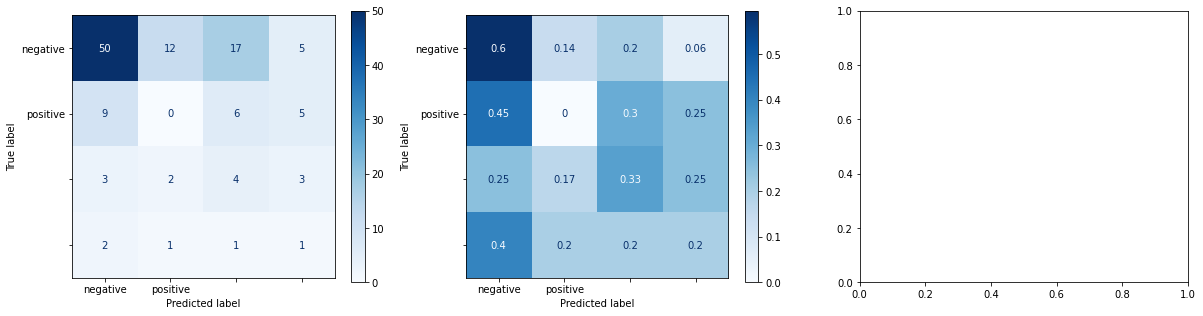

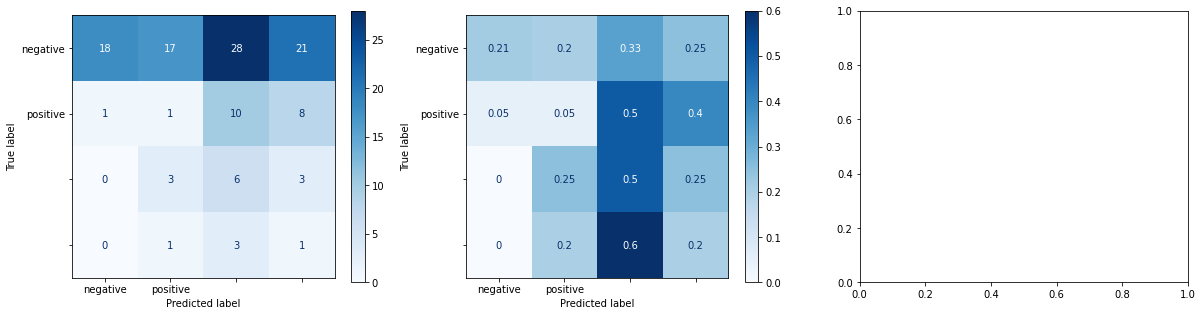

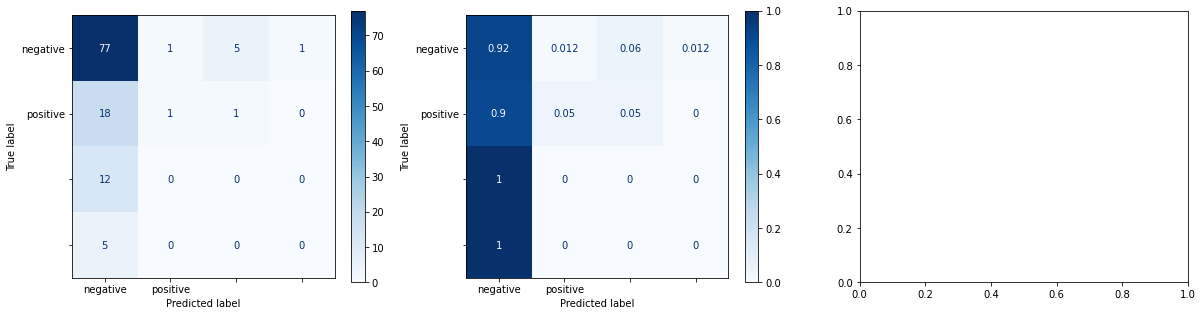

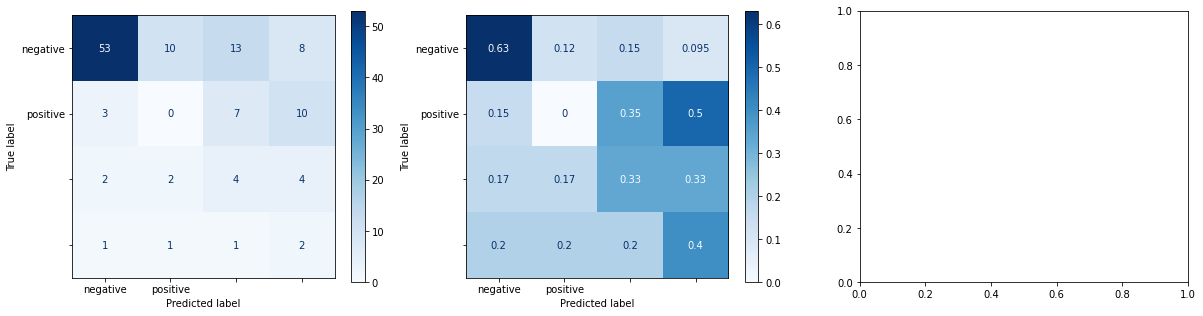

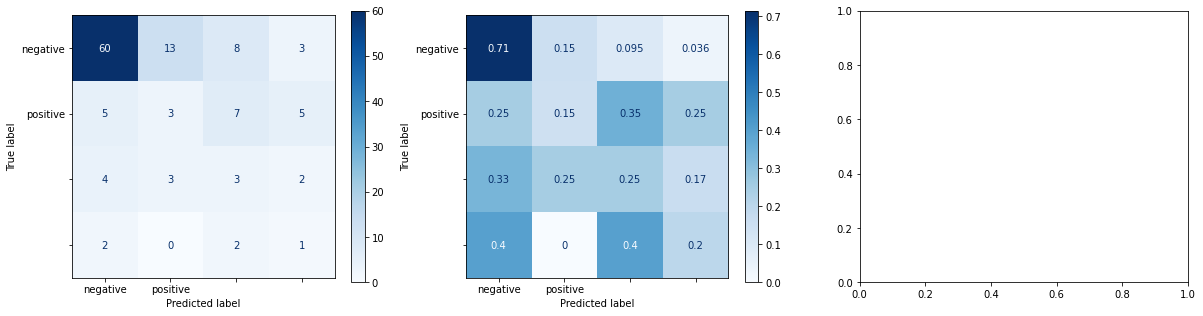

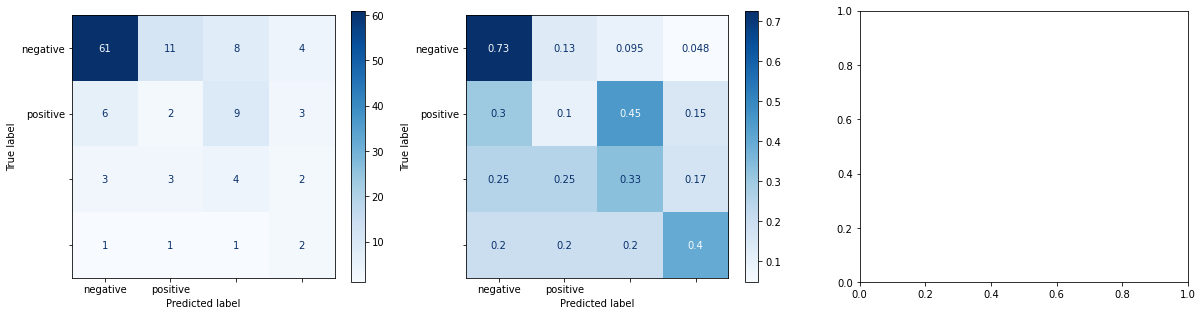

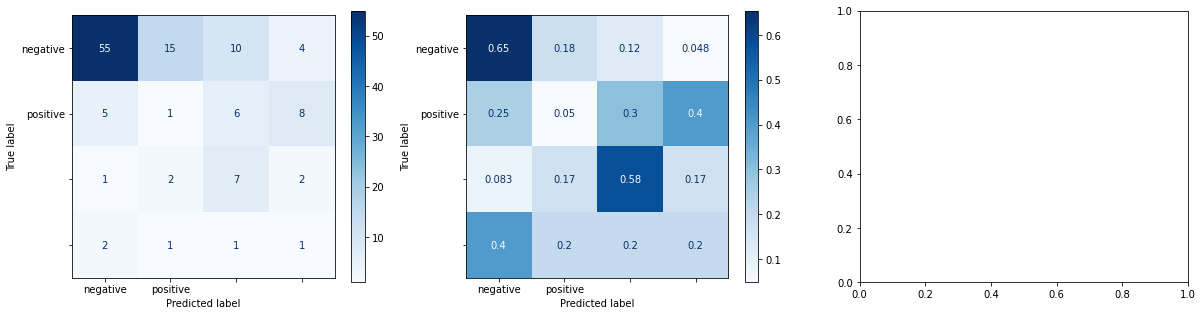

In [ ]:
#fig1, ax1 = plt.subplots()

for name, clf in zip(names, classifiers):
  print("Testing Classifier ", name, "... ")
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  fig, axes = plt.subplots(1,3, figsize = (20,5))
  plot_confusion_matrix(clf, X_test, Y_test,
                                display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                cmap=plt.cm.Blues, normalize = None, ax = axes[0])
  plot_confusion_matrix(clf, X_test, Y_test,
                                display_labels=list(SARSCOV2_test_result_encoding.keys()),
                                cmap=plt.cm.Blues, normalize = 'true', ax = axes[1])
  # plot_roc_curve(clf, X_test, Y_test, ax = axes[2])
  # plot_roc_curve(clf, X_test, Y_test, ax = ax1)
  acc = accuracy_score(Y_test, y_pred)
  print("Score of ", acc)